<a href="https://colab.research.google.com/github/paulanwesha01/covid_19_visualization/blob/main/Visualisation_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Semester Project on Visualisation : Visualisation of **The Novel Coronavirus (2019-nCoV)** dataset

The novel coronavirus (COVID-19) that was first reported at the end of 2019 has impacted almost every aspect of life as we know it. This project is a visual study of the Coronavirus Disease (COVID-19) Outbreak.

In [36]:
install.packages("coronavirus")
install.packages("gridExtra")
install.packages("cowplot")
install.packages("maps")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [26]:
library(coronavirus)
library(dplyr)
library(tidyr)
library("gridExtra")
library(ggplot2)
library(cowplot)
library("maps")

### Dataset : The 2019 Novel Coronavirus COVID-19 (2019-nCoV) Dataset


In [3]:
data("coronavirus")


The dataset contains the daily summary of Coronavirus cases (confirmed, death, and recovered), by state/province

**The dataset has the following columns :**

*   date - The date of the observation, using Date class
*   province - Name of province/state, for countries where data is provided split across multiple provinces/states
*   country - Name of country/region
*   lat - The latitude code
*   long - The longitude code
*   type - An indicator for the type of cases (confirmed, death, recovered)
*   cases - Number of cases on given date
*   uid - Country code
*   province_state - Province or state if applicable
*   iso2 - Officially assigned country code identifiers with two-letter
*   iso3 - Officially assigned country code identifiers with three-letter
*   code3 - UN country code
*   fips - Federal Information Processing Standards code that uniquely identifies counties within the USA
*   combined_key - Country and province (if applicable)
*   population - Country or province population
*   continent_name - Continent name
*   continent_code - Continent code 

In [4]:
head(coronavirus)

,date,province,country,lat,long,type,cases,uid,iso2,iso3,code3,combined_key,population,continent_name,continent_code
,<date>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
1,2020-01-22,Alberta,Canada,53.9333,-116.5765,confirmed,0,12401,CA,CAN,124,"Alberta, Canada",4413146,North America,NA
2,2020-01-23,Alberta,Canada,53.9333,-116.5765,confirmed,0,12401,CA,CAN,124,"Alberta, Canada",4413146,North America,NA
3,2020-01-24,Alberta,Canada,53.9333,-116.5765,confirmed,0,12401,CA,CAN,124,"Alberta, Canada",4413146,North America,NA
4,2020-01-25,Alberta,Canada,53.9333,-116.5765,confirmed,0,12401,CA,CAN,124,"Alberta, Canada",4413146,North America,NA
5,2020-01-26,Alberta,Canada,53.9333,-116.5765,confirmed,0,12401,CA,CAN,124,"Alberta, Canada",4413146,North America,NA
6,2020-01-27,Alberta,Canada,53.9333,-116.5765,confirmed,0,12401,CA,CAN,124,"Alberta, Canada",4413146,North America,NA


### Covid19 Cases Worldwide

In [5]:
df <- coronavirus %>%
      group_by(type, date) %>%
      summarise(total_cases = sum(cases)) %>%
      pivot_wider(names_from = type, values_from = total_cases) %>%
      arrange(date) %>%
      mutate(active = confirmed - death - recovery) %>%
      mutate(active_total = cumsum(active),
             recovered_total = cumsum(recovery),
             death_total = cumsum(death))

head(df)

`summarise()` has grouped output by 'type'. You can override using the
`.groups` argument.


date,confirmed,death,recovery,active,active_total,recovered_total,death_total
<date>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2020-01-22,557,17,30,510,510,30,17
2020-01-23,100,1,2,97,607,32,18
2020-01-24,287,8,7,272,879,39,26
2020-01-25,493,16,3,474,1353,42,42
2020-01-26,683,14,14,655,2008,56,56
2020-01-27,809,26,9,774,2782,65,82


### Confirmed Cases Worldwide

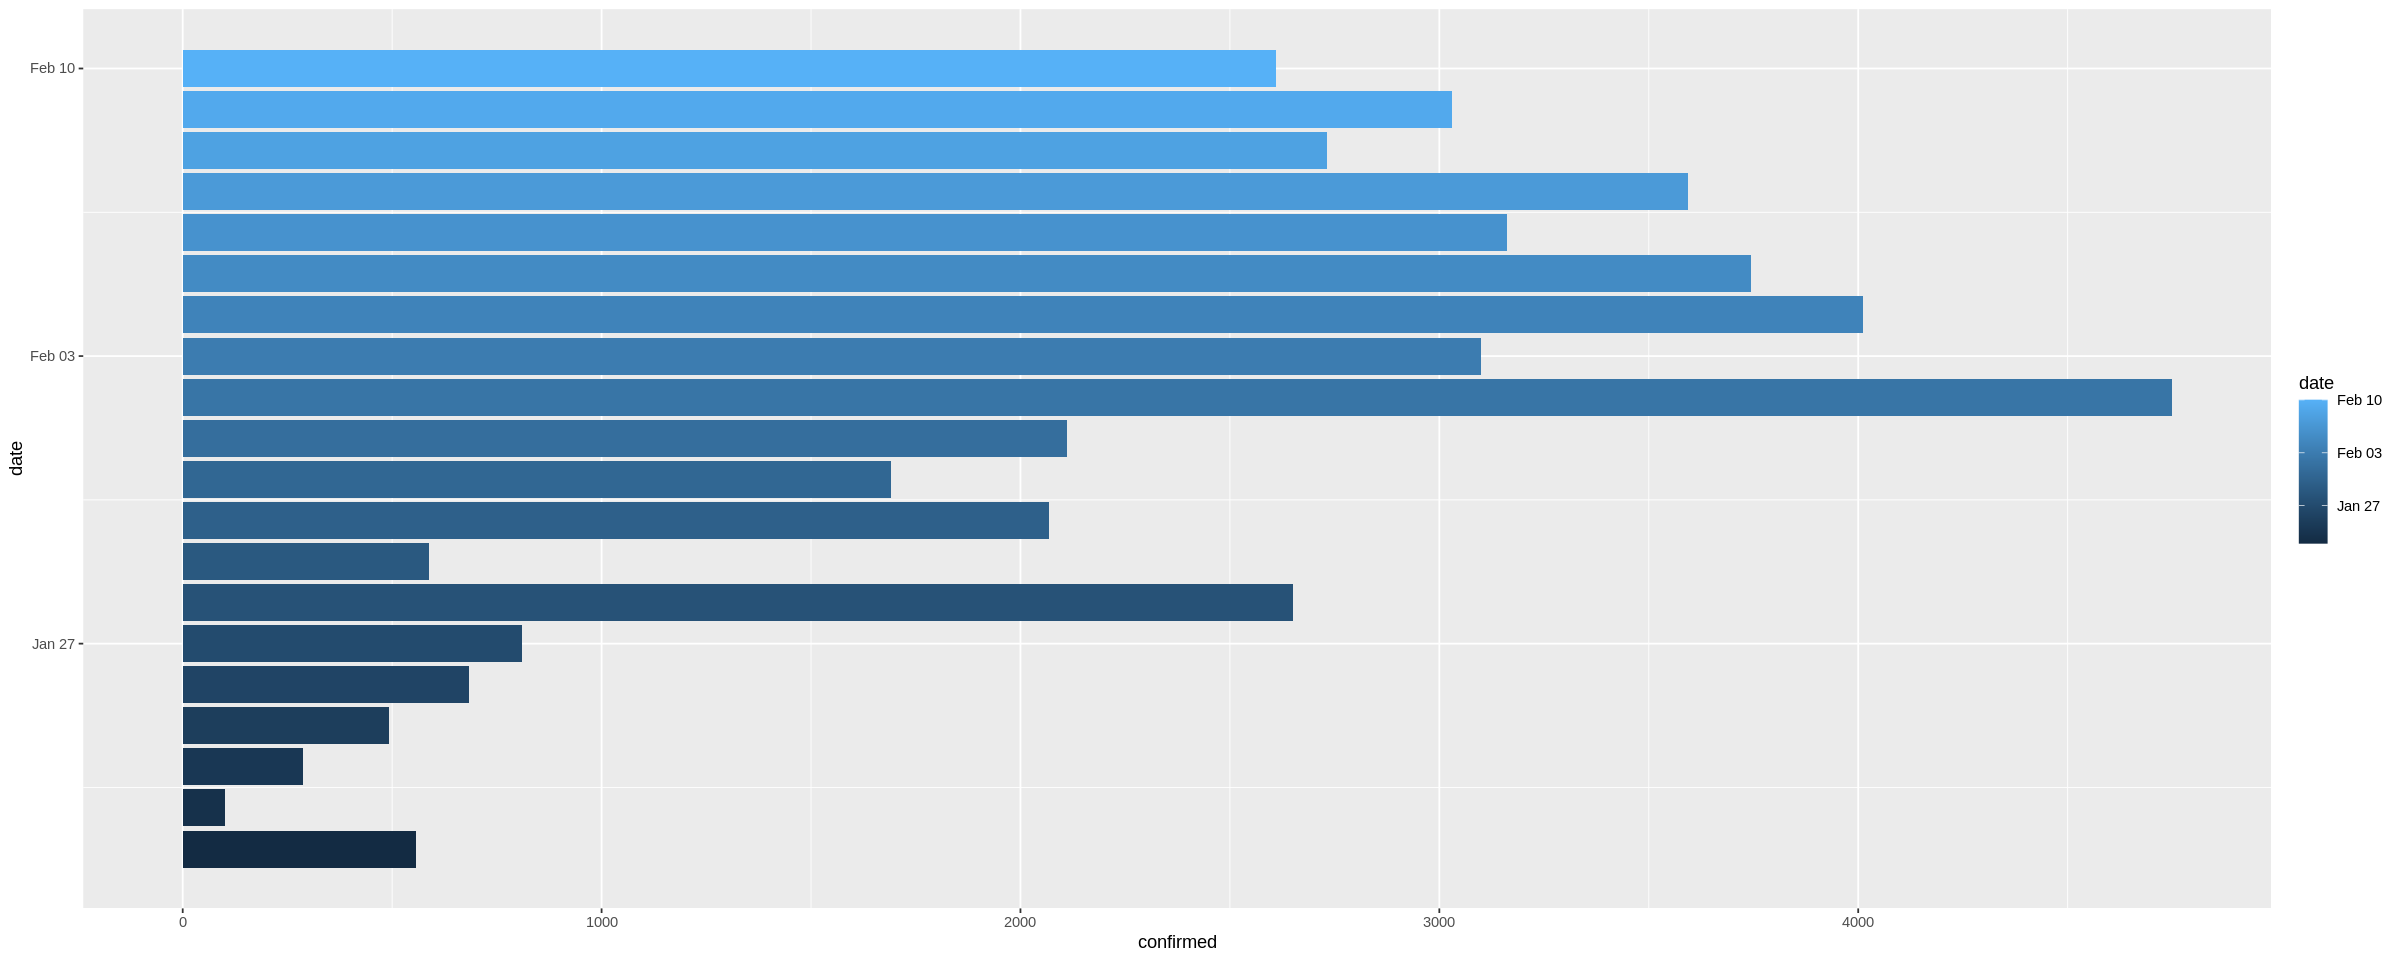

In [ ]:
options(repr.plot.width = 20, repr.plot.height = 8)

ggplot(df %>% head(20), aes(x = date, y = confirmed, fill = date)) +  geom_bar(stat = "identity") + coord_flip()

### Active Cases Worldwide

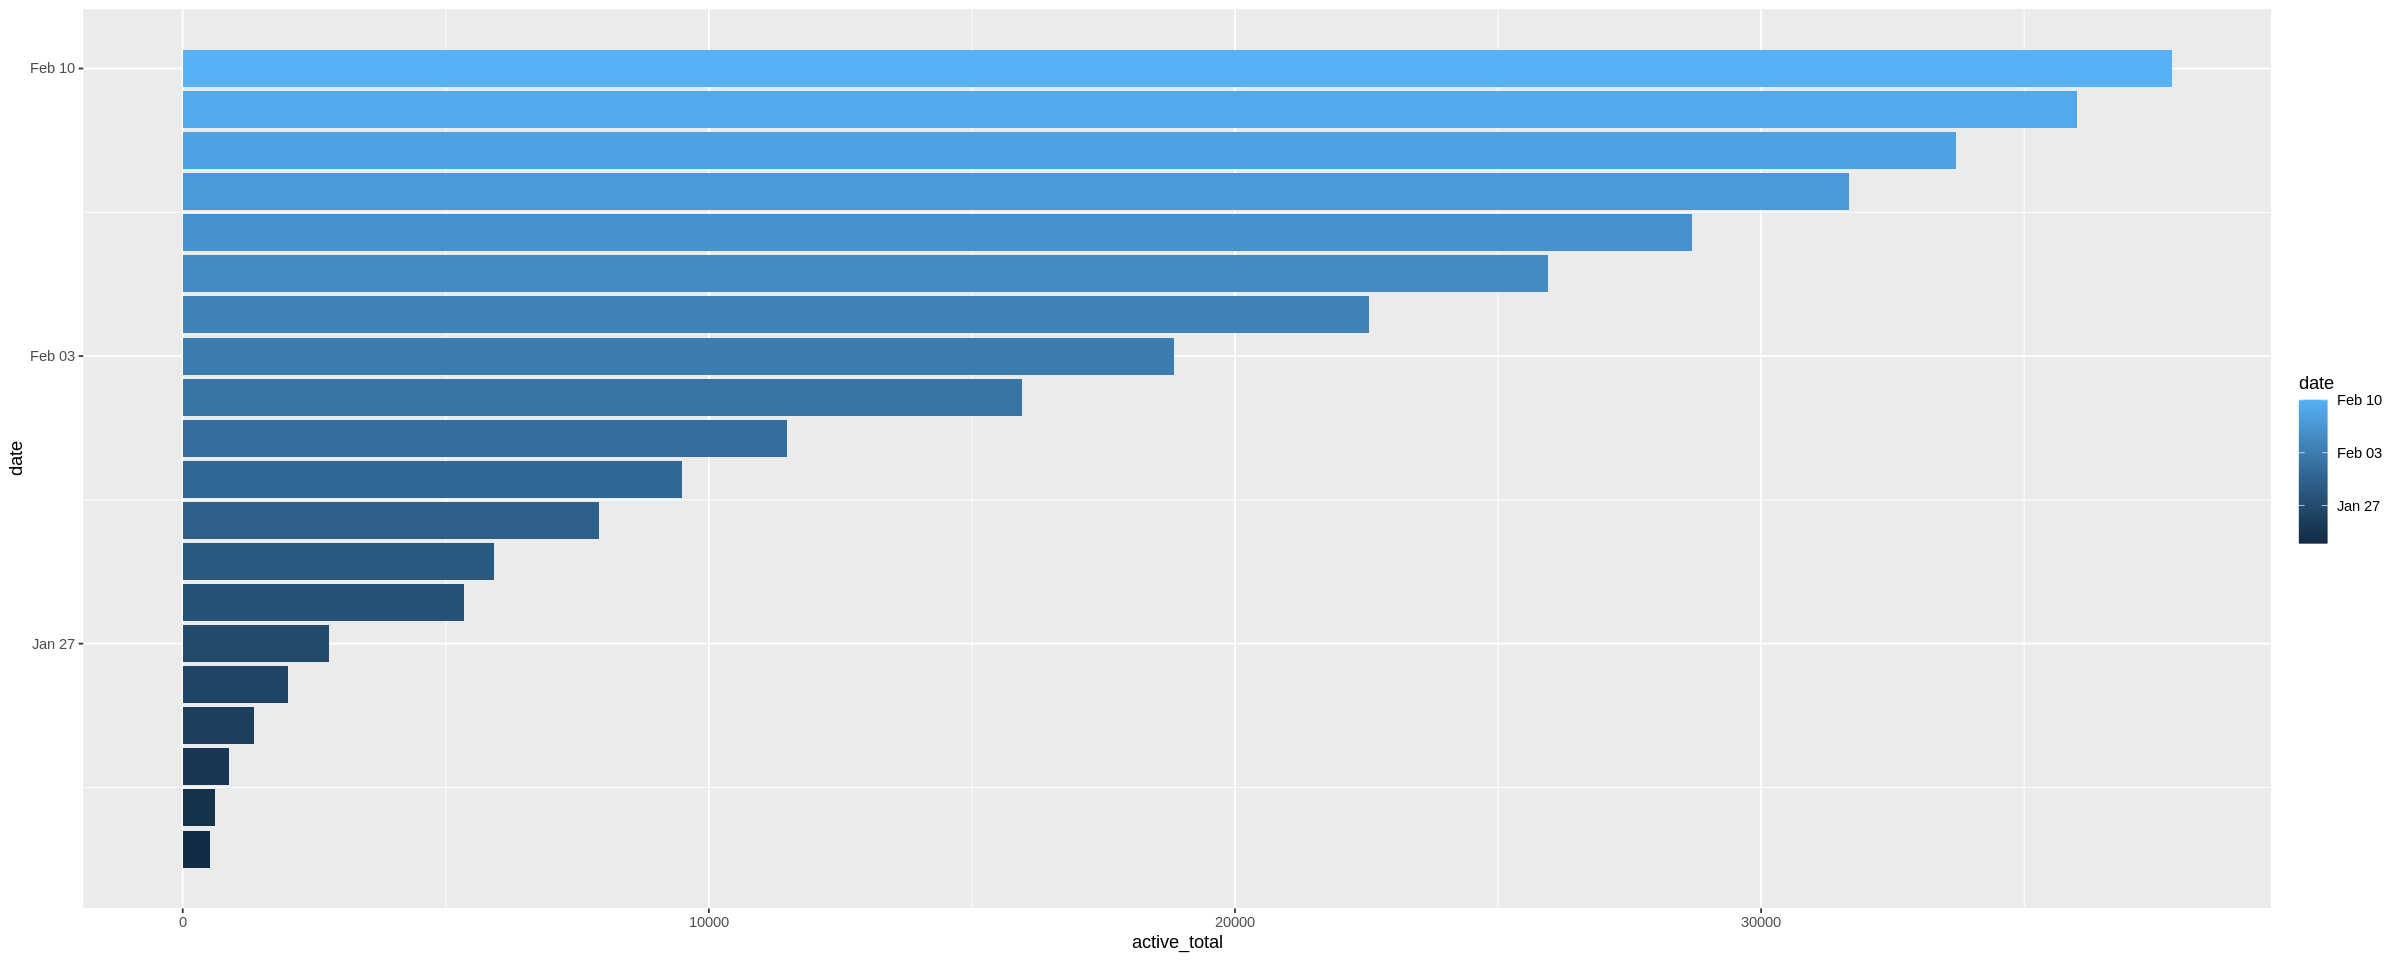

In [ ]:
options(repr.plot.width = 20, repr.plot.height = 8)

ggplot(df %>% head(20), aes(x = date, y = active_total, fill = date)) +  geom_bar(stat = "identity") + coord_flip()

### Recovered Cases Worldwide

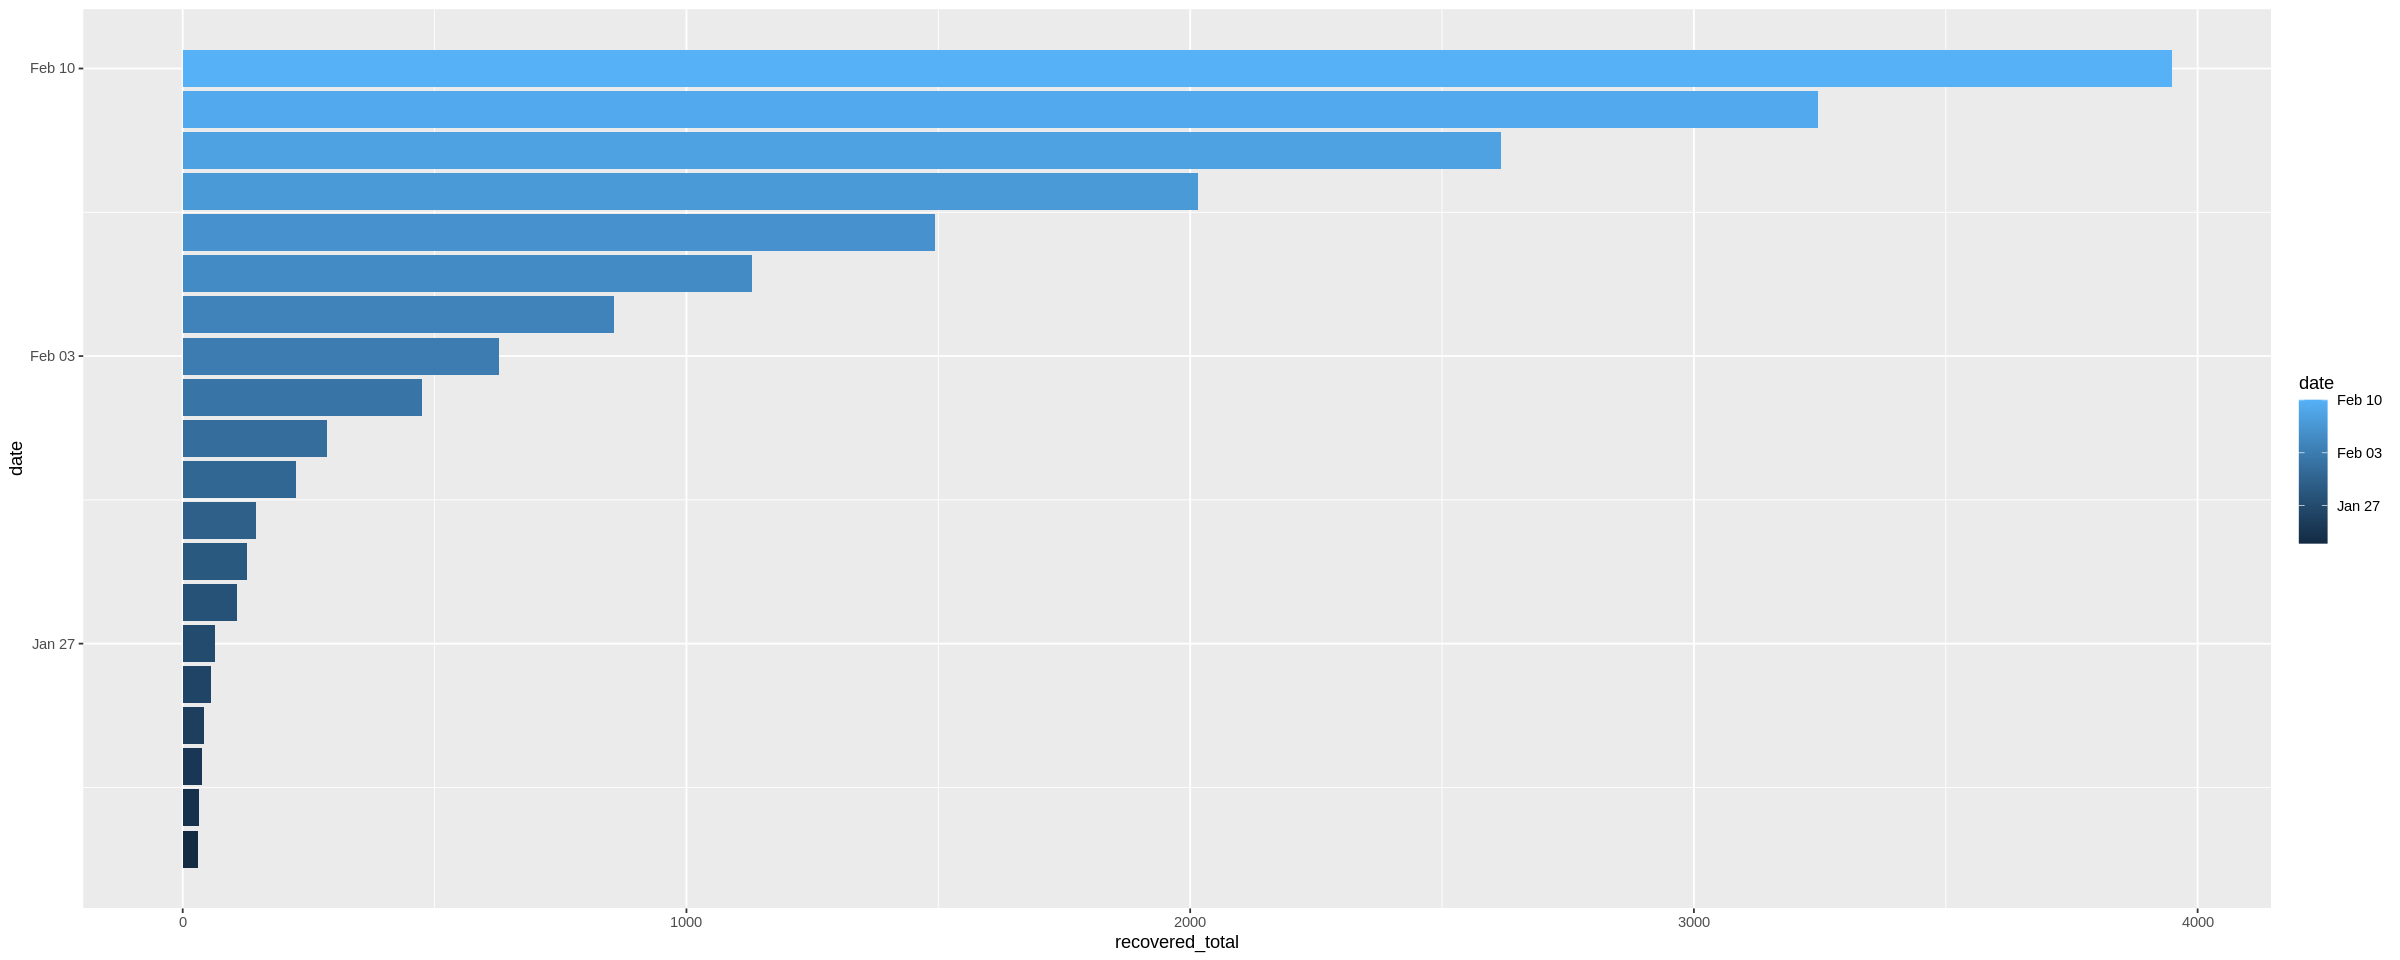

In [ ]:
options(repr.plot.width = 20, repr.plot.height = 8)

ggplot(df %>% head(20), aes(x = date, y = recovered_total, fill = date)) +  geom_bar(stat = "identity") + coord_flip()

### Deaths Worldwide

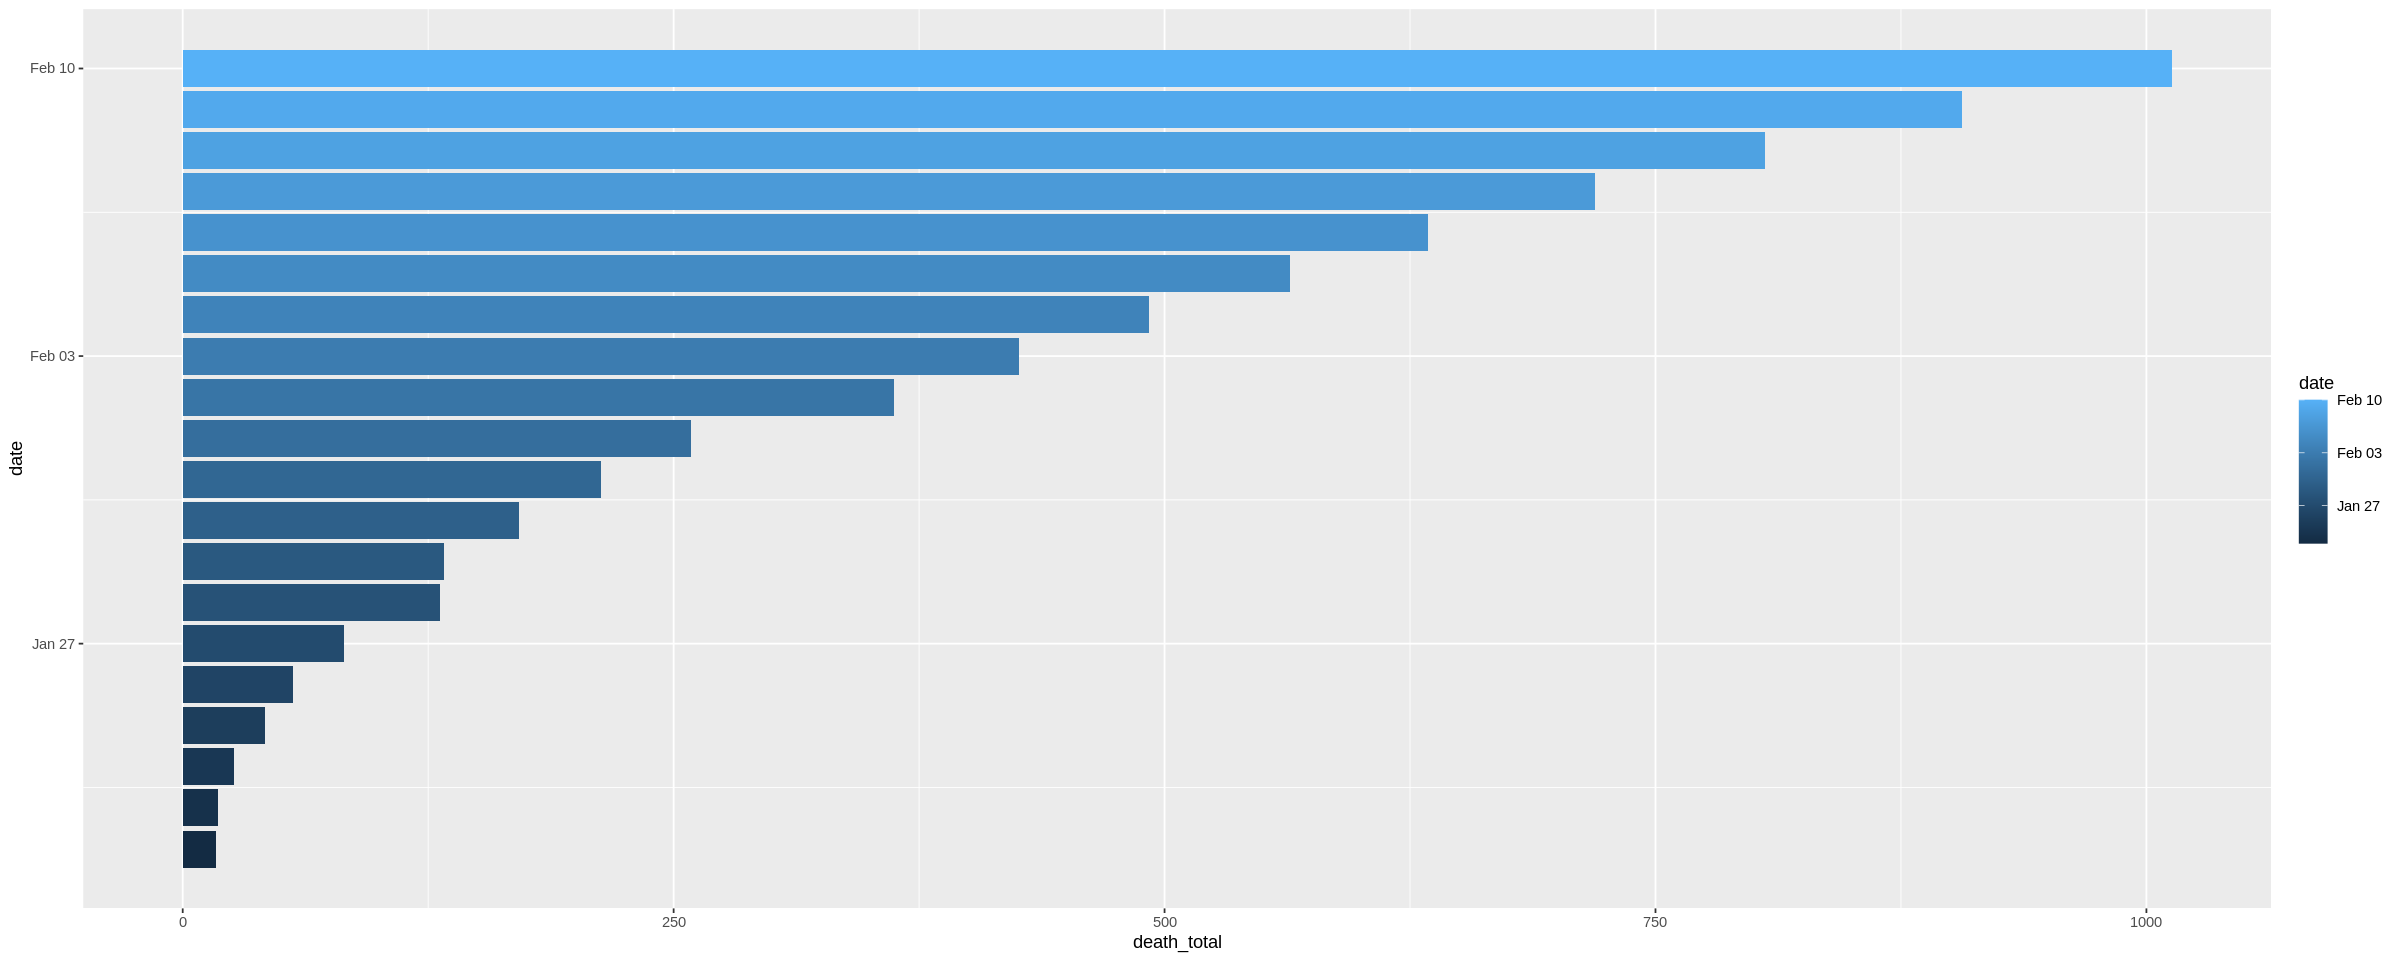

In [ ]:
options(repr.plot.width = 20, repr.plot.height = 8)

ggplot(df %>% head(20), aes(x = date, y = death_total, fill = date)) +  geom_bar(stat = "identity") + coord_flip()

### Total Covid Cases region-wise

In [38]:
summary_df <- coronavirus %>% 
              filter(type == "confirmed") %>%
              group_by(country) %>%
              summarise(total_cases = sum(cases)) %>%
              arrange(-total_cases)

Warning message:
“Ignoring unknown aesthetics: x, y”


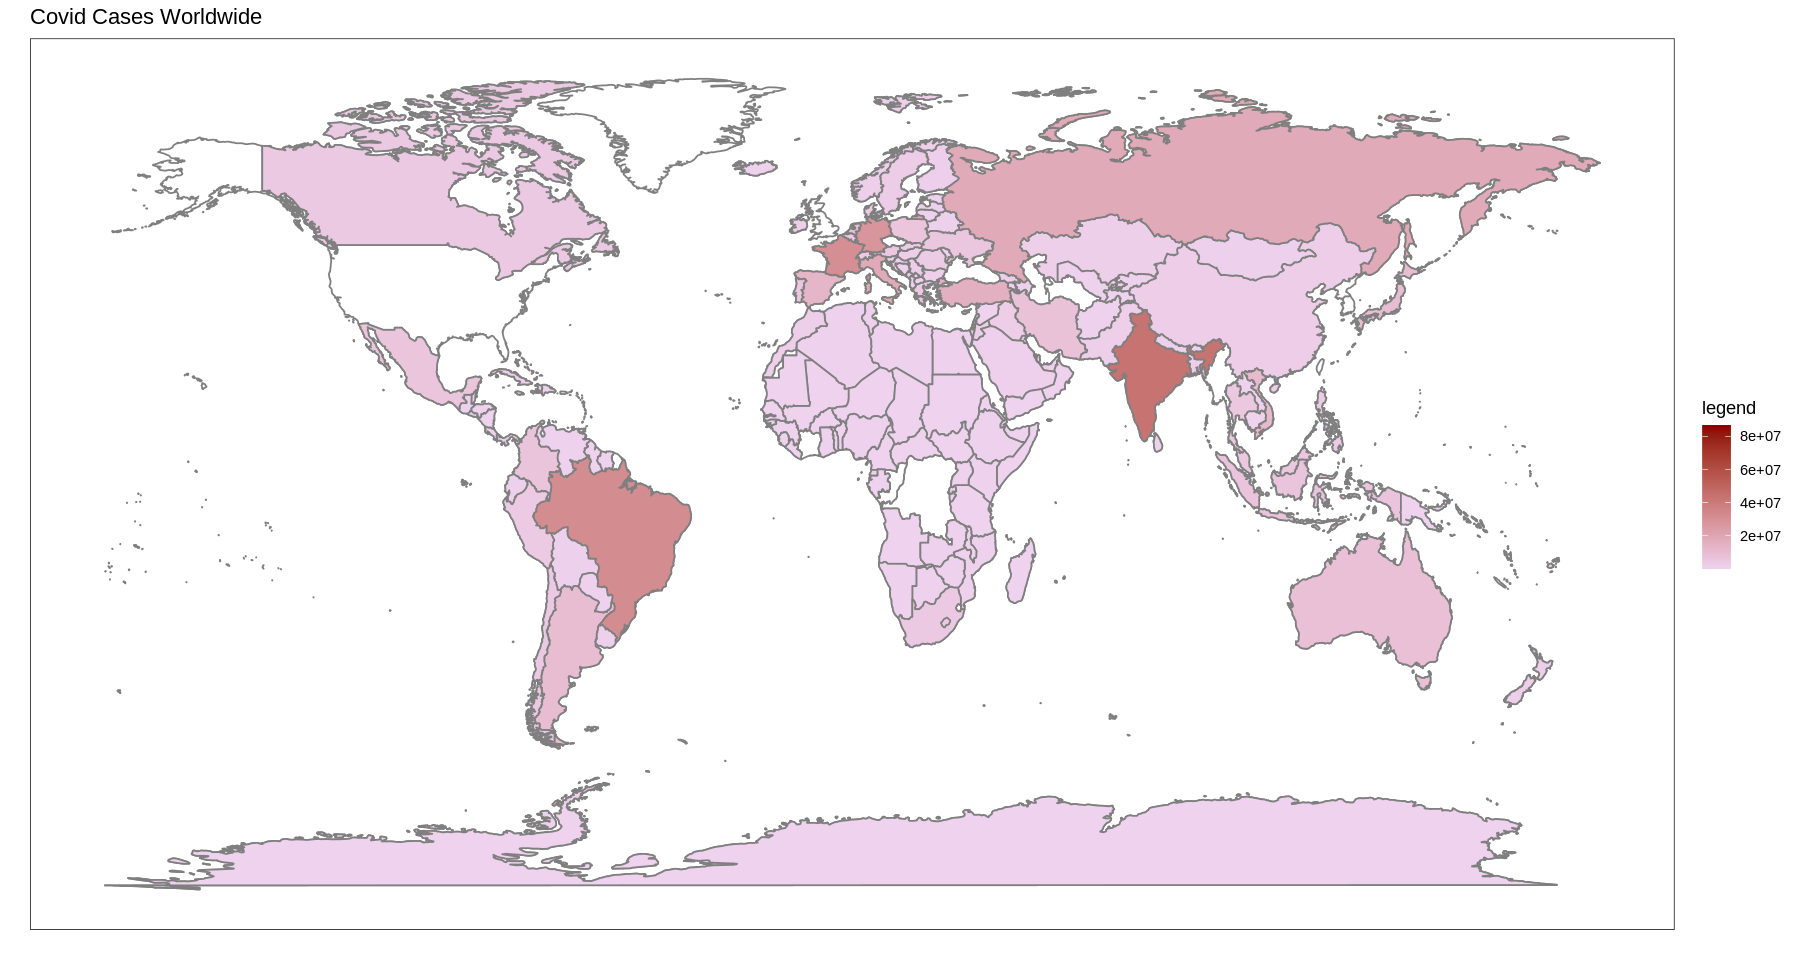

In [40]:
WorldData <- map_data('world')

df_world <- data.frame(region = summary_df[["country"]], 
                 value = summary_df[["total_cases"]], 
                 stringsAsFactors = FALSE)

p <- ggplot() +
    geom_map(data = WorldData, map = WorldData,
                  aes(x = long, y = lat, group = group, map_id = region),
                  fill = "white", colour = "#7f7f7f", size = 0.5) + 
    geom_map(data = df_world, map = WorldData,
                  aes(fill = value, map_id = region),
                  colour = "#7f7f7f", size = 0.5) +
    scale_fill_continuous(low = "thistle2", high = "darkred", guide = "colorbar") +
    scale_y_continuous(breaks=c()) +
    scale_x_continuous(breaks=c()) +
    labs(fill = "legend", title = "Title", x = "", y = "") +
    theme_bw() +
    ggtitle("Covid Cases Worldwide")

options(repr.plot.width = 15, repr.plot.height = 8)
p

### Top 20 most affected countries in terms of total no. of covid cases

In [37]:
summary_df %>% head(20)

country,total_cases
<chr>,<int>
US,86757621
India,43362294
Brazil,31962782
France,30634890
Germany,27681775
United Kingdom,22769958
"Korea, South",18312993
Russia,18140893
Italy,18071634


### A visualization of cumulative COVID-19 cases in the 20 most affected countries

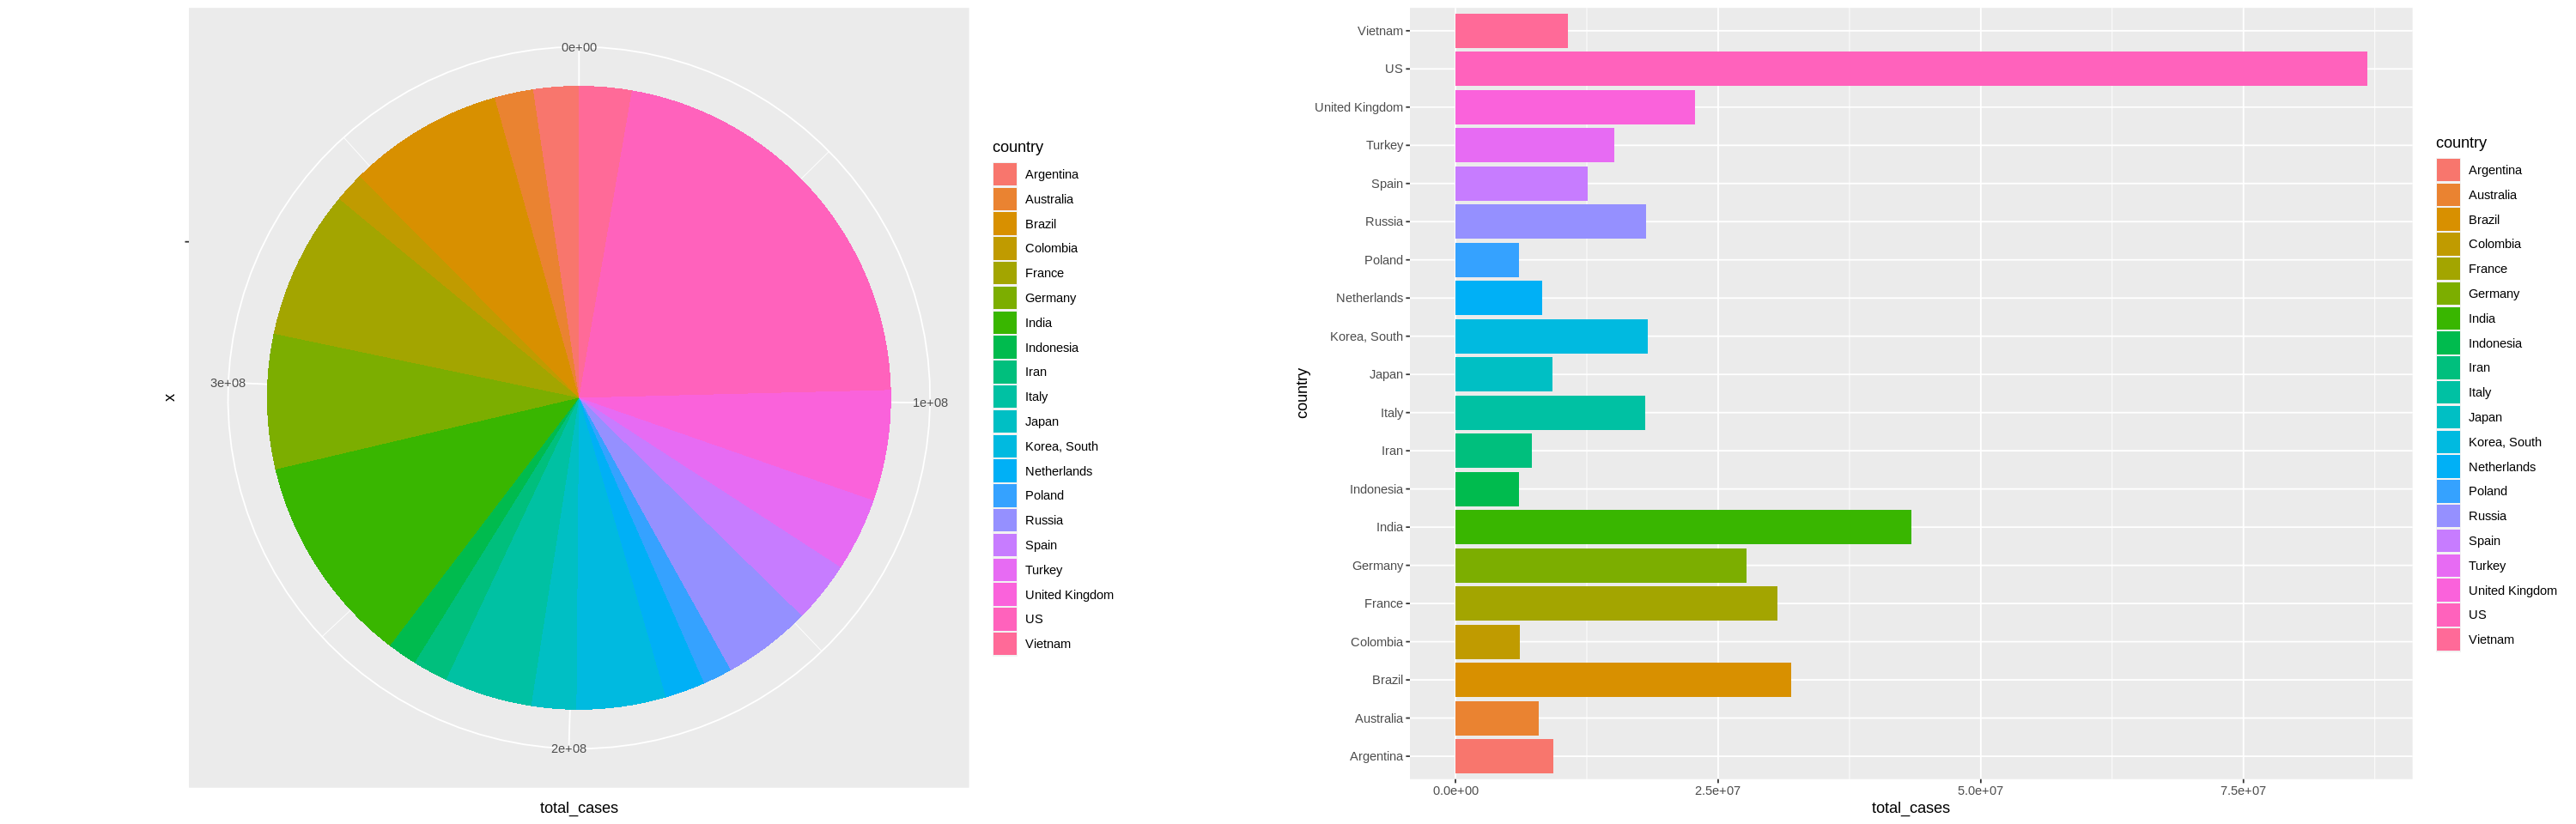

In [ ]:
pie_plot <- ggplot(summary_df %>% head(20), aes(x = "", y = total_cases, fill = country)) +
            geom_bar(stat = "identity", width = 1) +
            coord_polar("y", start=0)

bar_plot <- ggplot(summary_df %>% head(20), aes(x = country, y = total_cases, fill = country)) +  
            geom_bar(stat = "identity") + coord_flip()

options(repr.plot.width = 25, repr.plot.height = 8)
plot_grid(pie_plot, bar_plot, ncol = 2, nrow = 1)

### Cummulative Covid Cases in provinces of Canada, United Kingdom, China, Netherlands and Australia

In [ ]:
df1 <- unique(select(coronavirus, country, province)) %>%
       group_by(country)

canada_prov <- df1 %>% filter(country == "Canada")
uk_prov <- df1 %>% filter(country == "United Kingdom")
china_prov <- df1 %>% filter(country == "China")
netherlands_prov <- df1 %>% filter(country == "Netherlands")
australia_prov <- df1 %>% filter(country == "Australia")

Removing rows with NA entries :

In [ ]:
canada_prov = na.omit(canada_prov)
uk_prov = na.omit(uk_prov)
china_prov = na.omit(china_prov)
netherlands_prov = na.omit(netherlands_prov)
australia_prov = na.omit(australia_prov)

In [ ]:
cases_plot <- function(location)
{
    df1 <- coronavirus %>% 
                filter(province == location) %>% 
                filter(type == "confirmed") %>%
                mutate(covid_cases = cumsum(cases))

    df <- select(df1, date, covid_cases) %>% filter(covid_cases != 0)

    options(repr.plot.width = 12, repr.plot.height = 5)
    plot <- ggplot(df, aes(x = date, y = covid_cases, fill = date)) +  
            geom_bar(stat = "identity") +
            ggtitle(location)

    print(plot)
}

### **Canada Covid Plot**

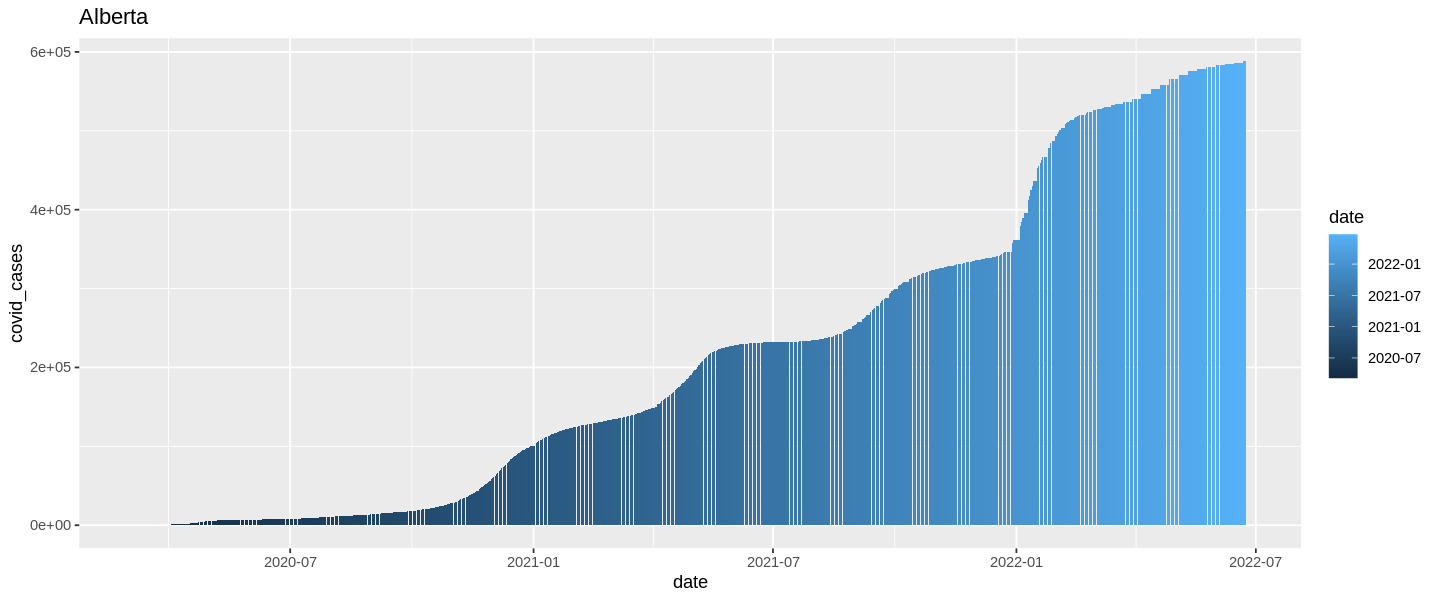

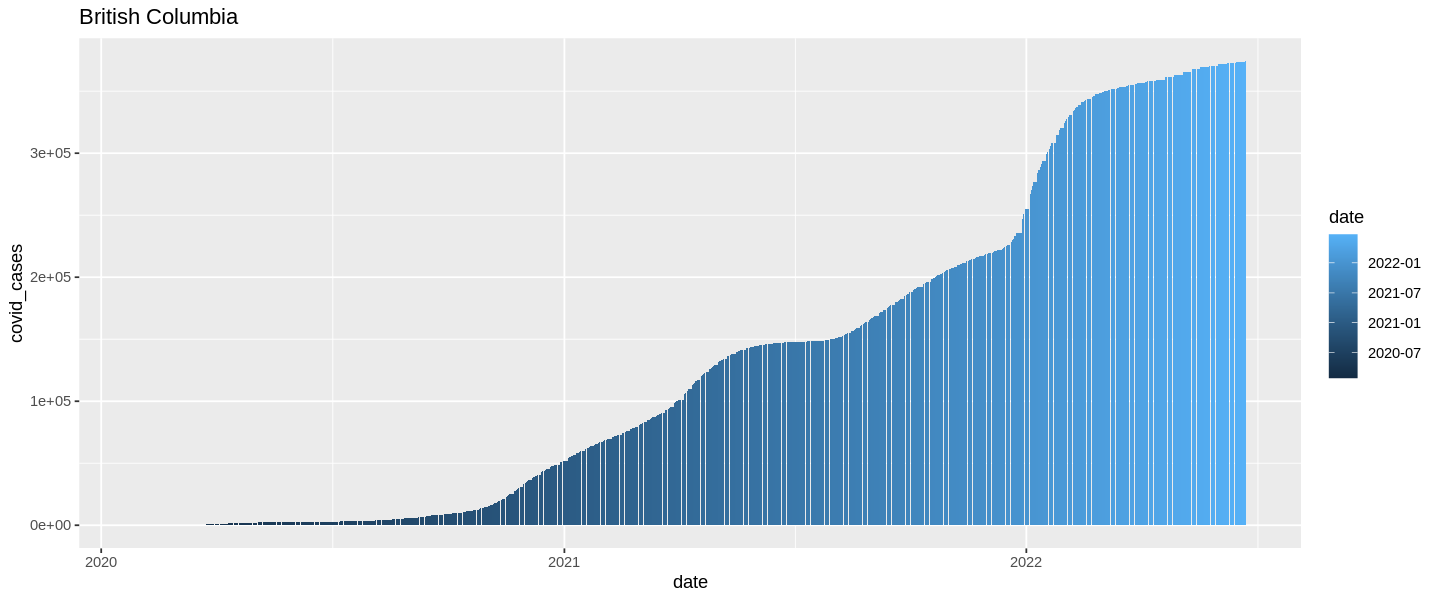

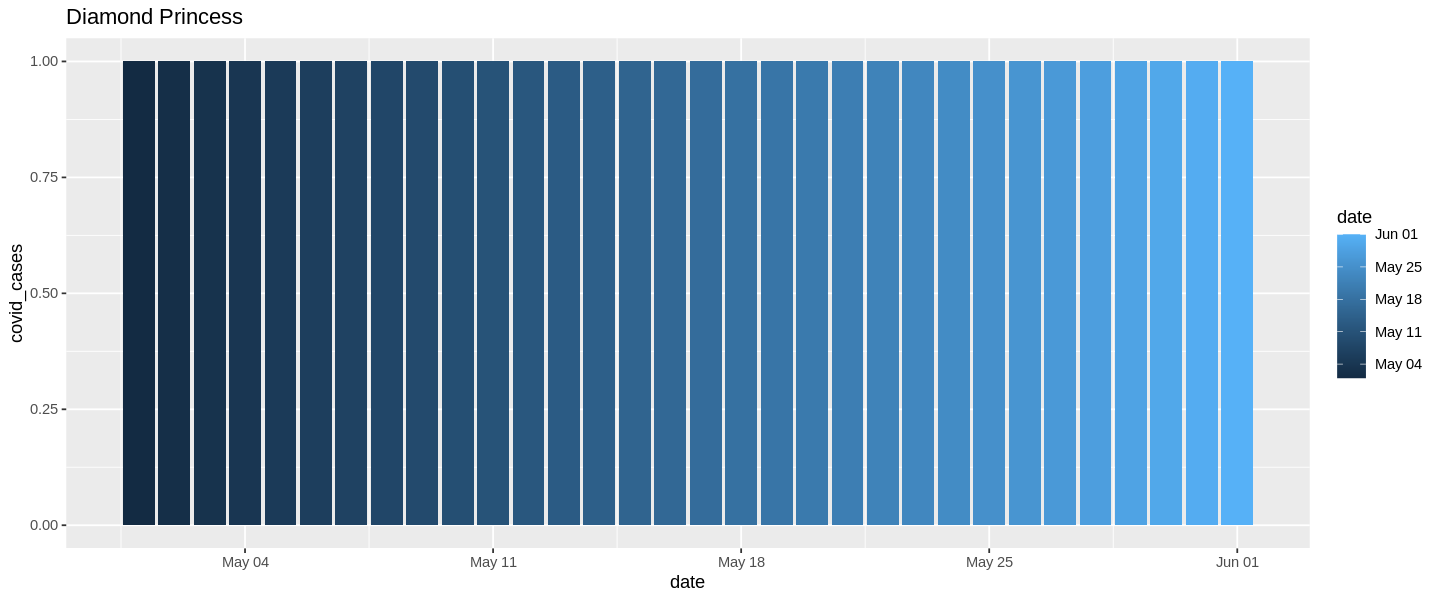

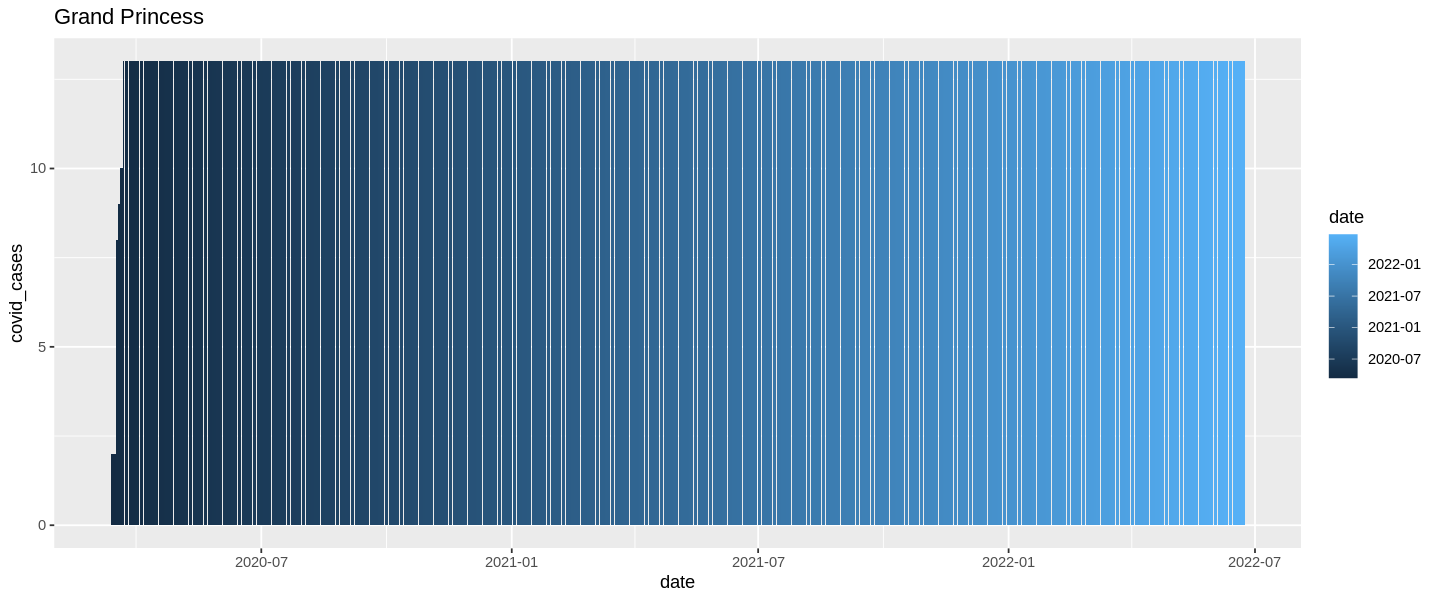

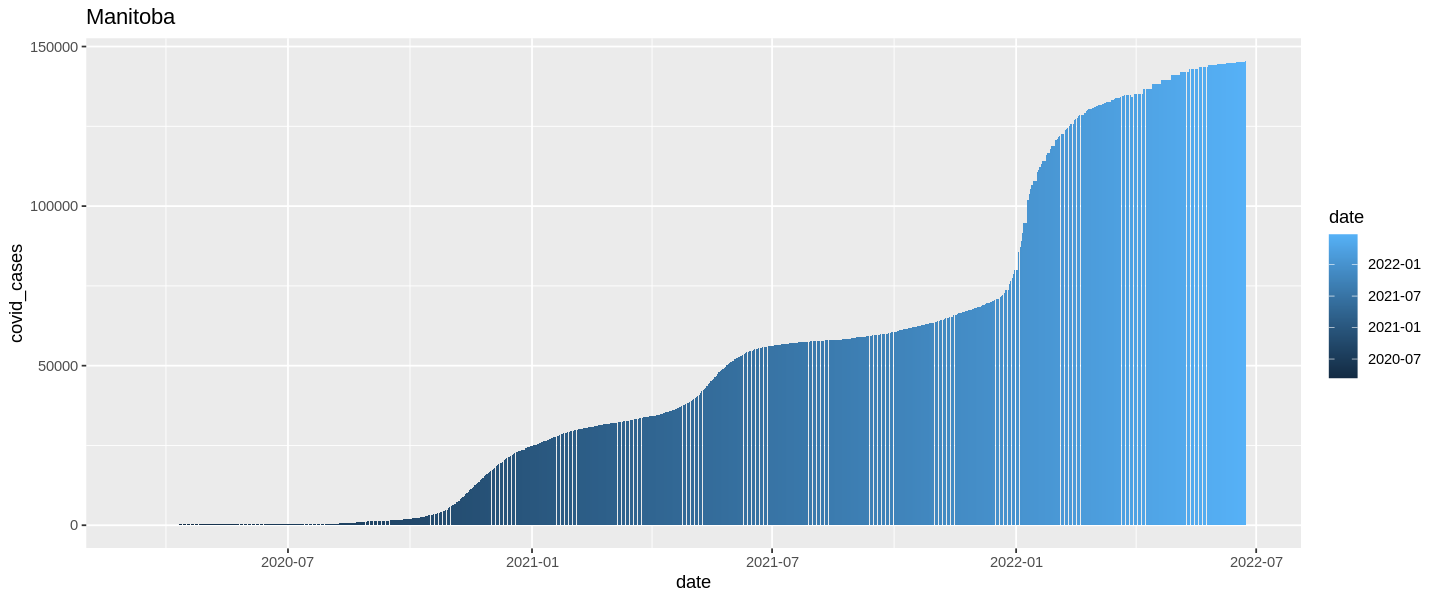

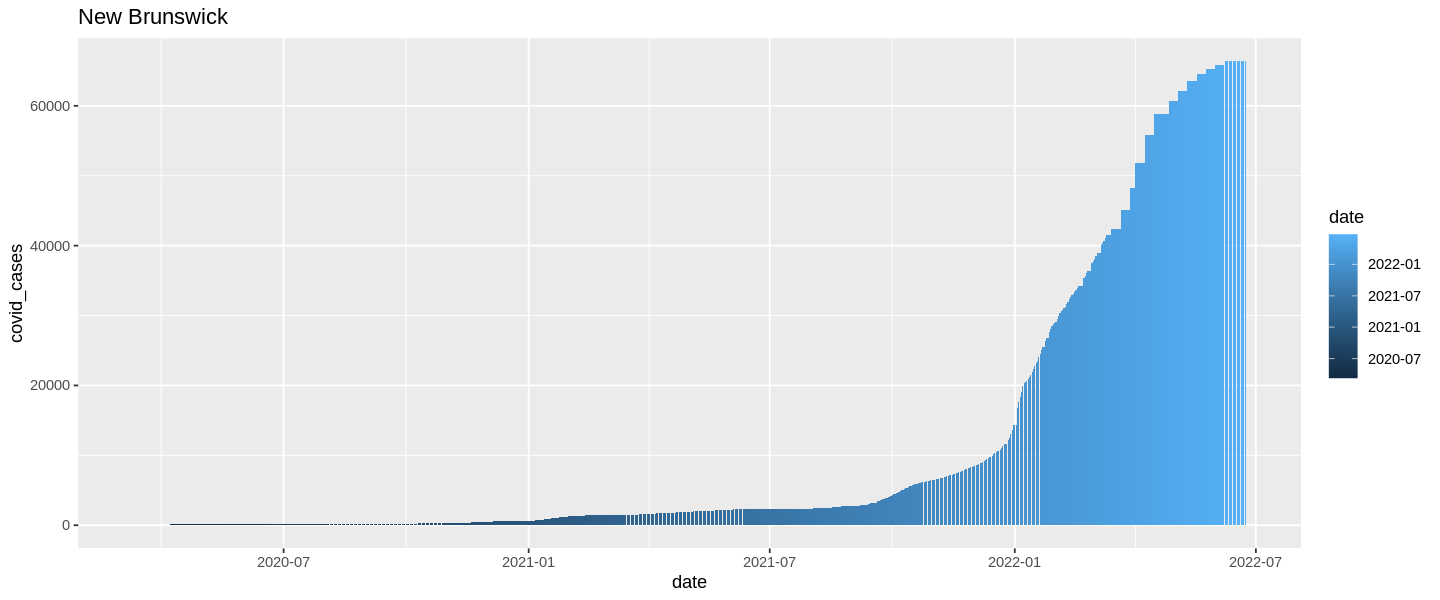

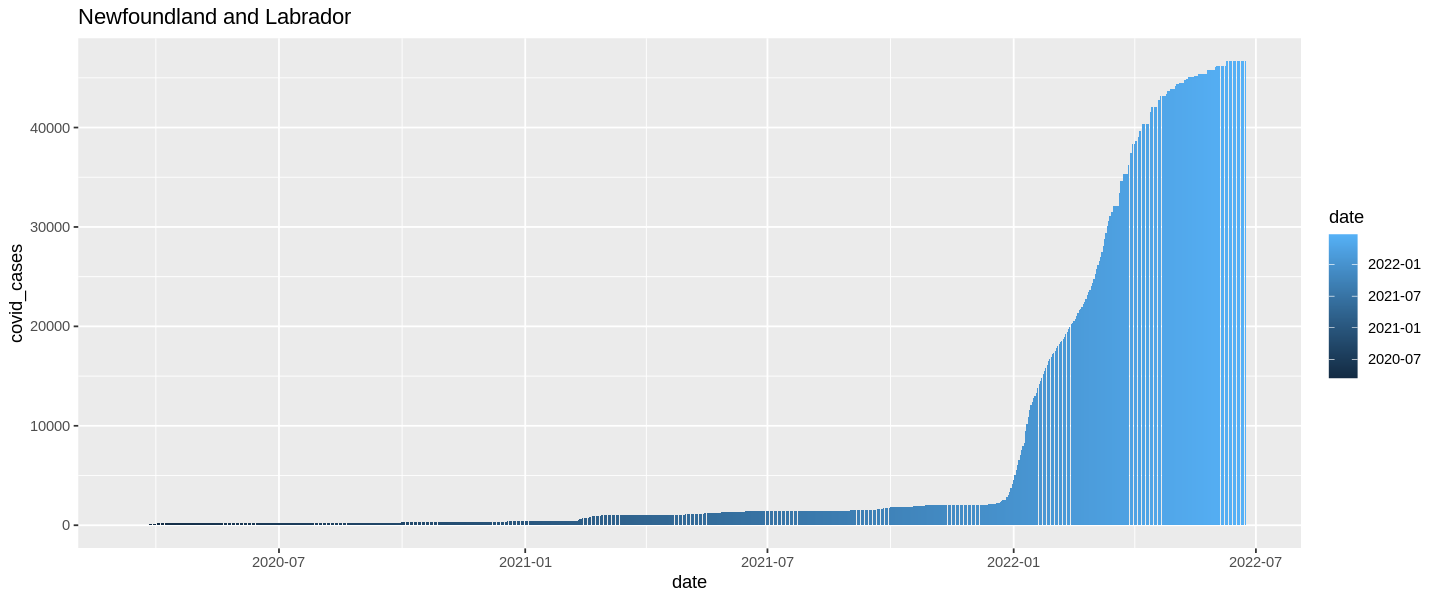

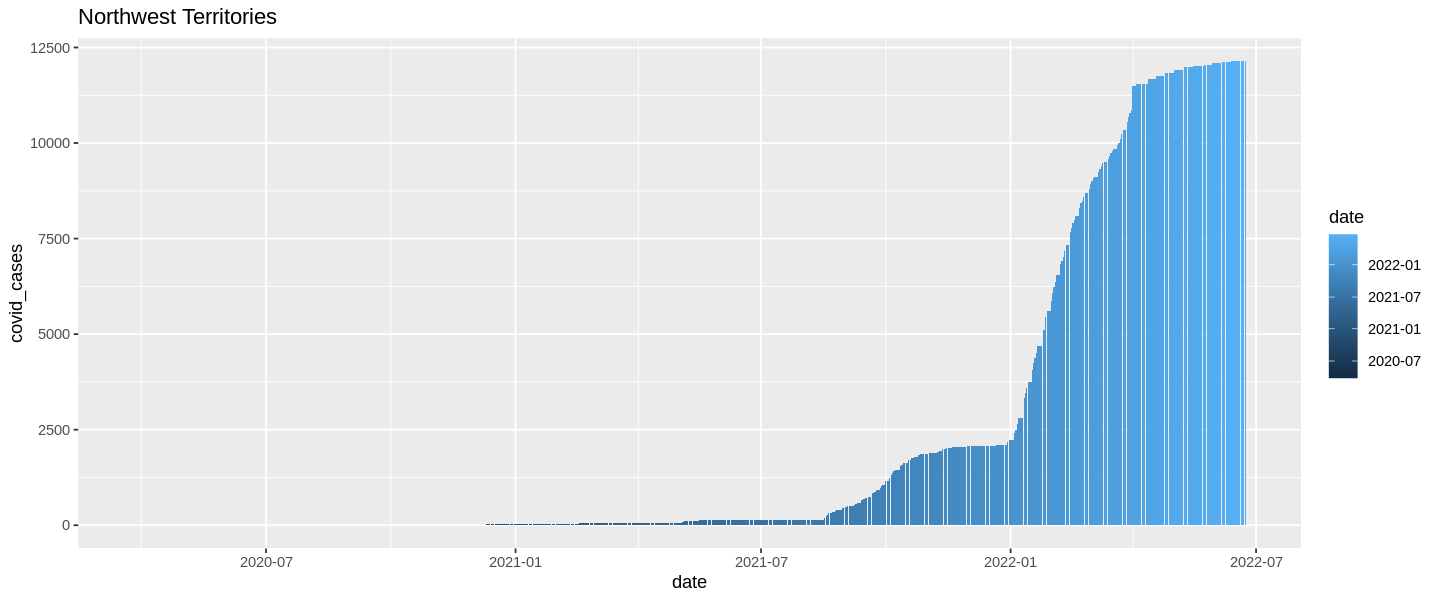

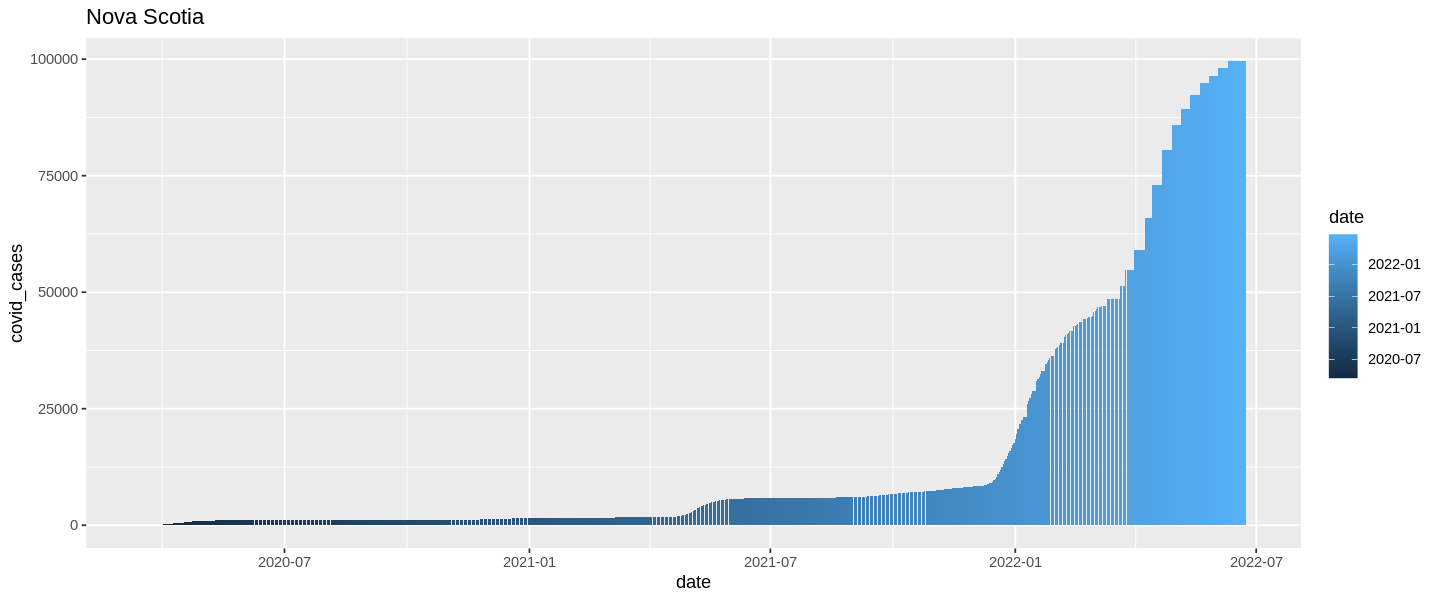

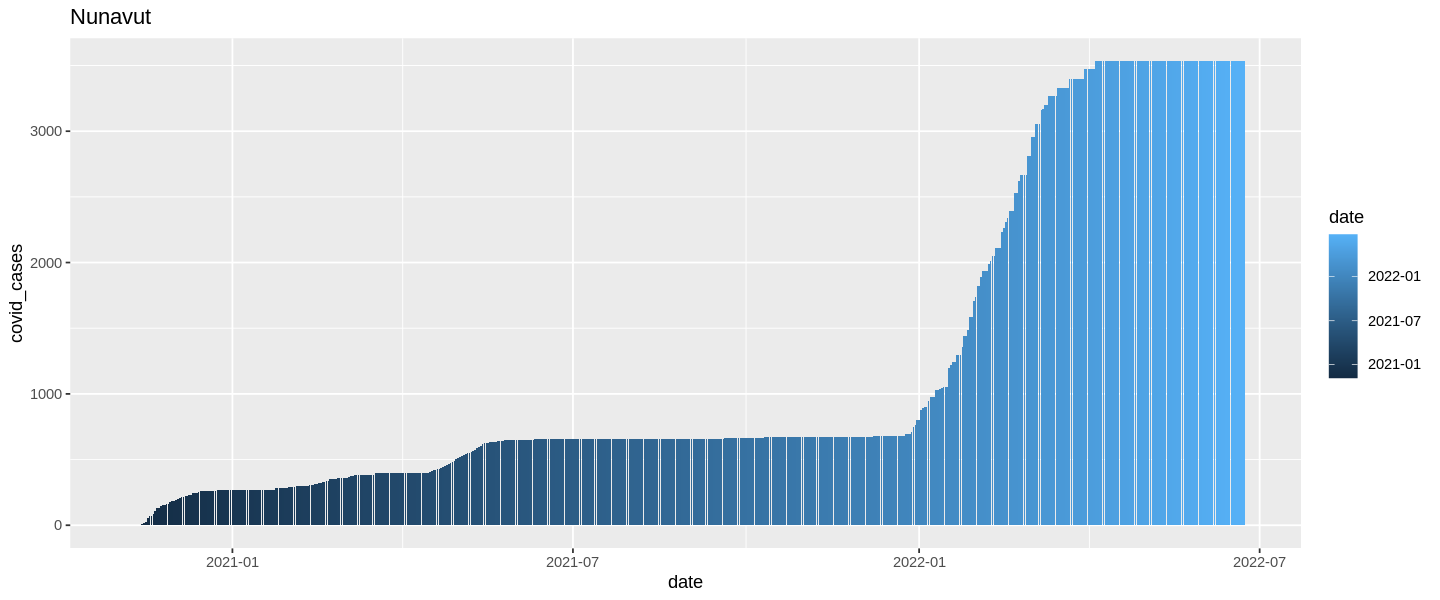

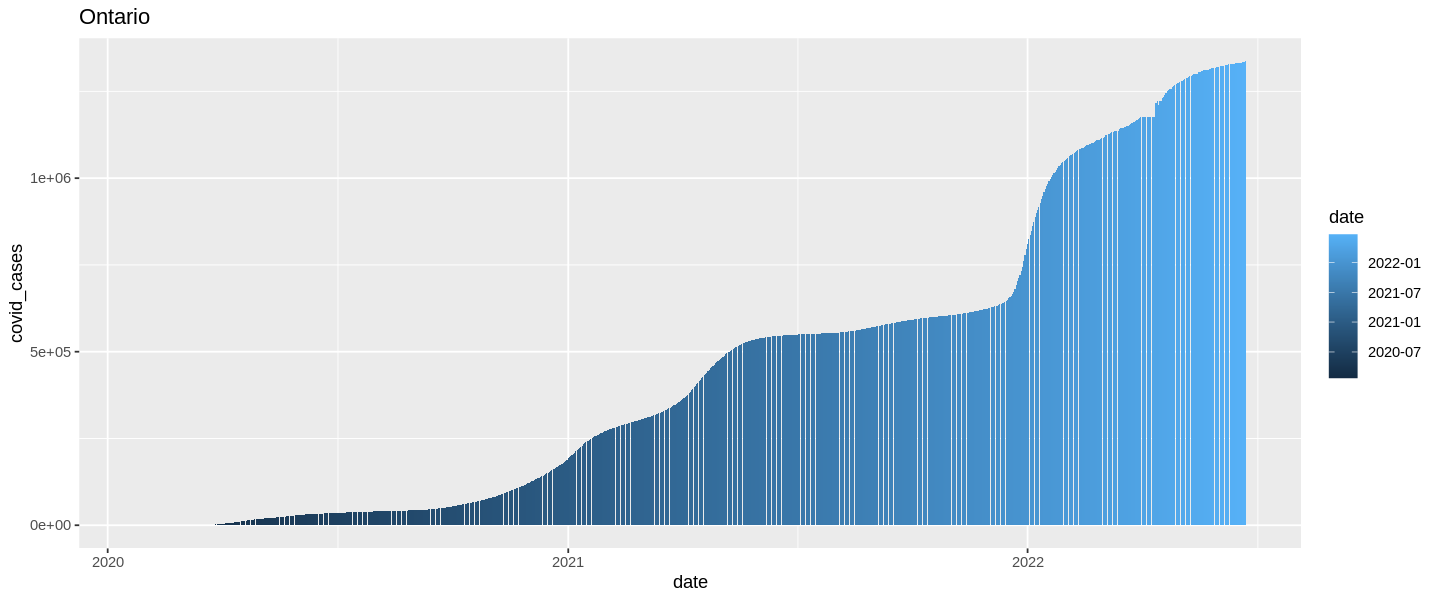

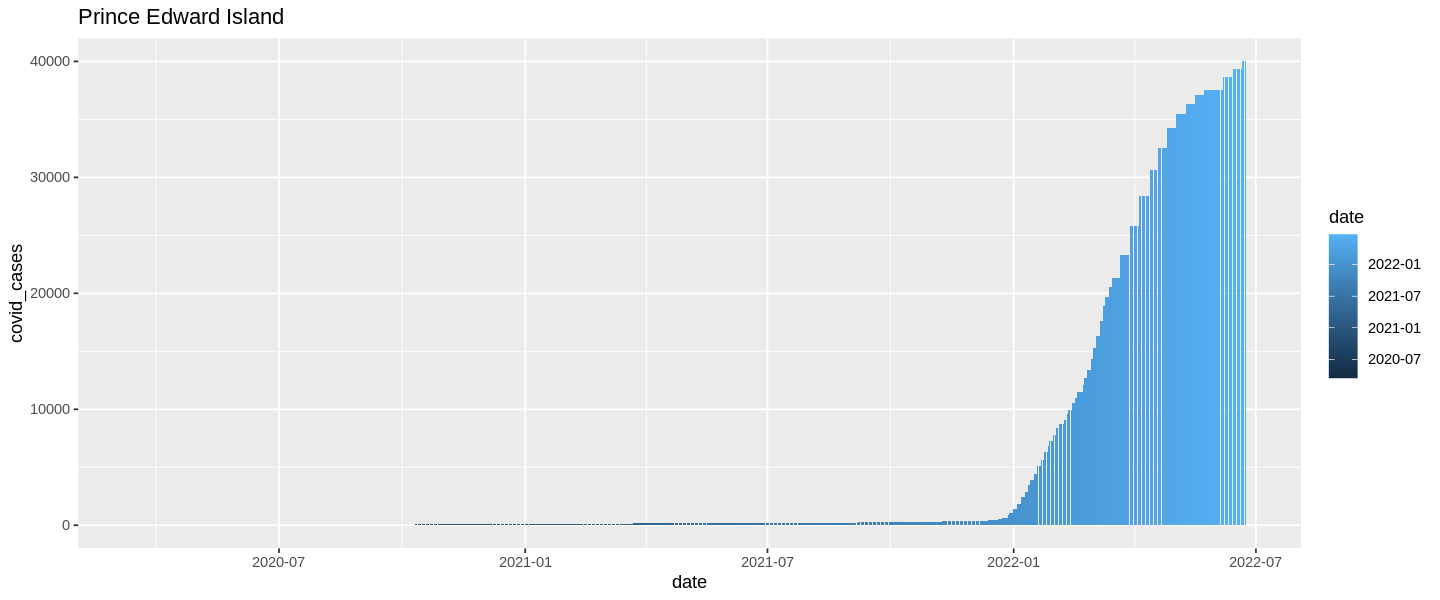

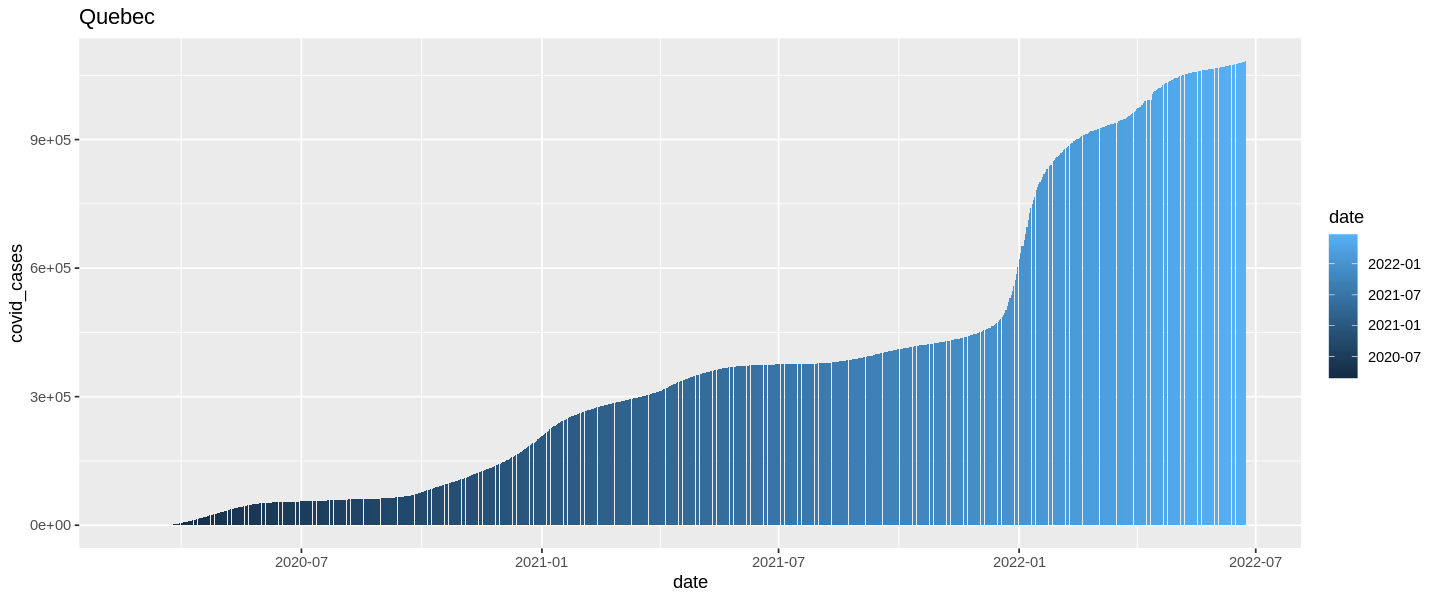

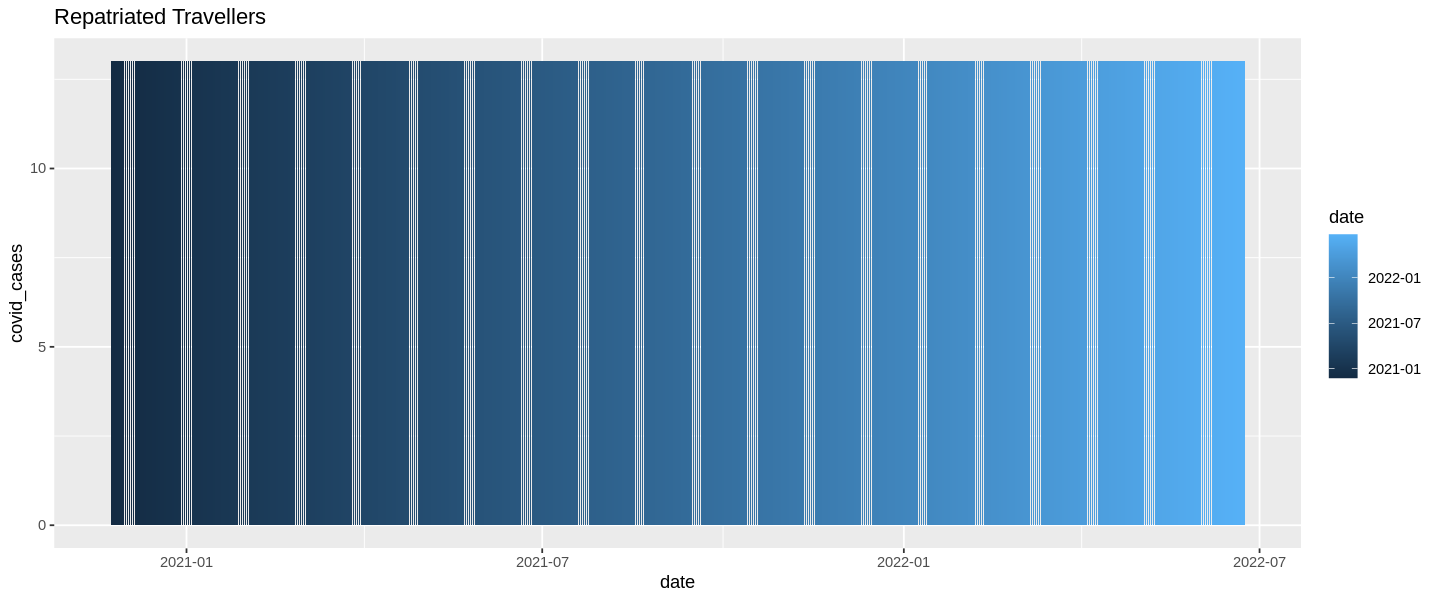

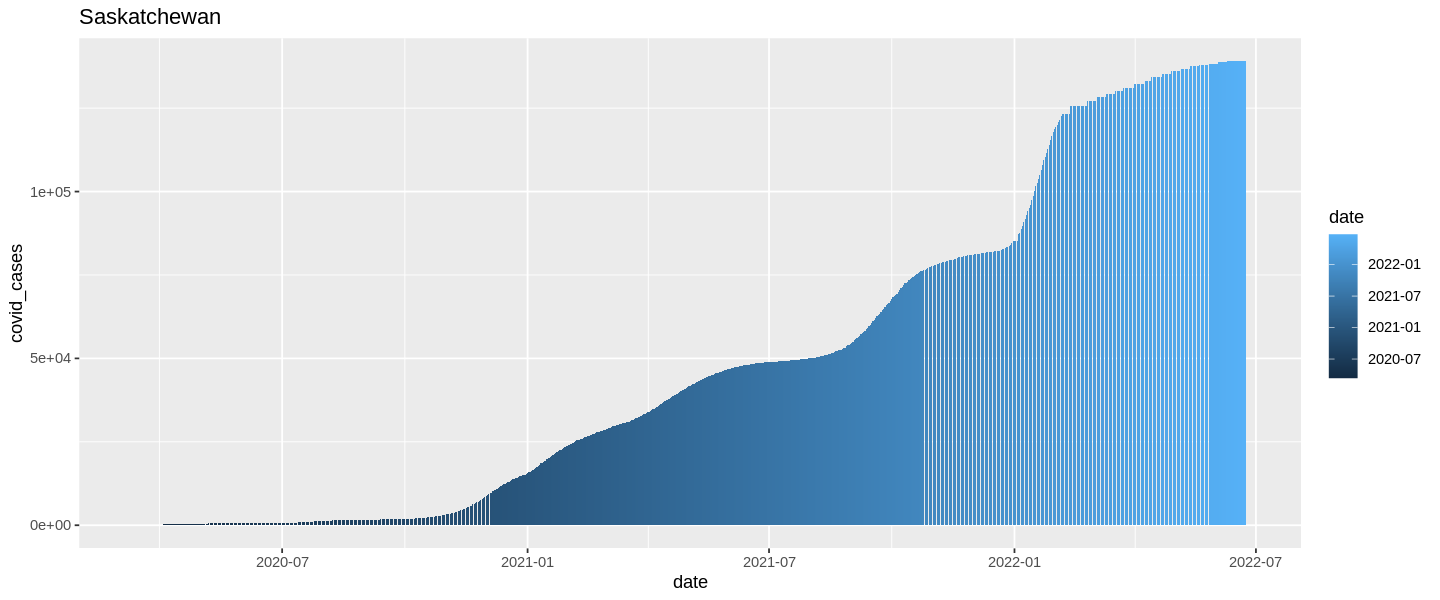

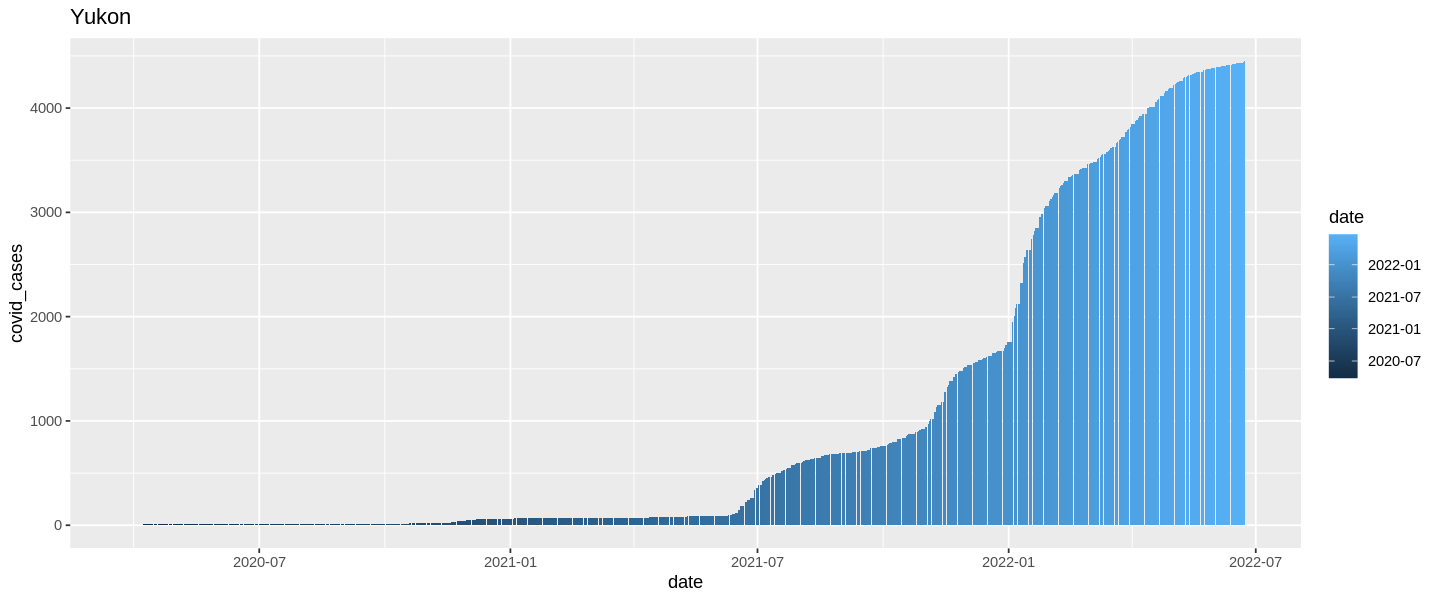

In [ ]:
for (province in canada_prov$province)
{
    cases_plot(province)
}

### **UK Covid Plot**

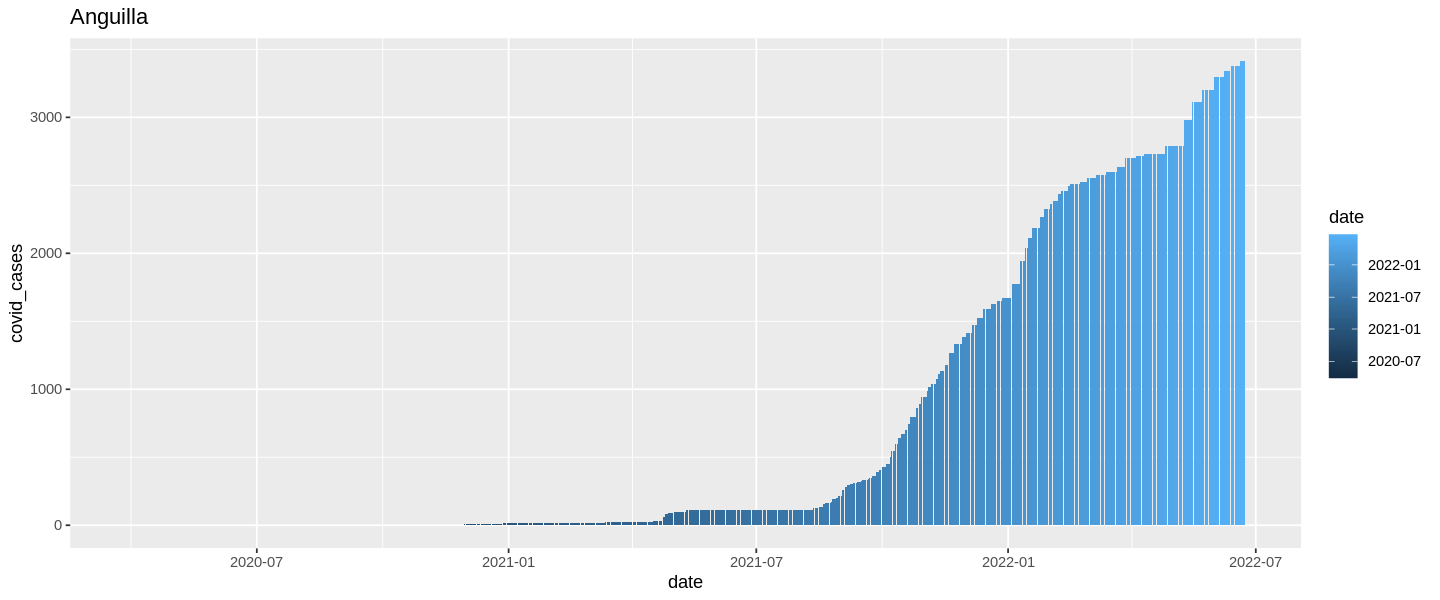

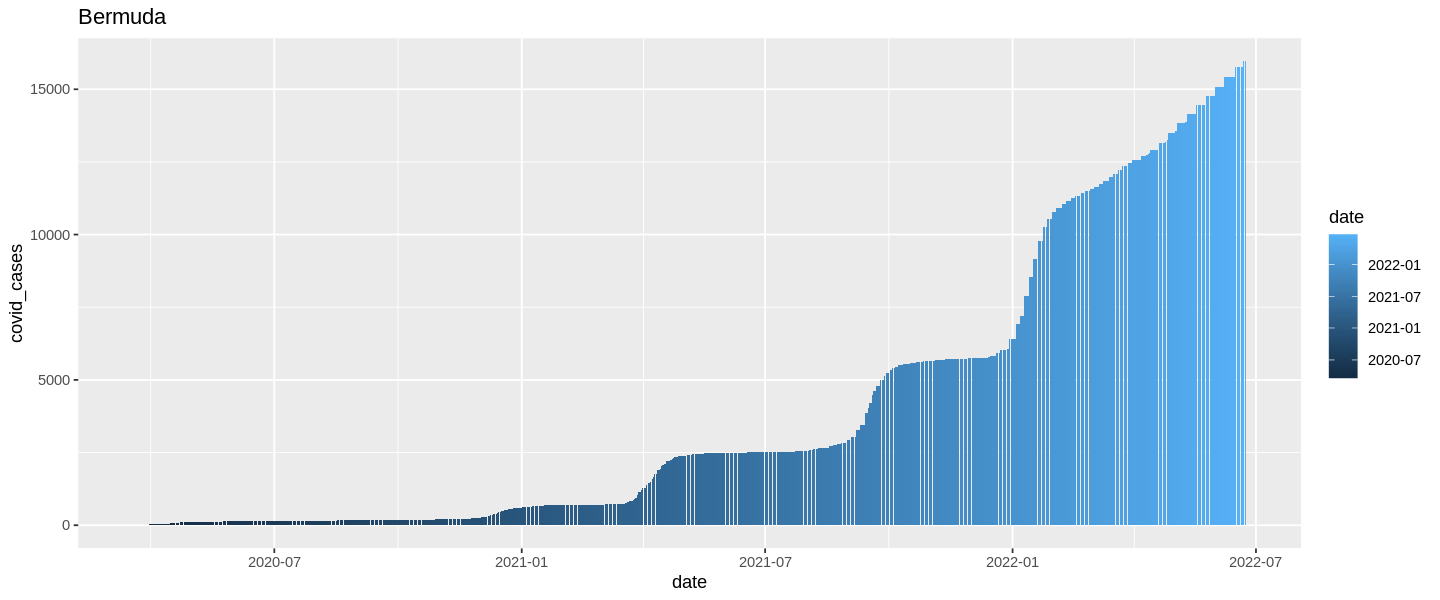

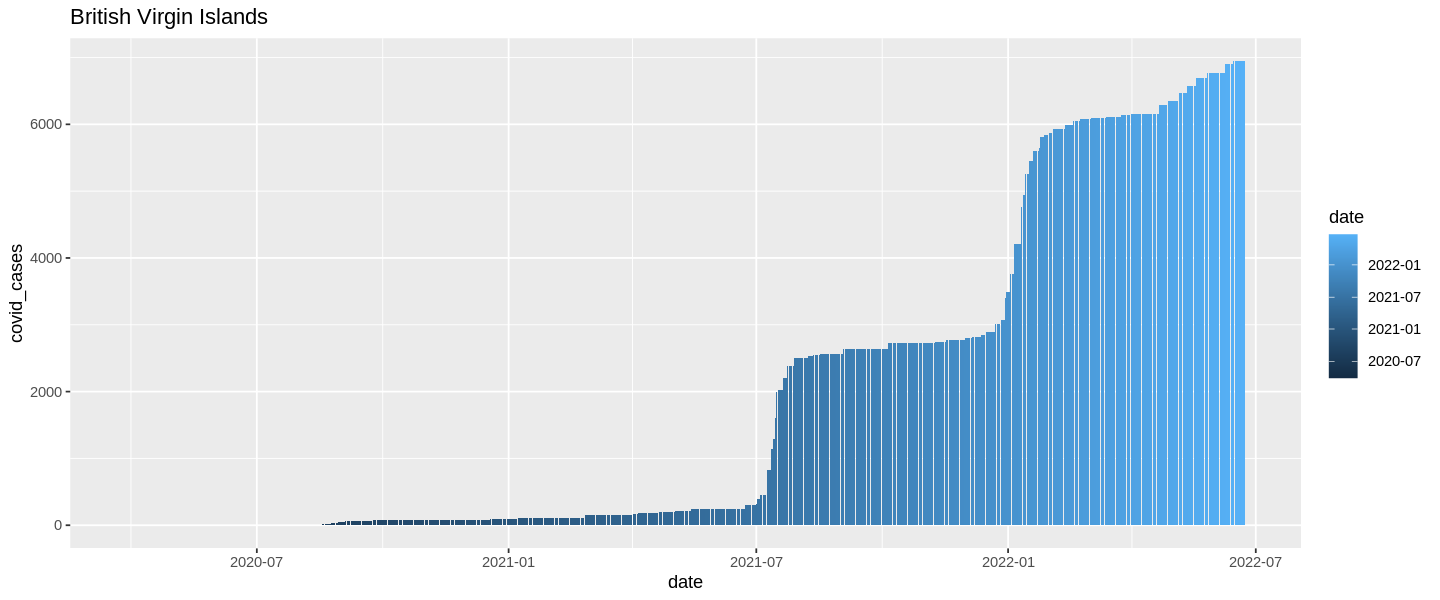

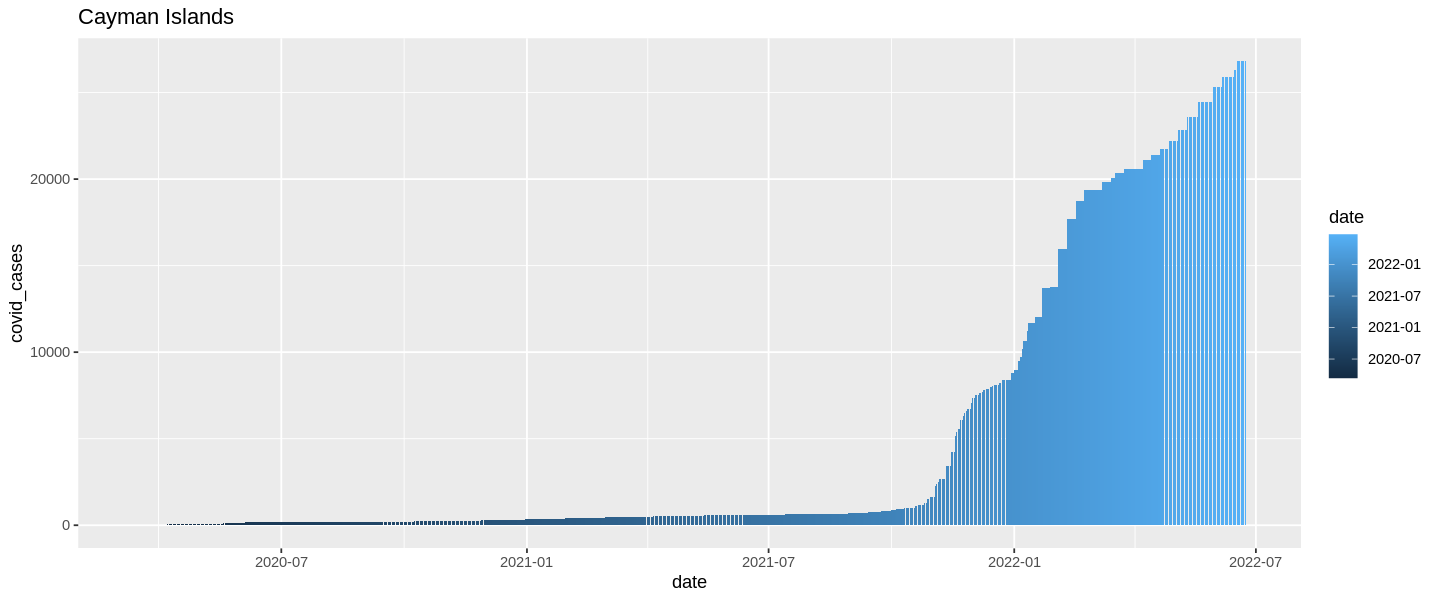

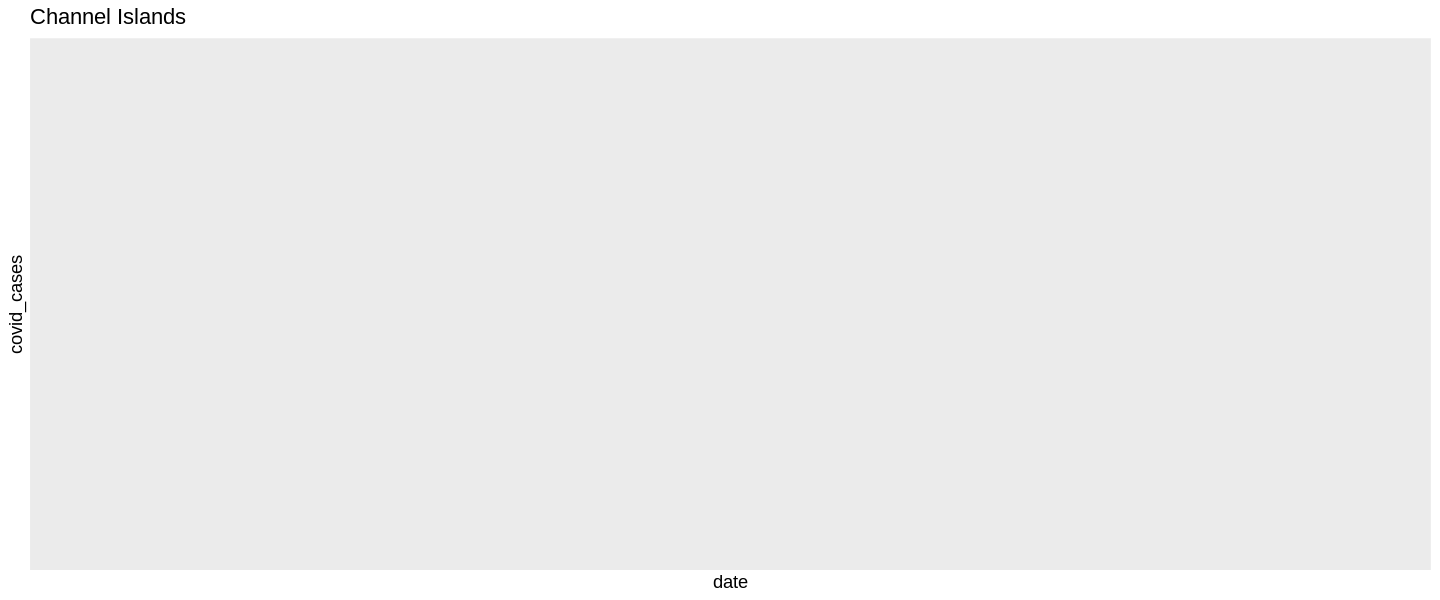

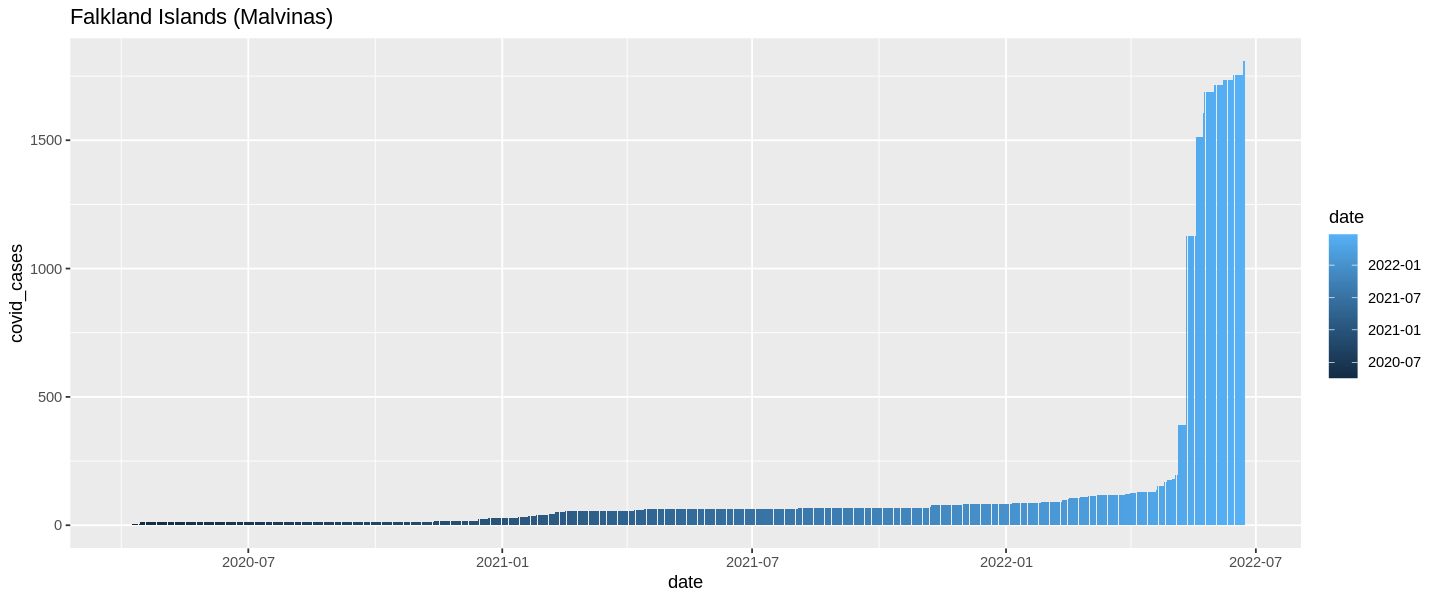

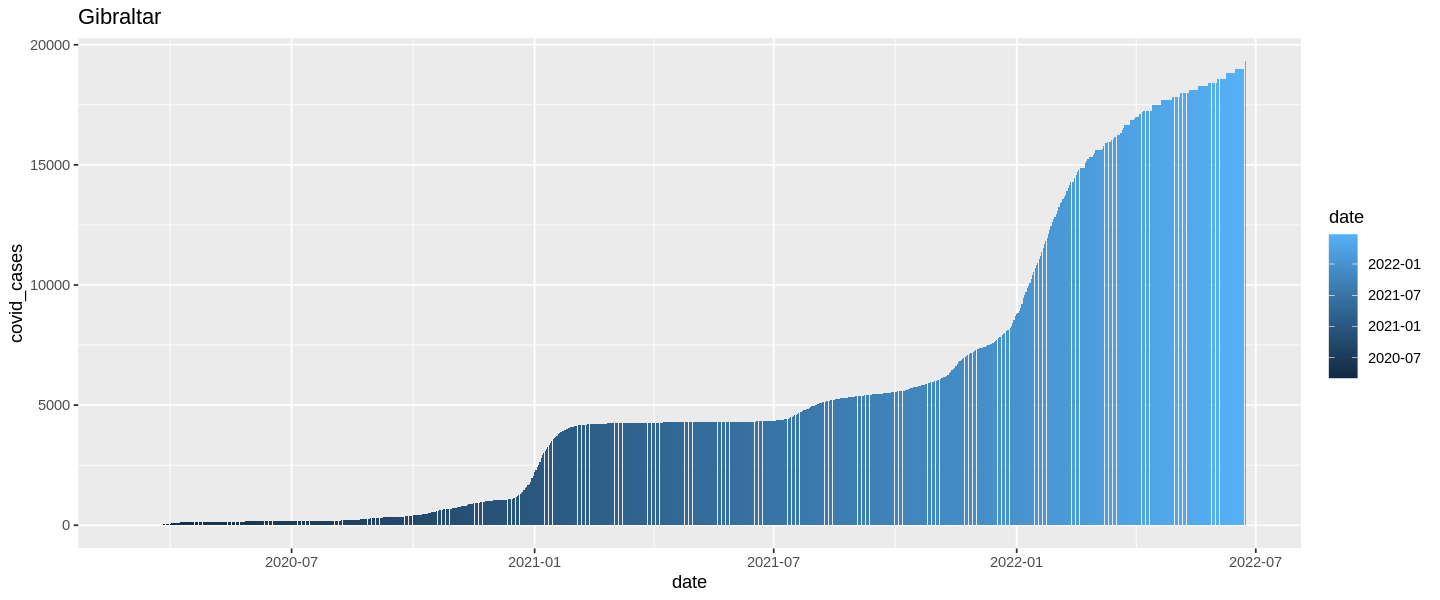

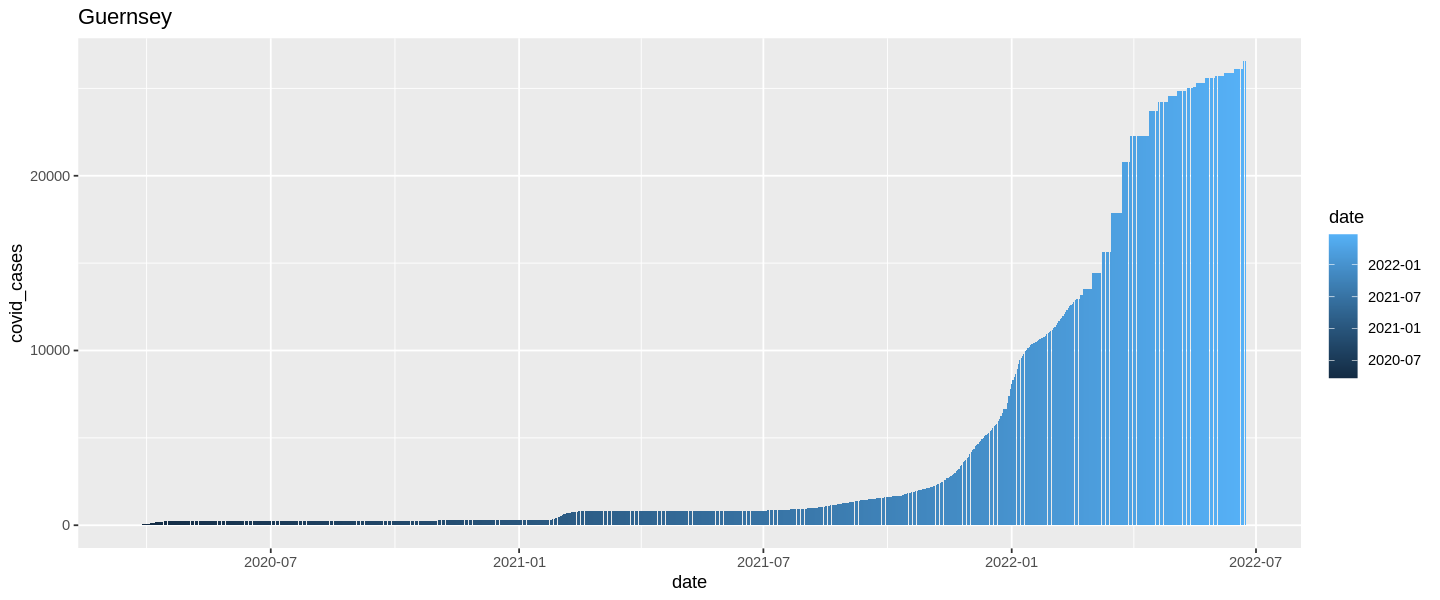

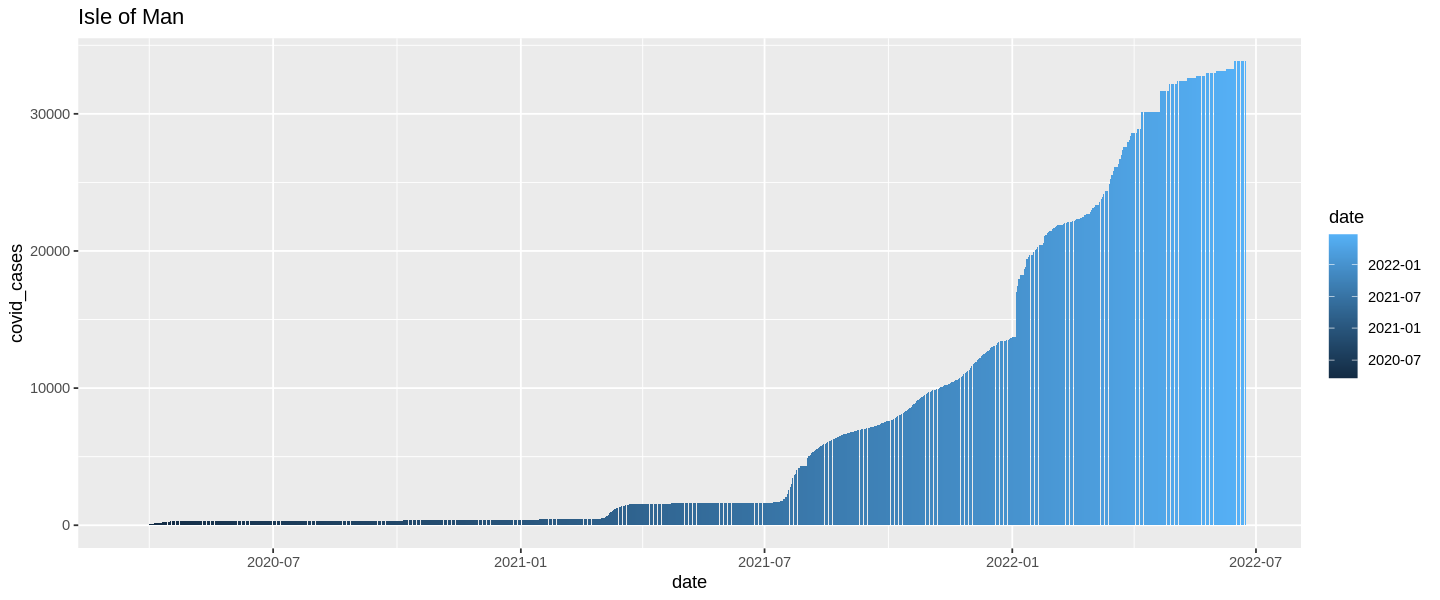

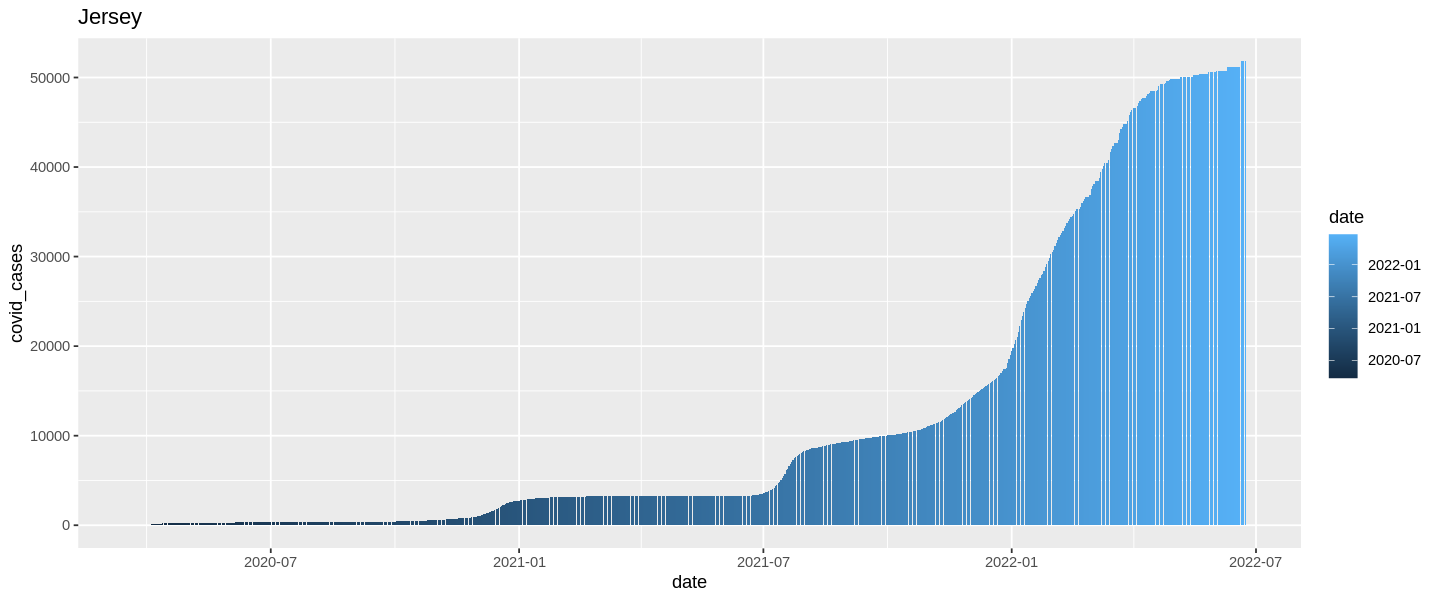

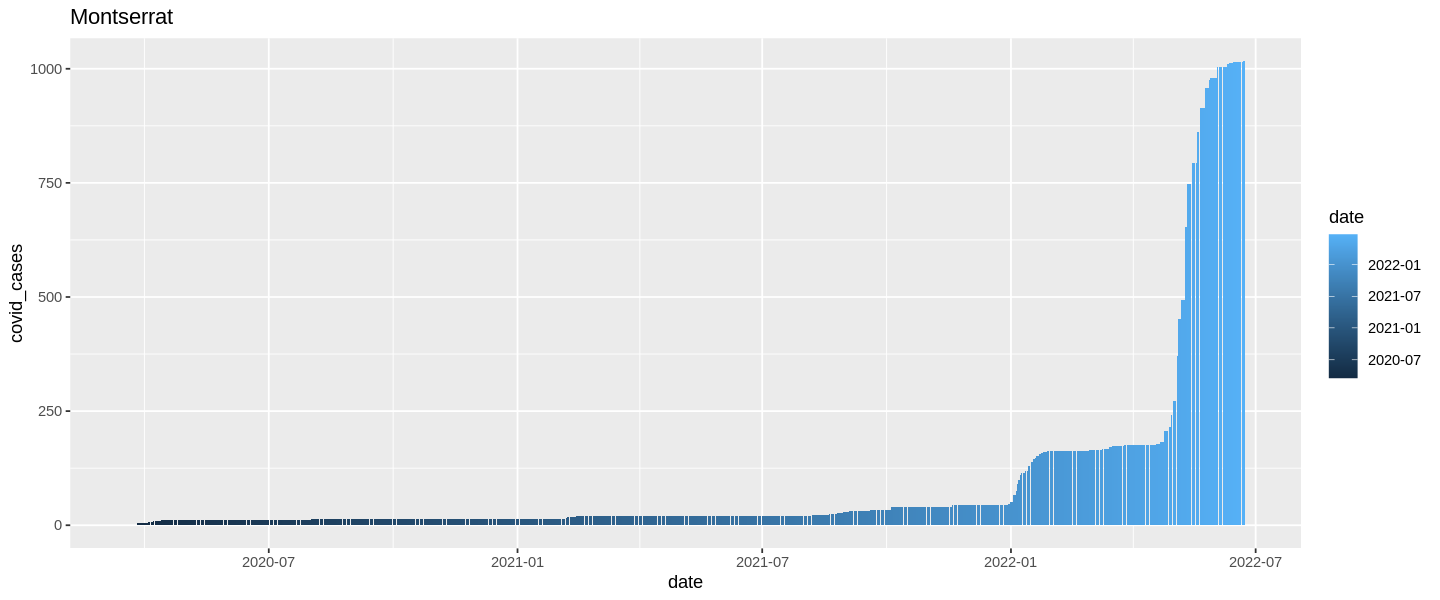

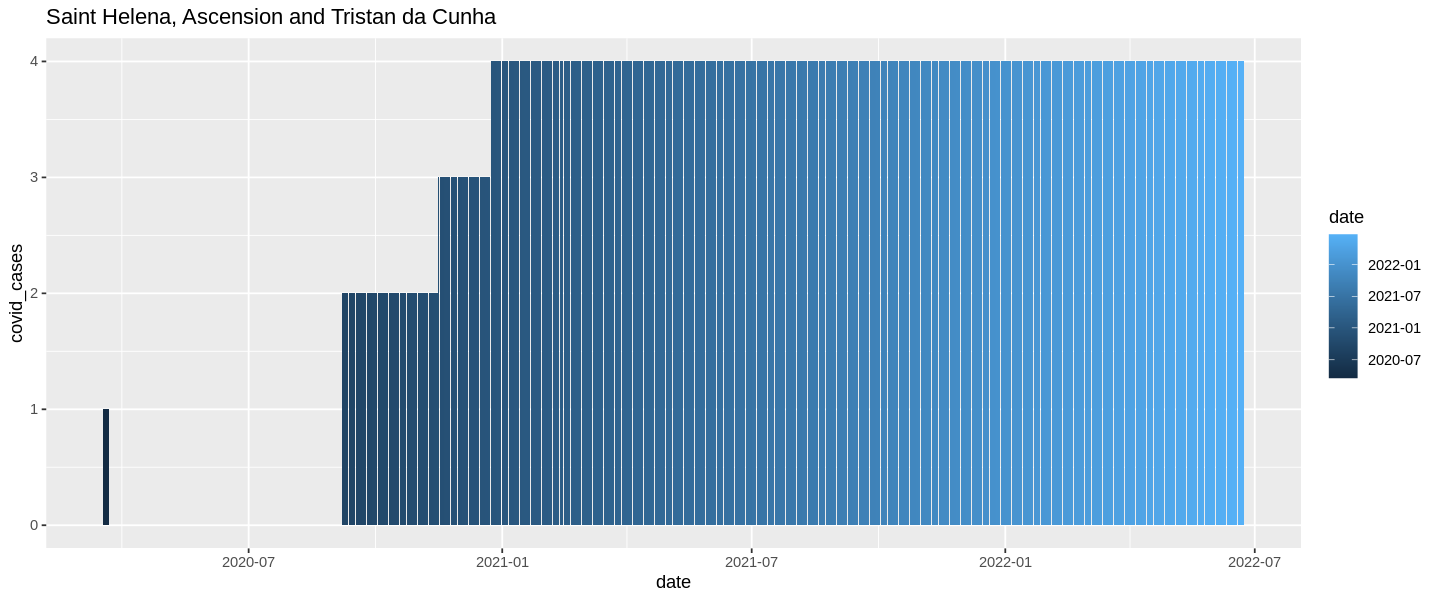

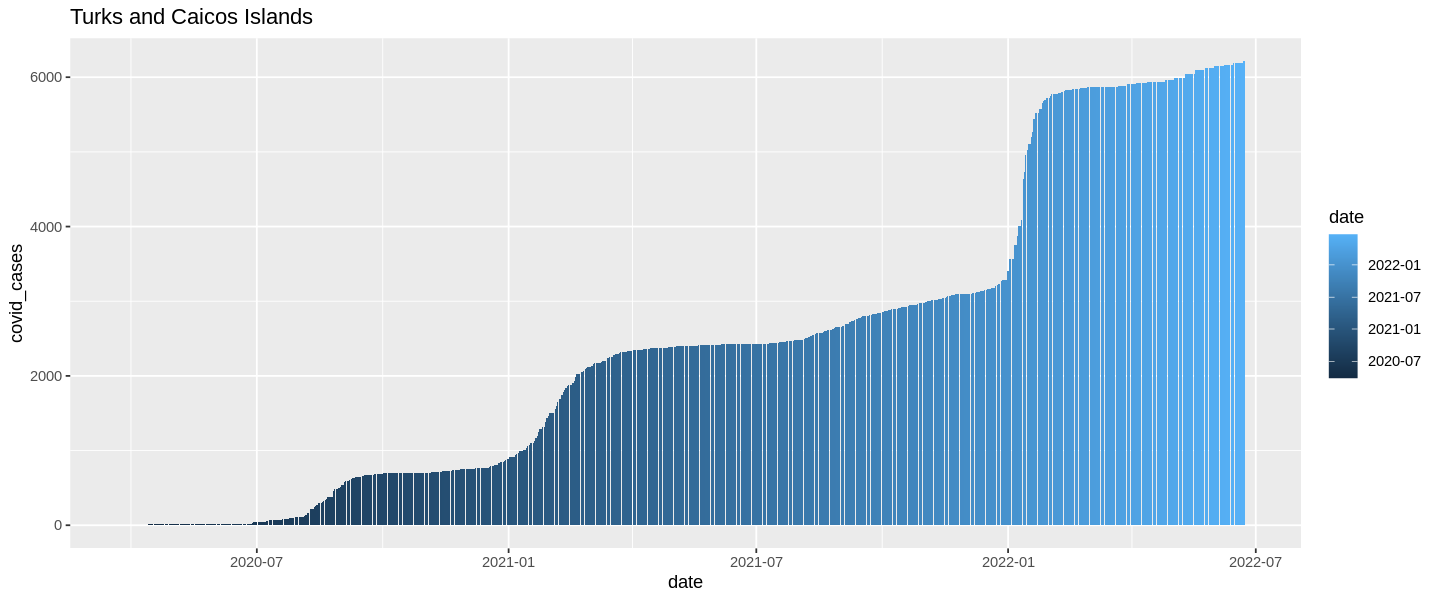

In [ ]:
for (province in uk_prov$province)
{
    cases_plot(province)
}

### **China Covid Plot**

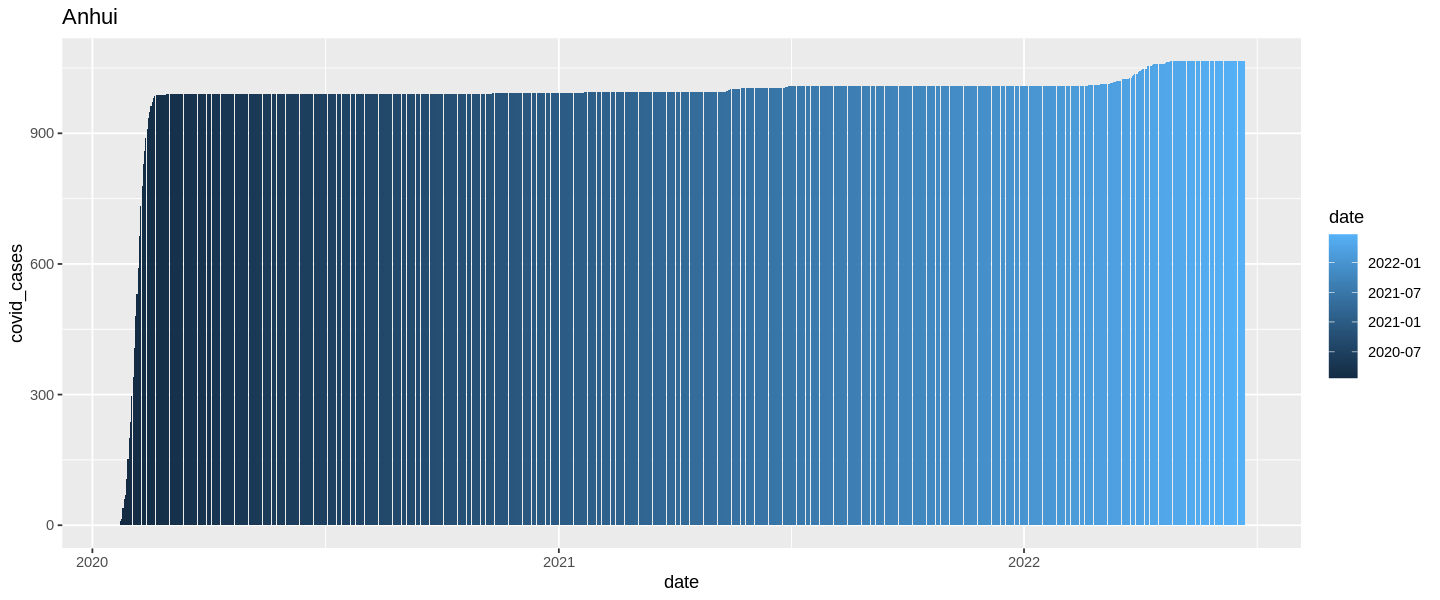

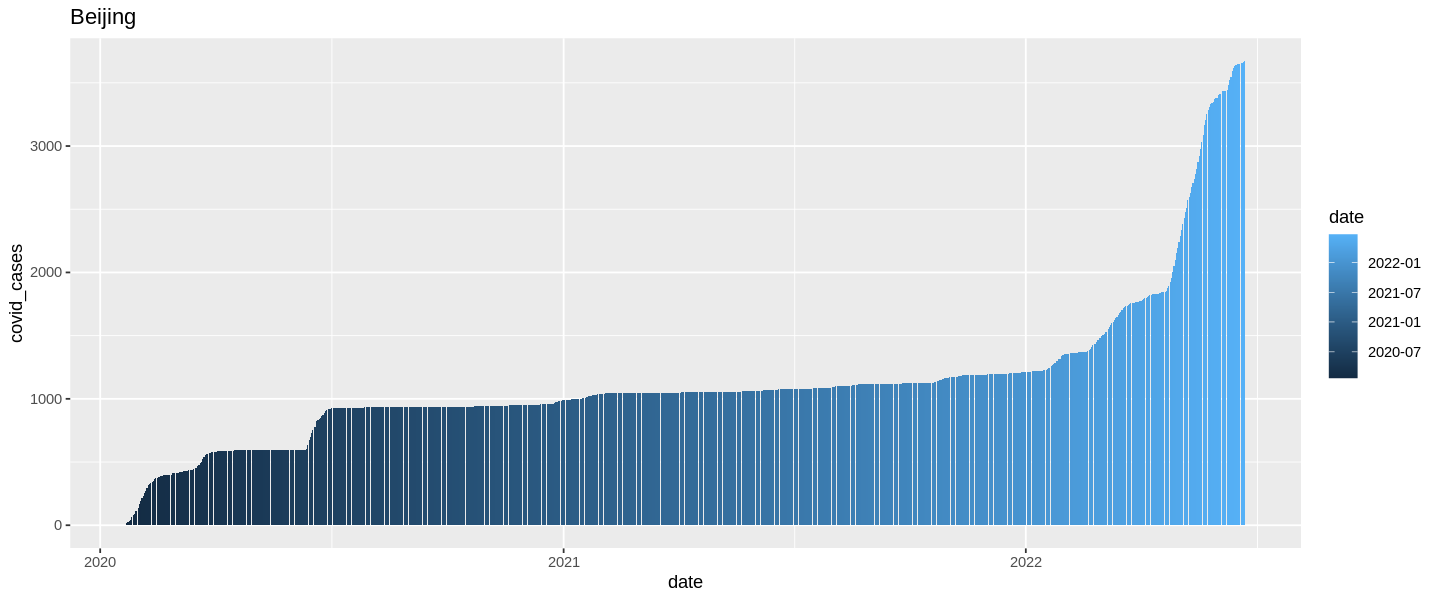

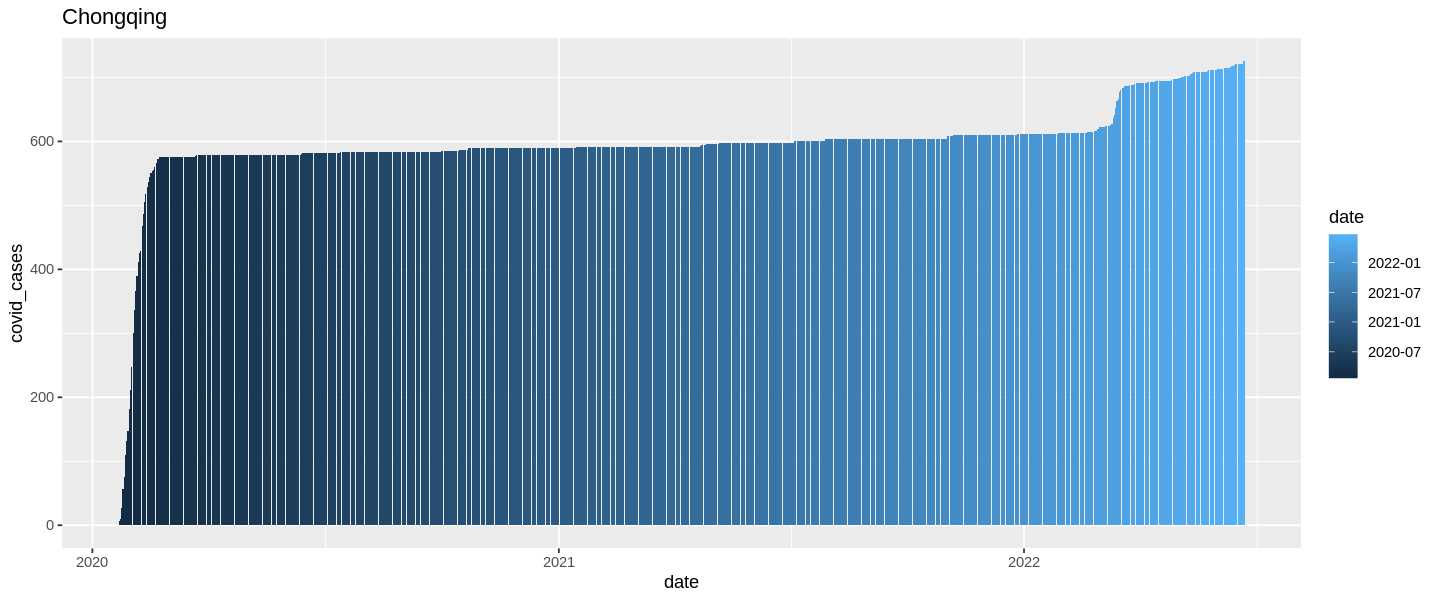

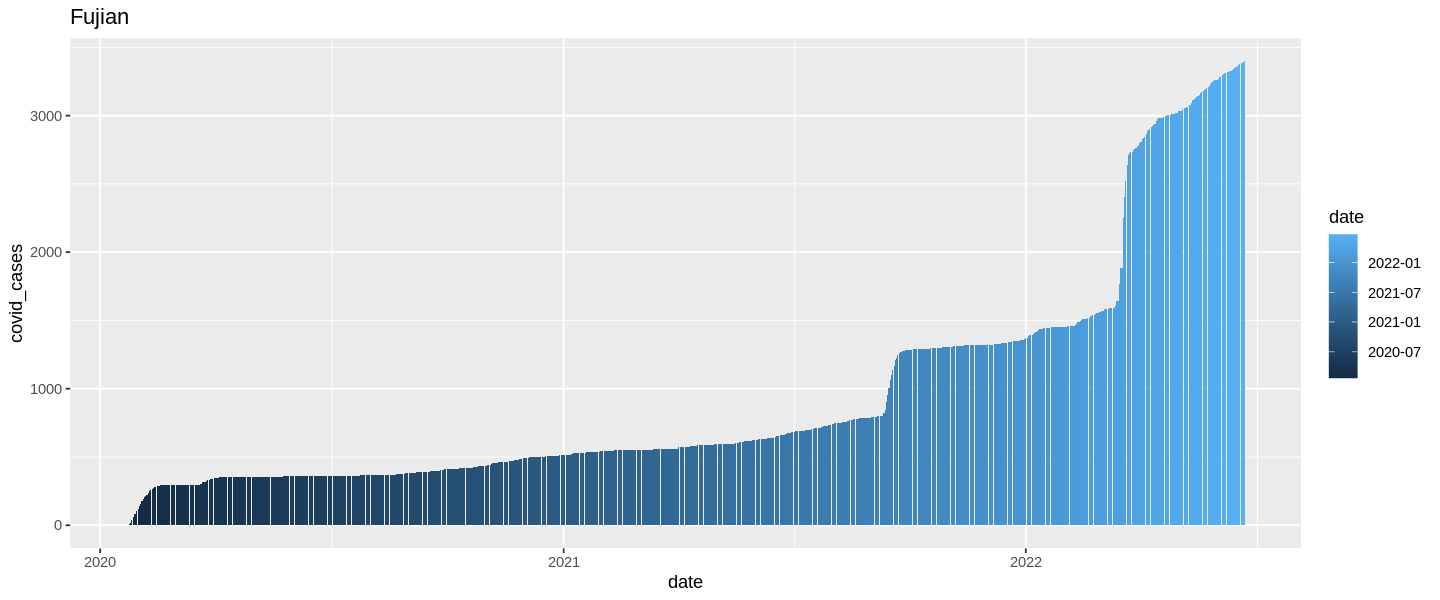

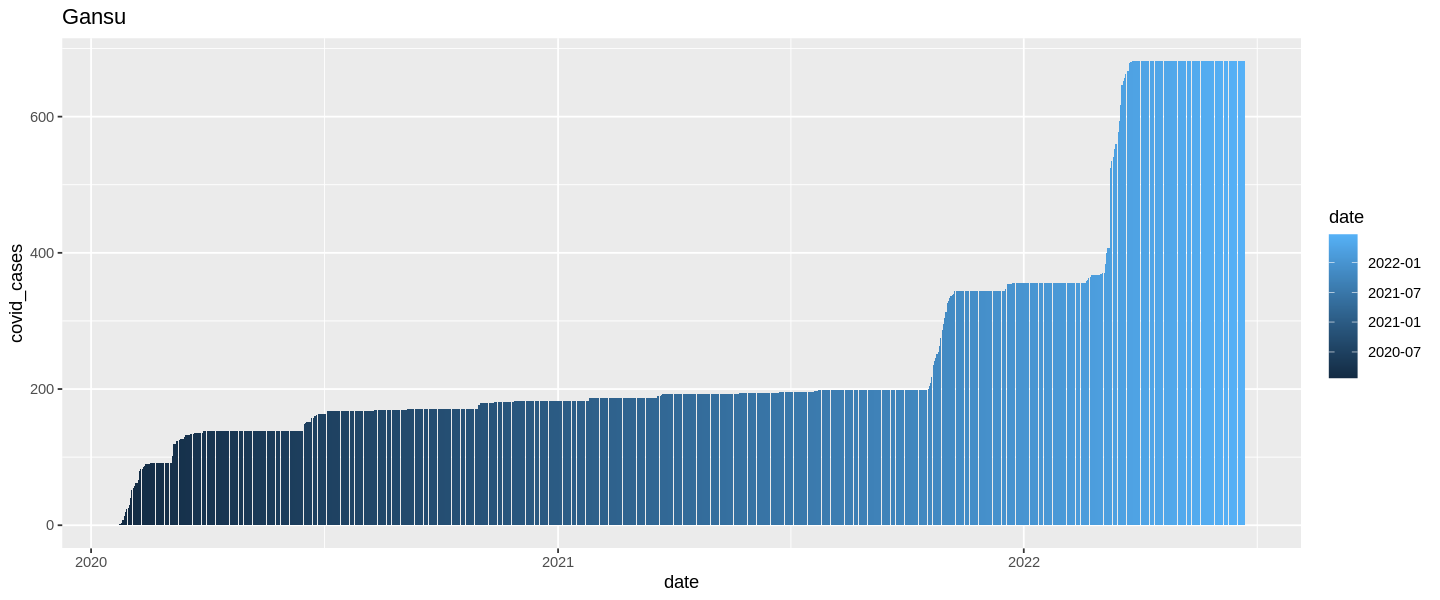

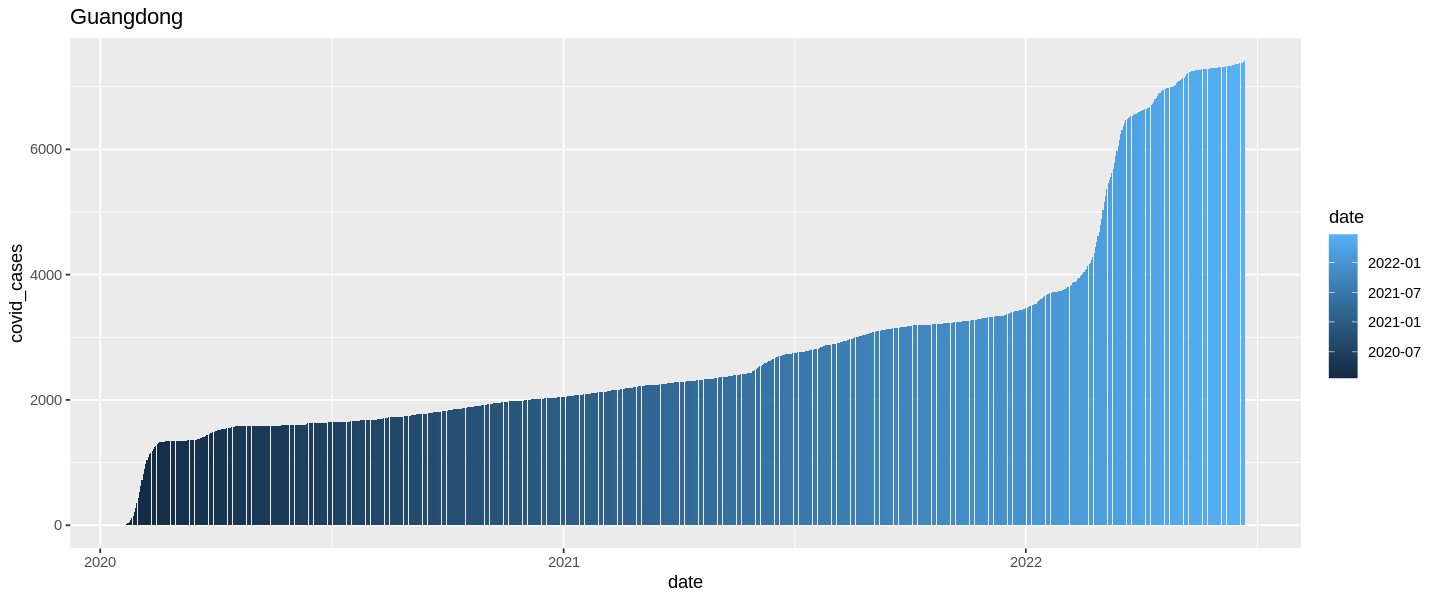

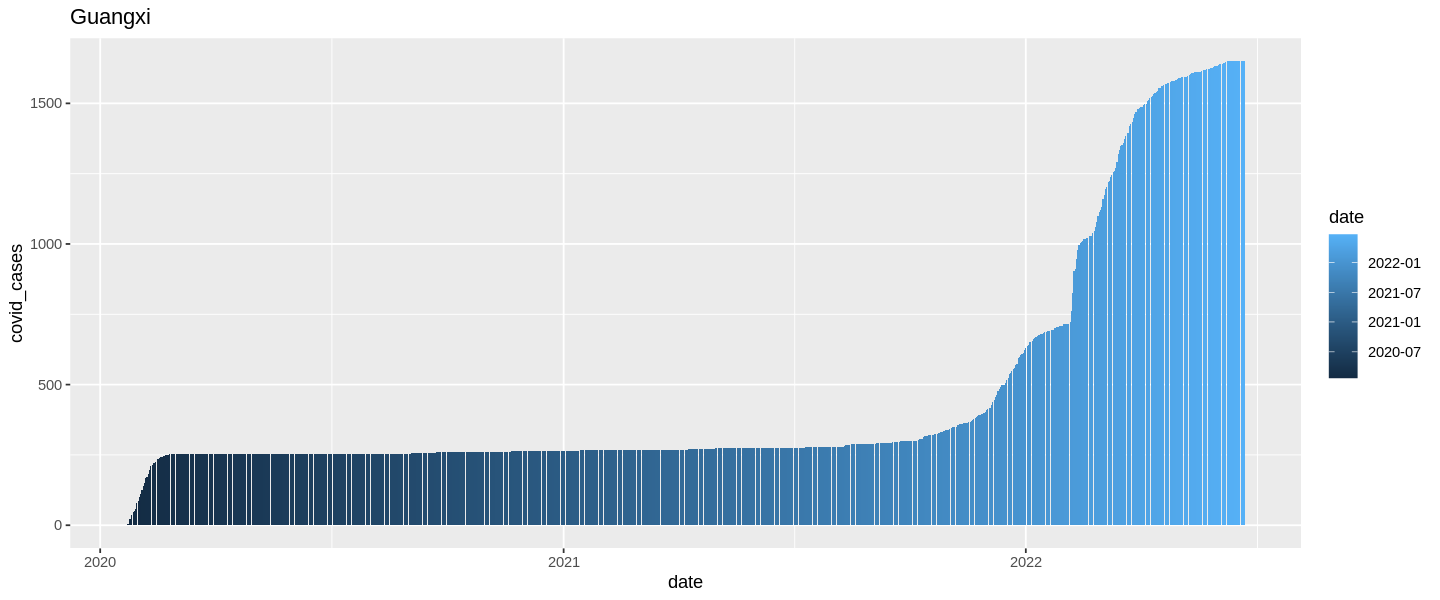

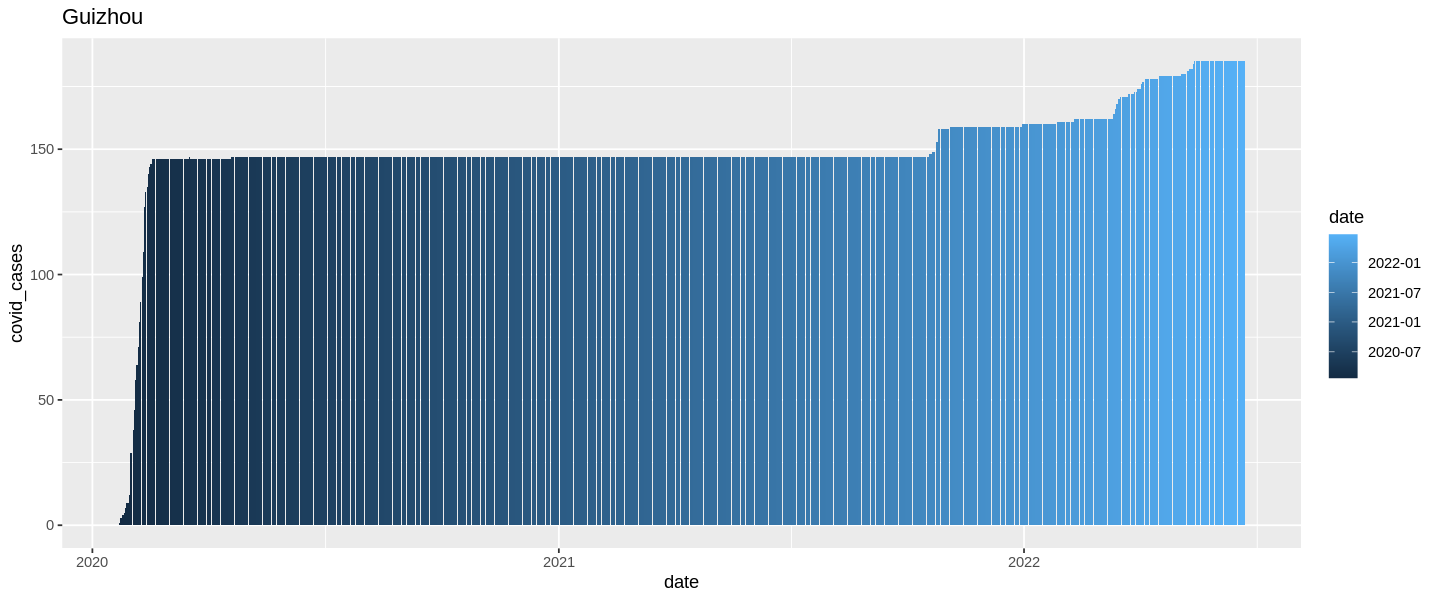

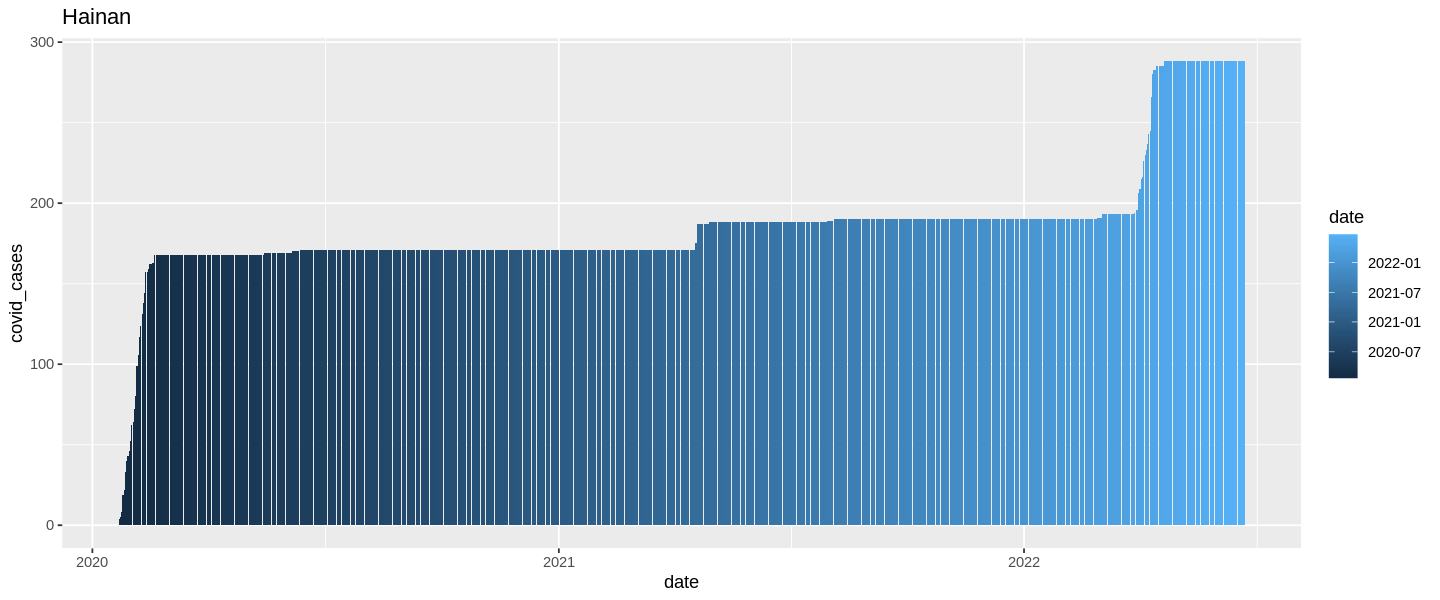

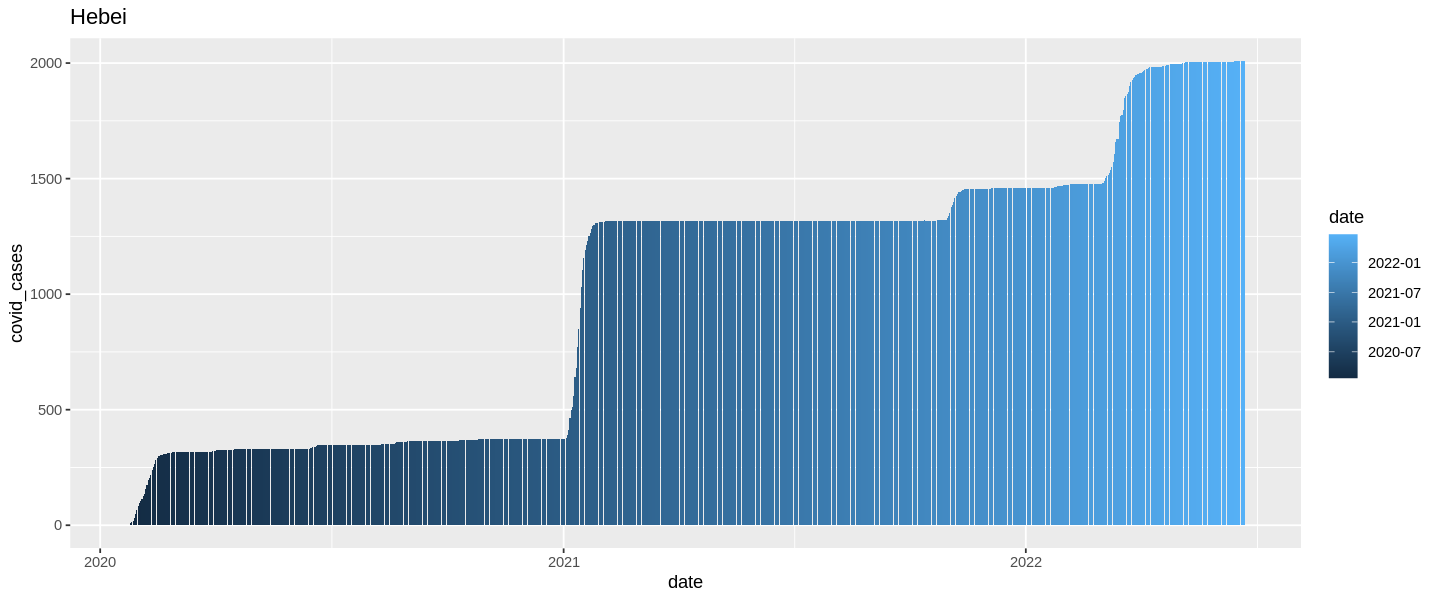

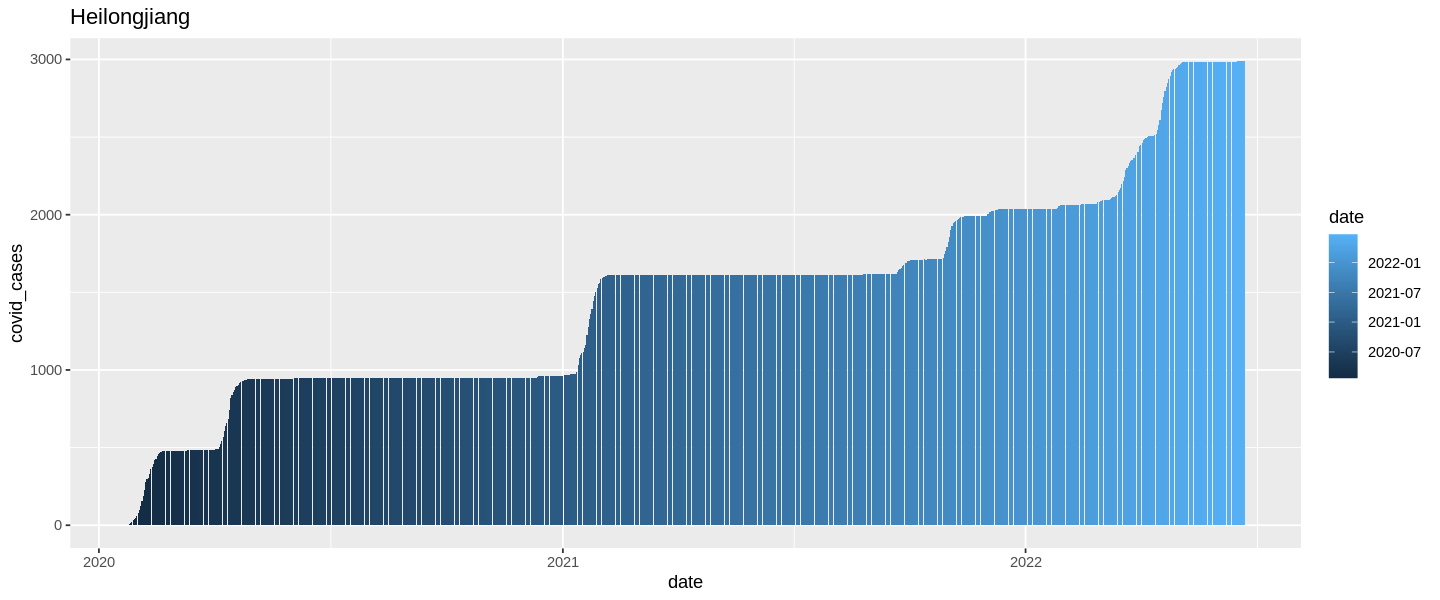

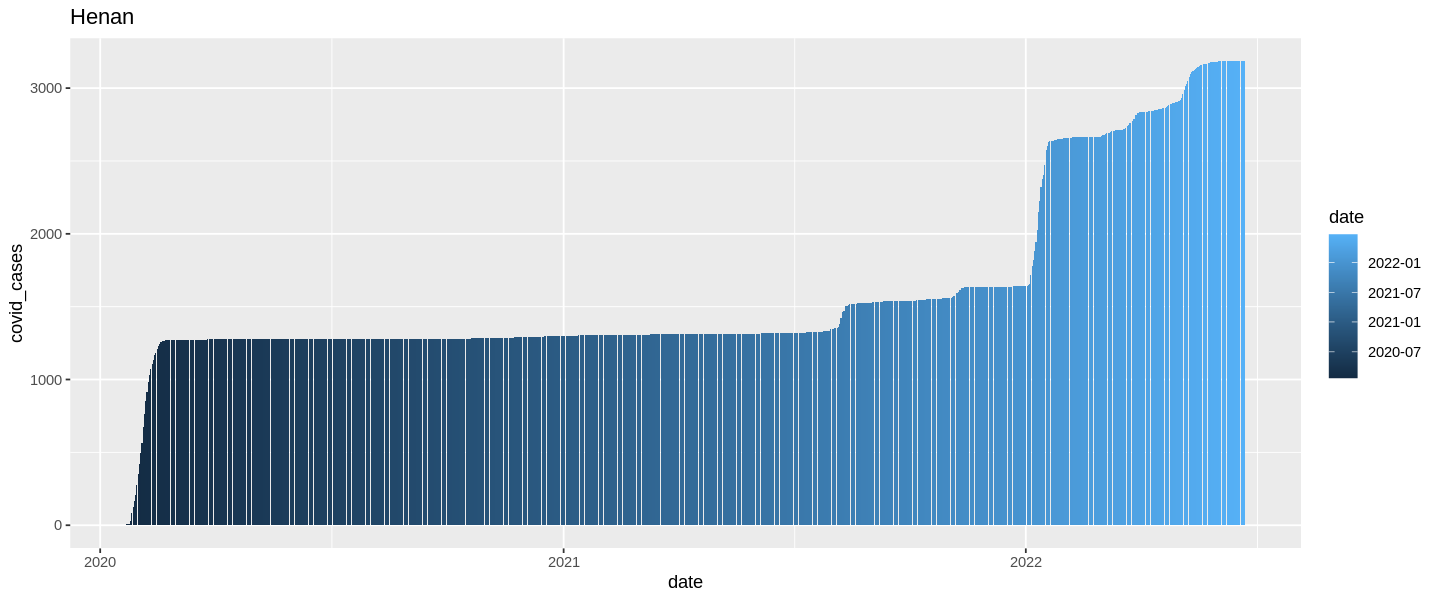

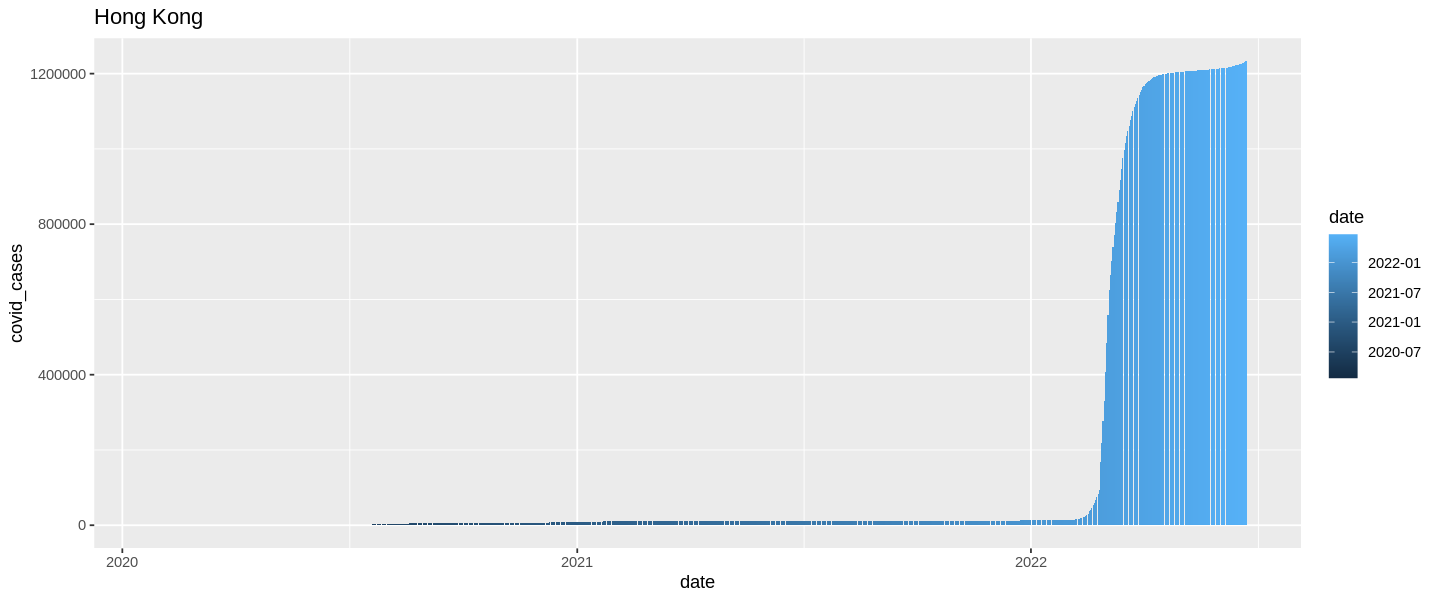

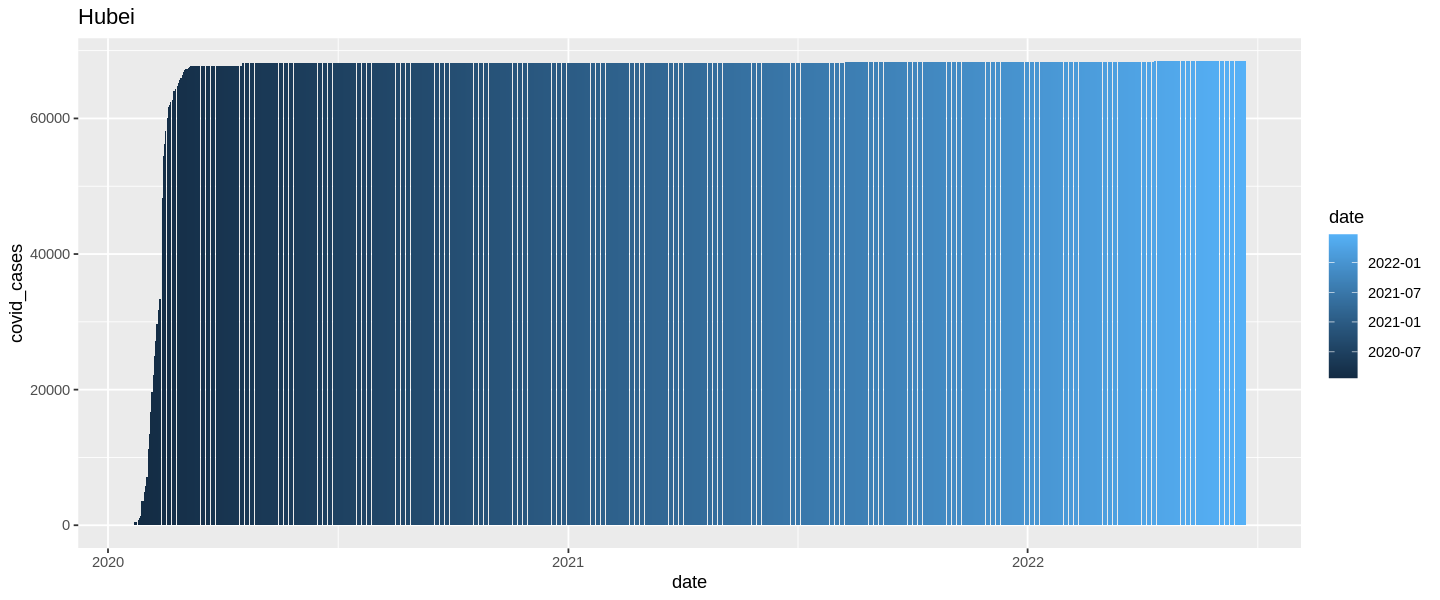

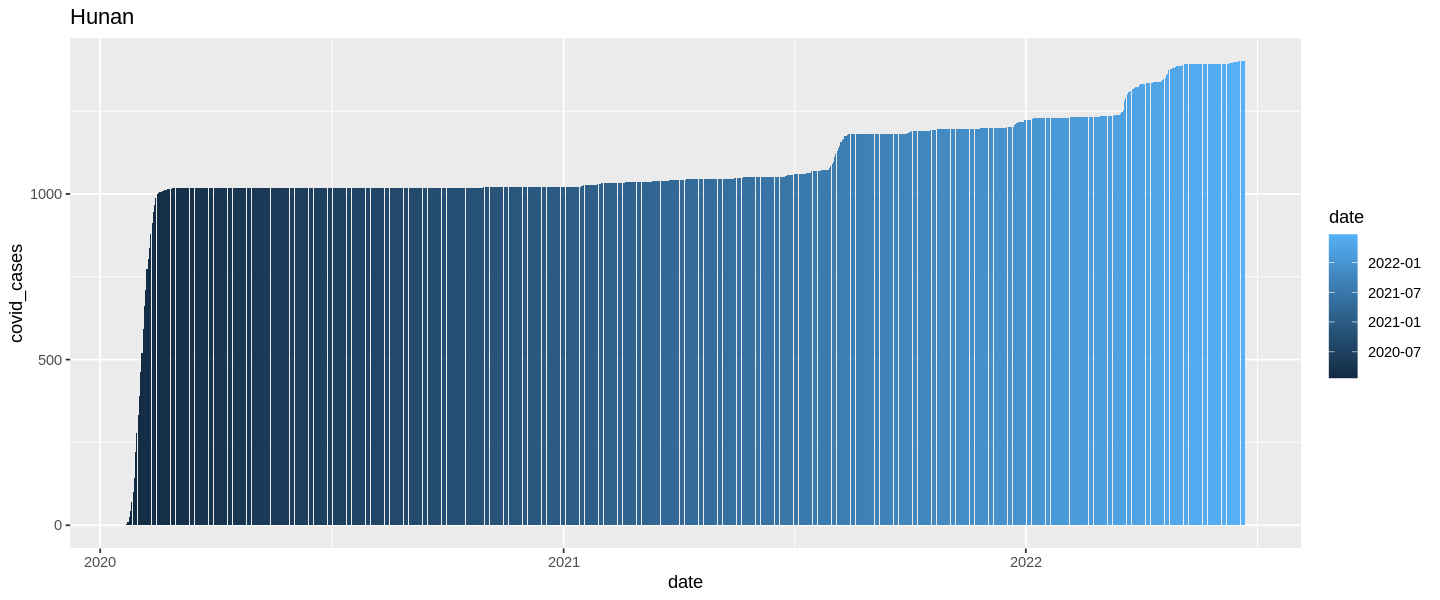

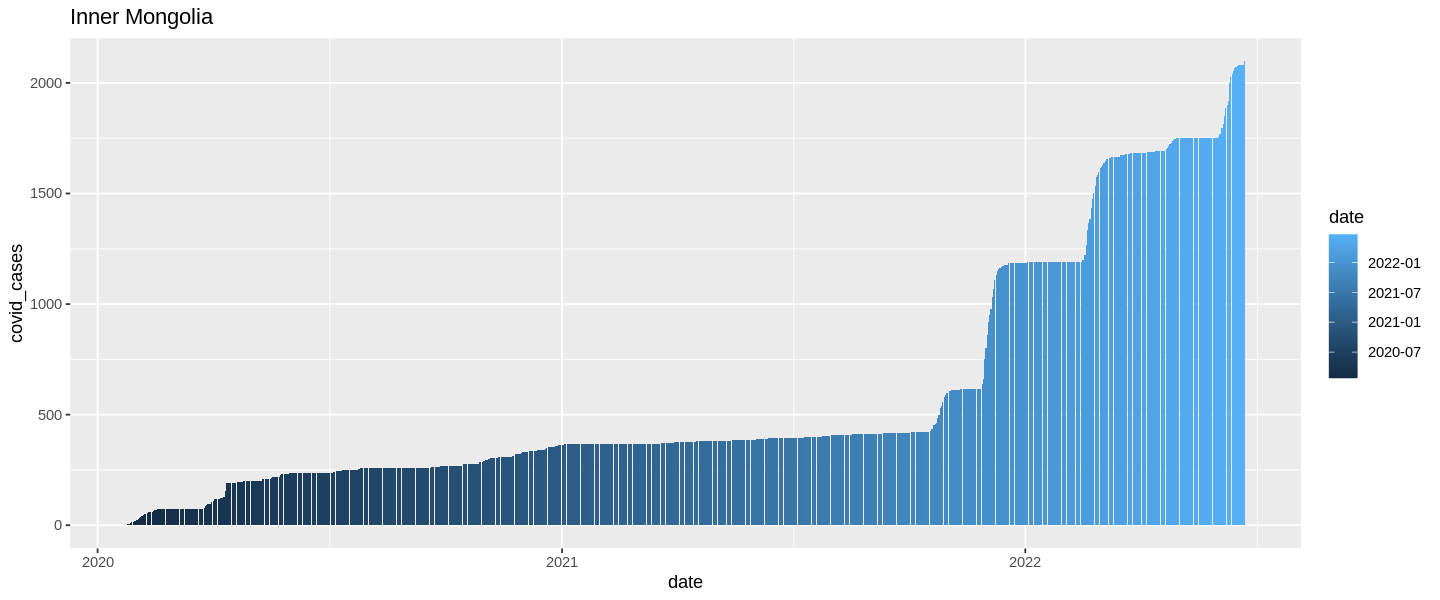

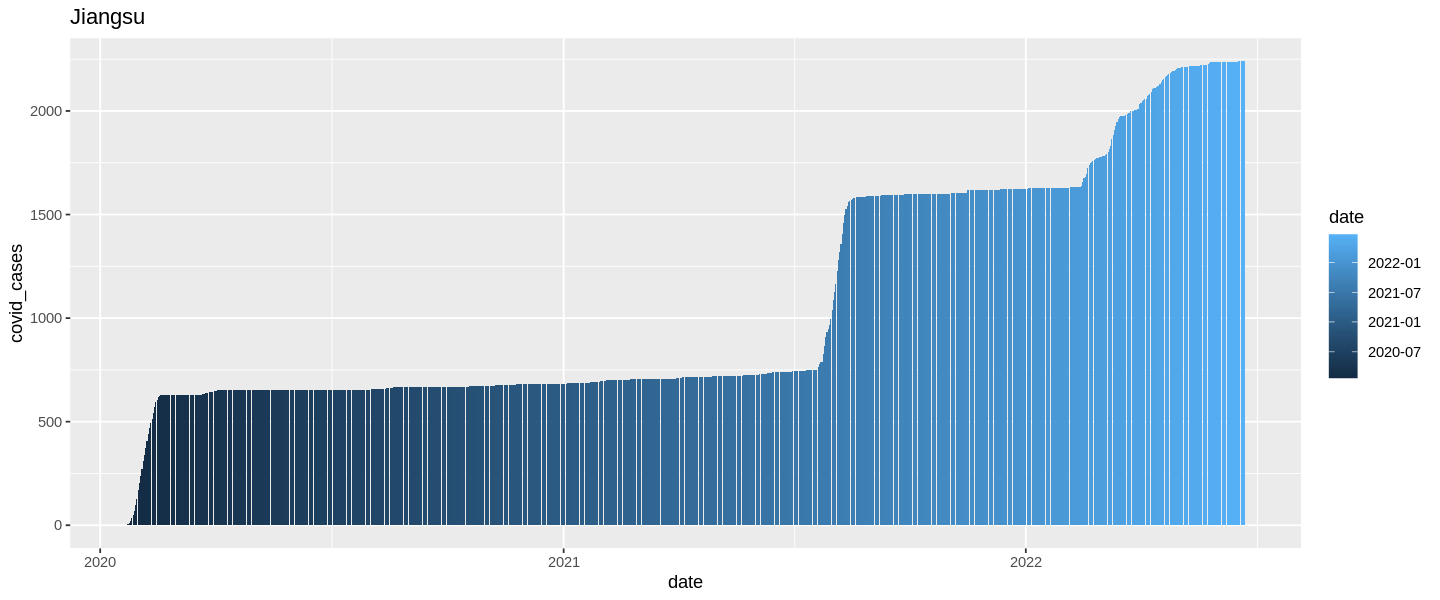

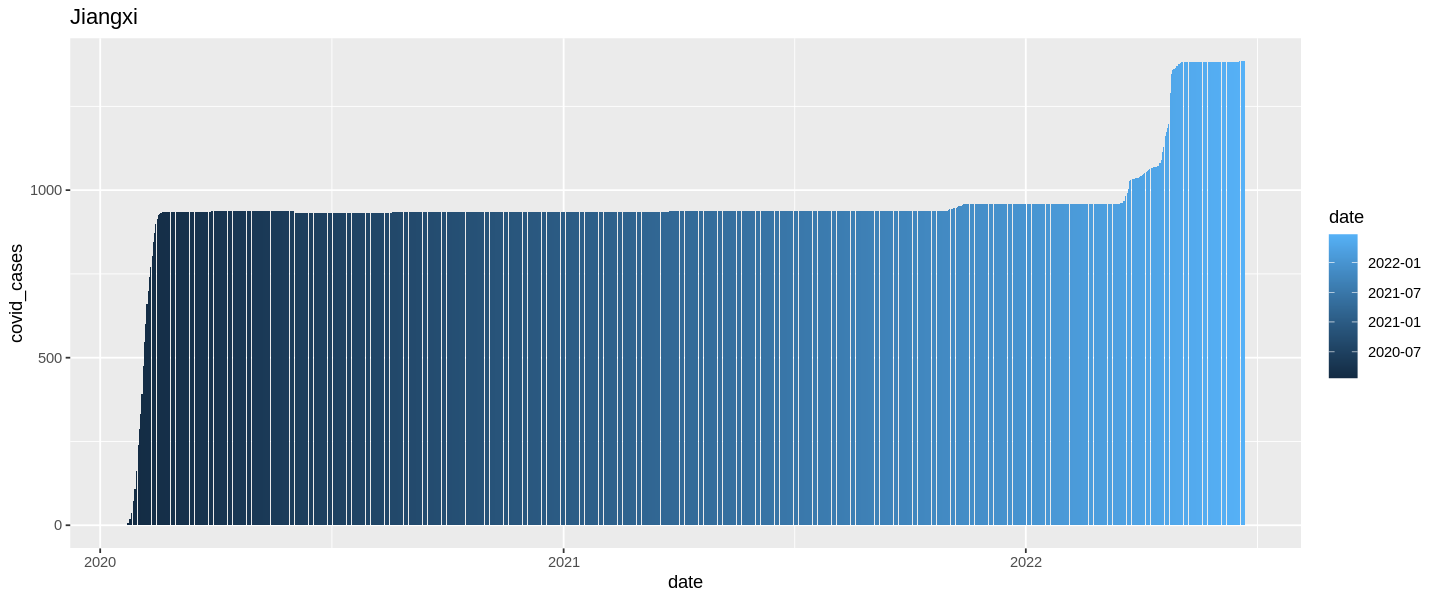

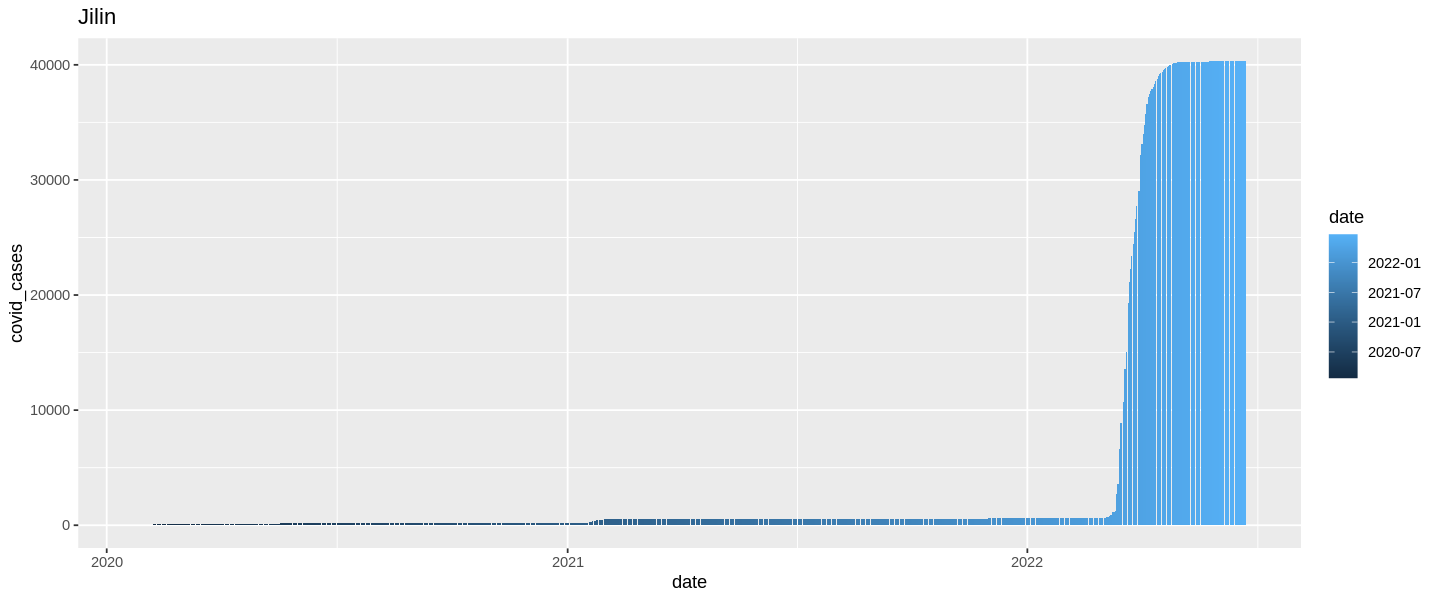

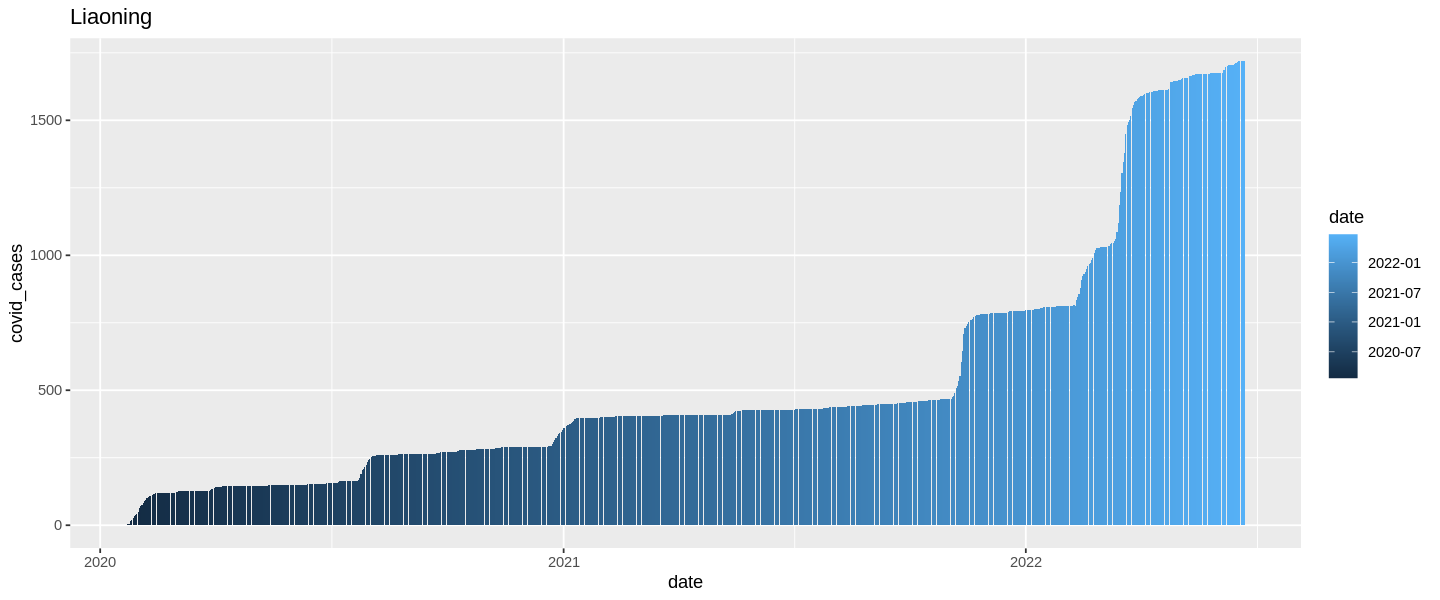

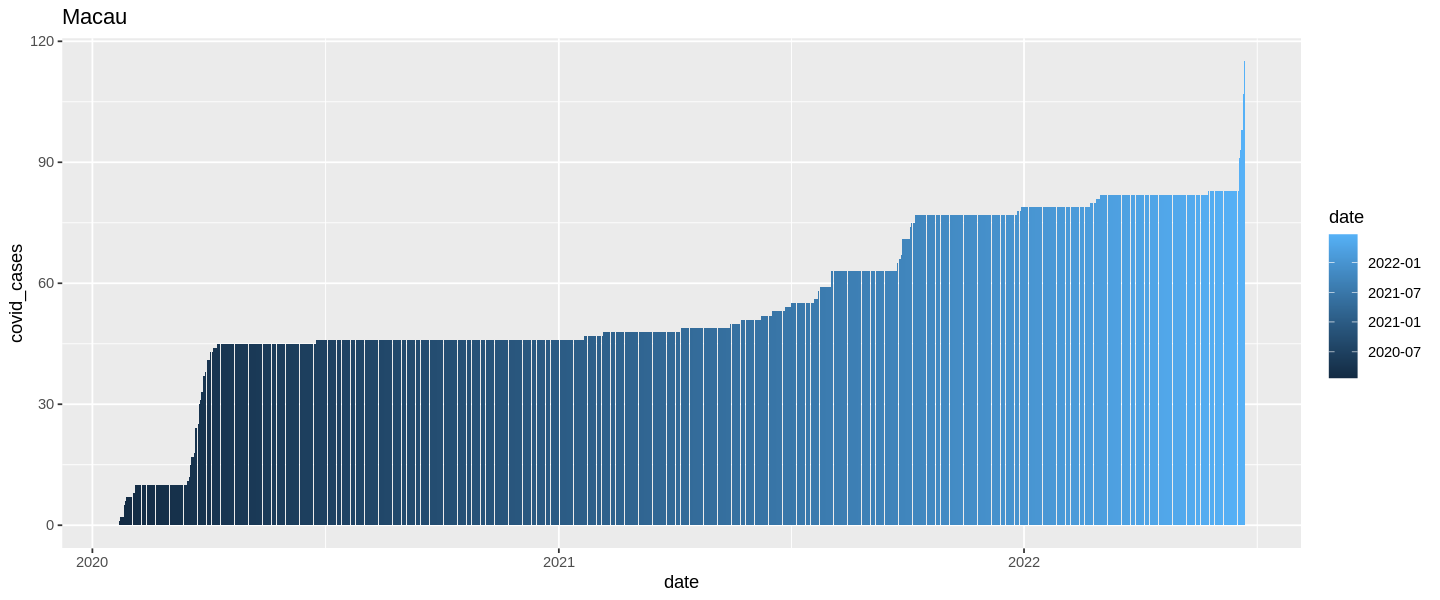

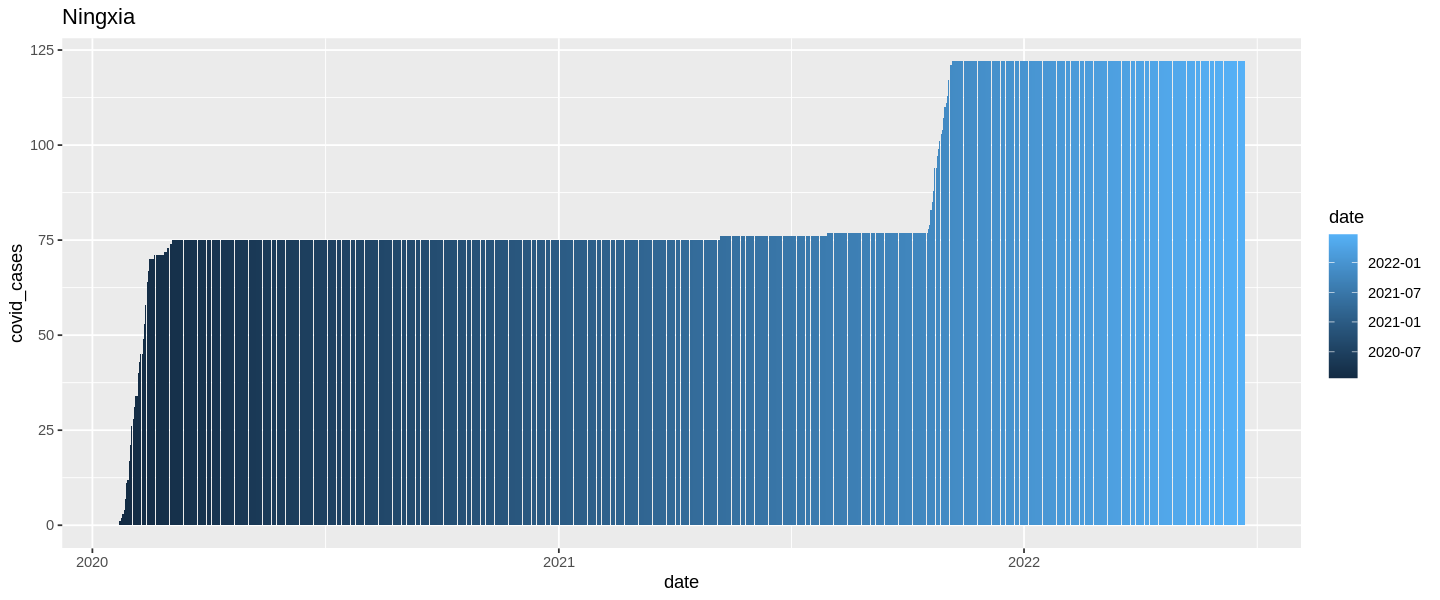

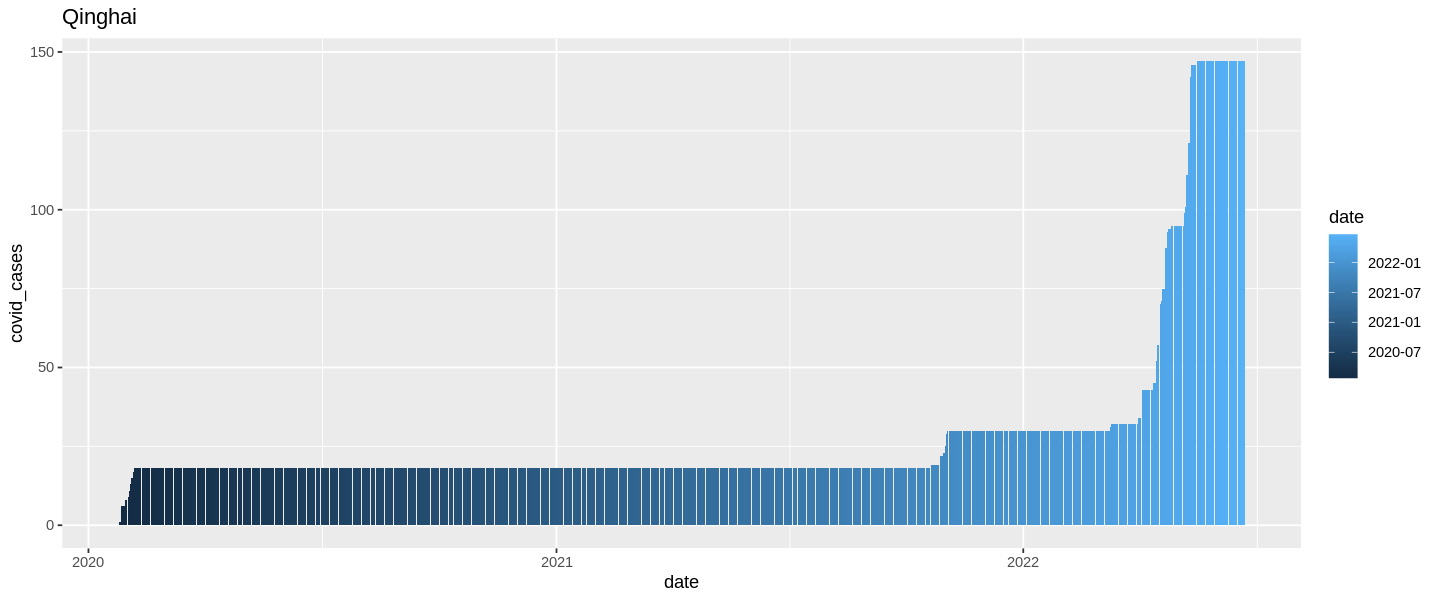

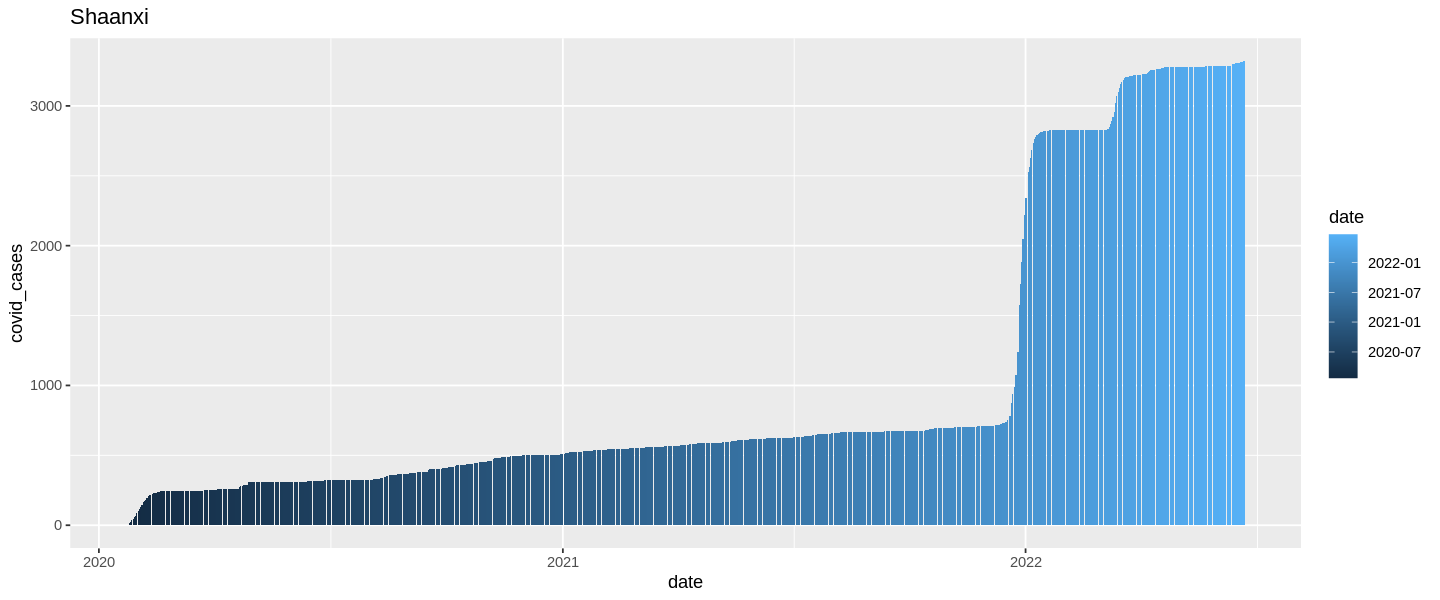

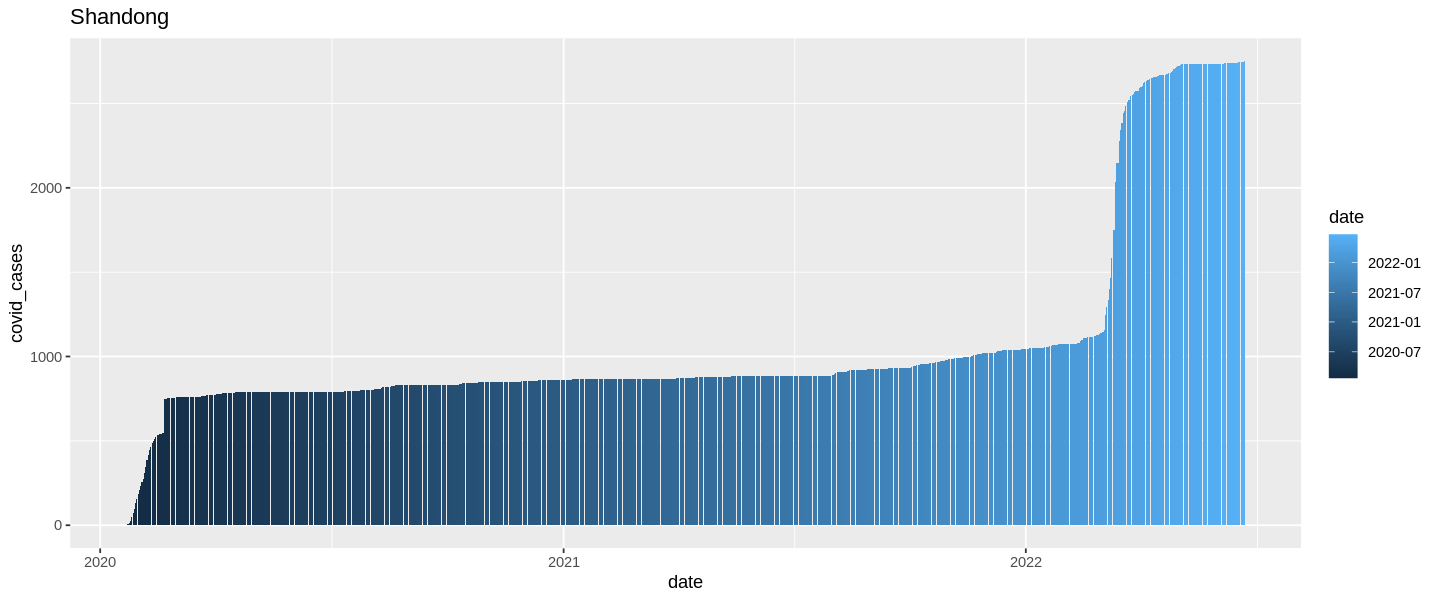

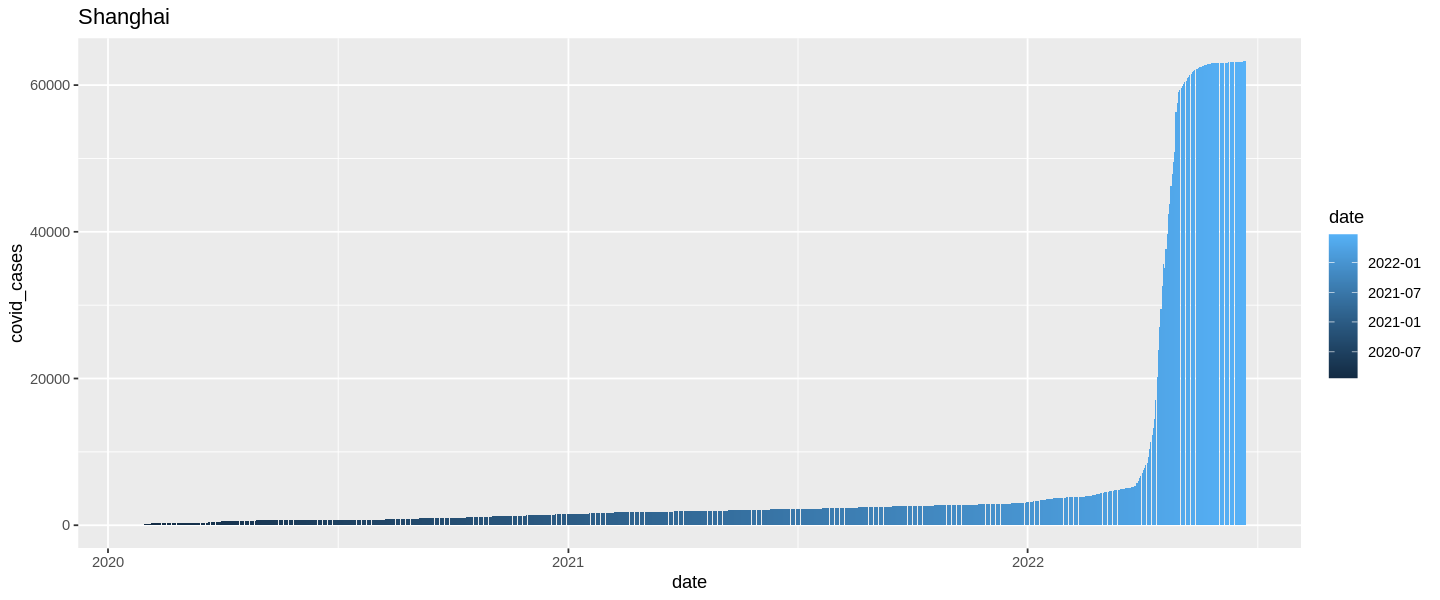

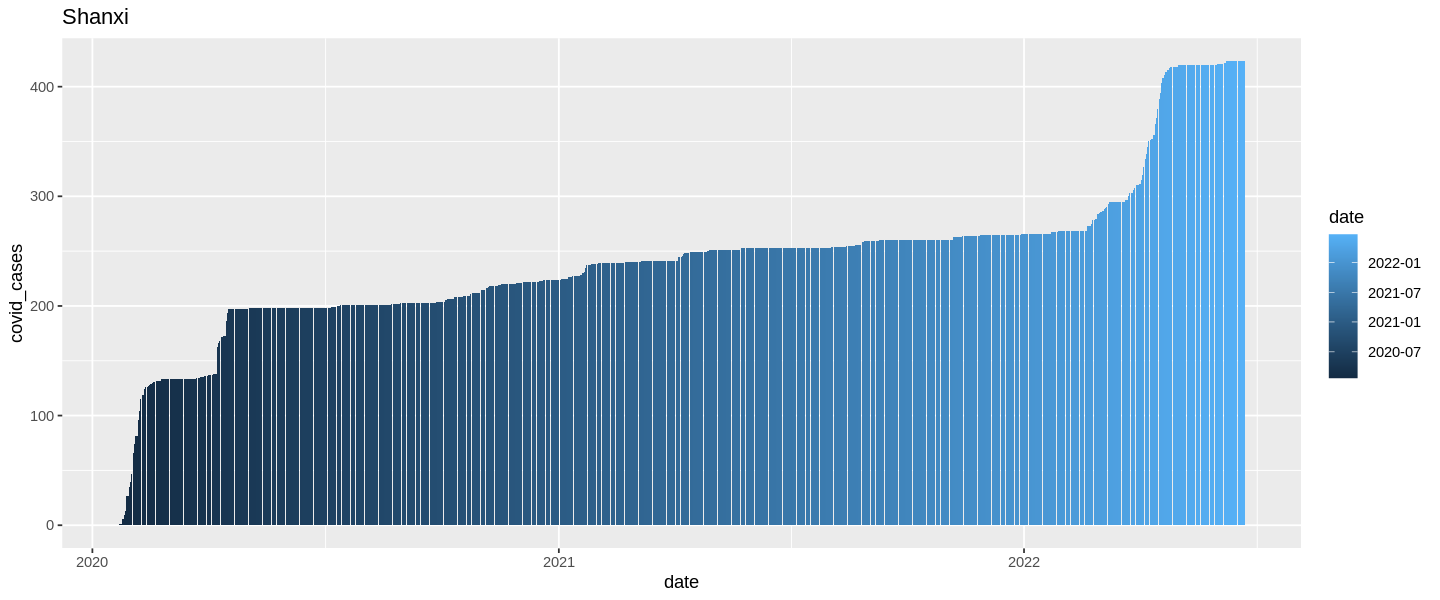

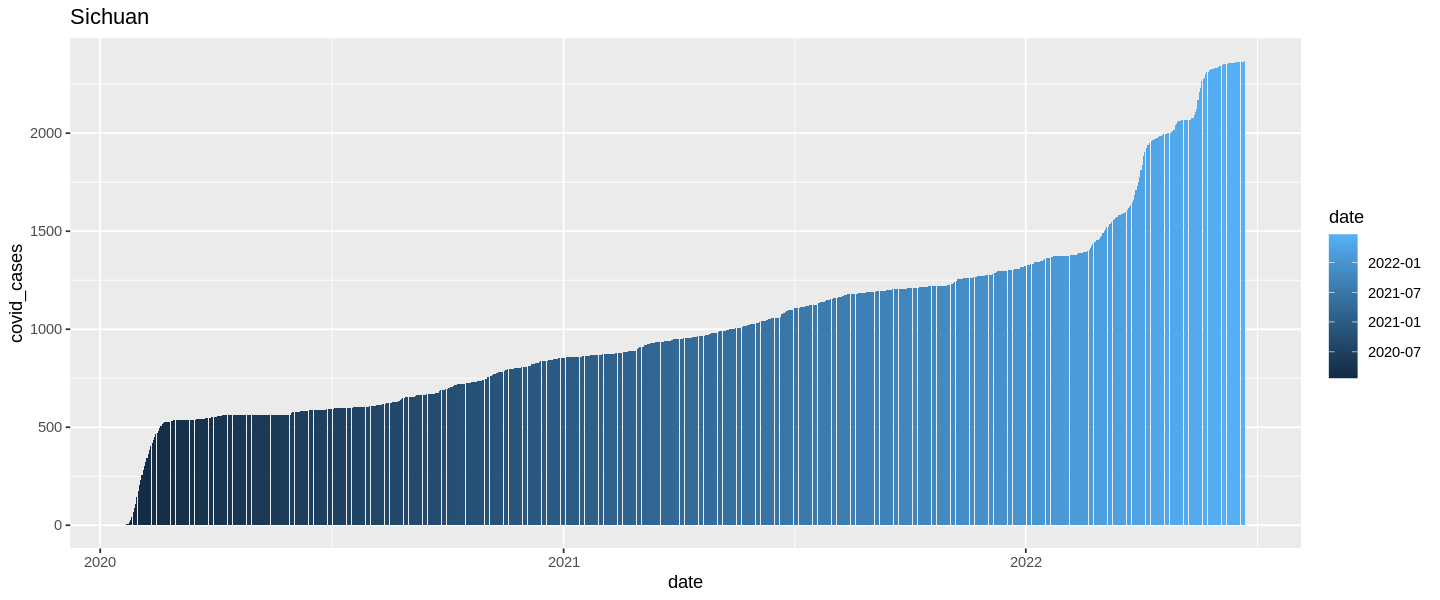

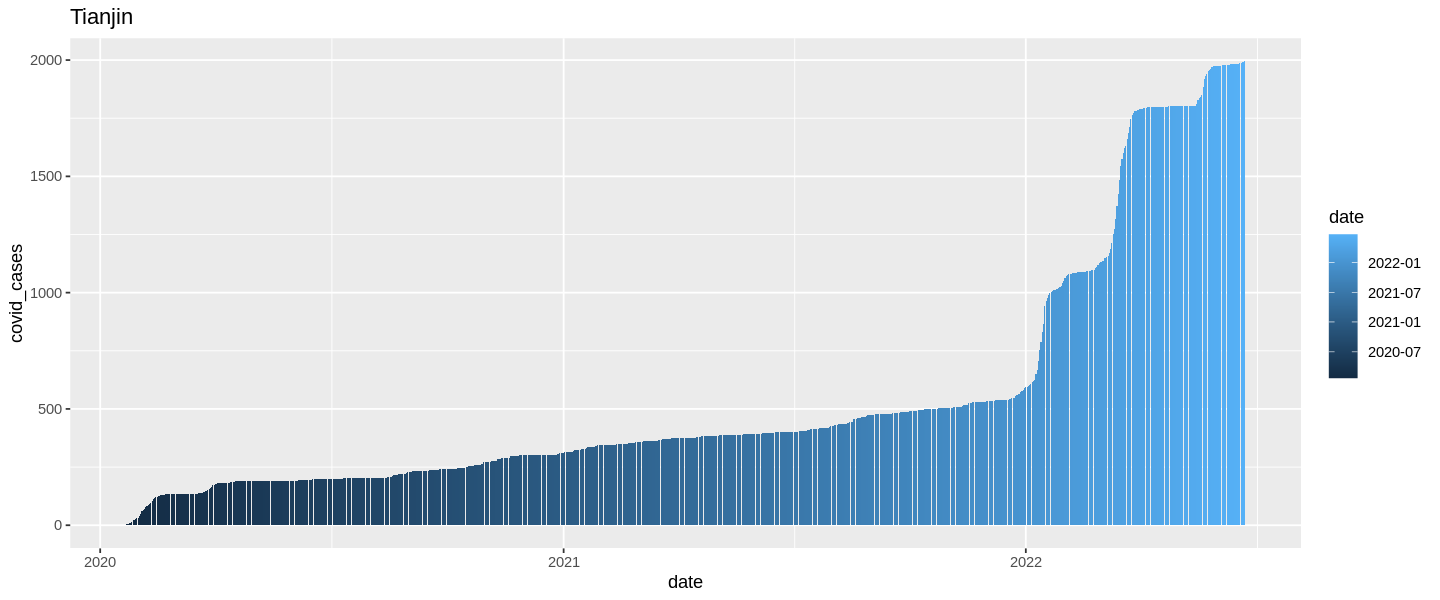

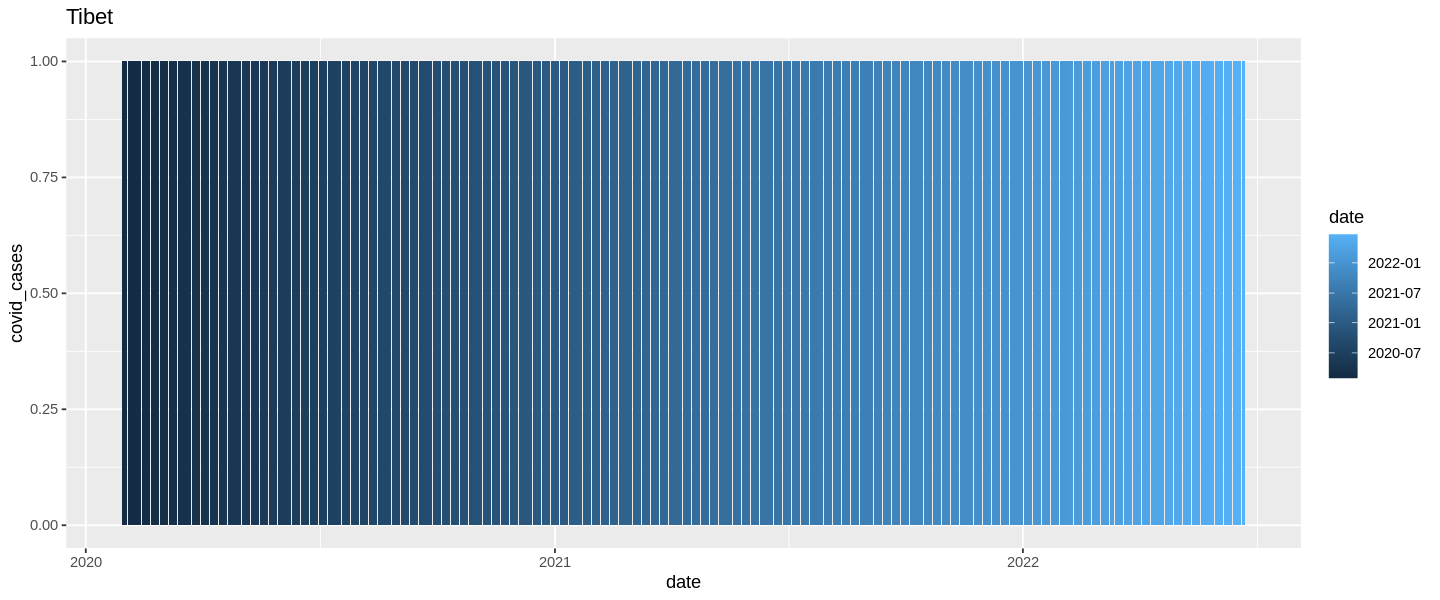

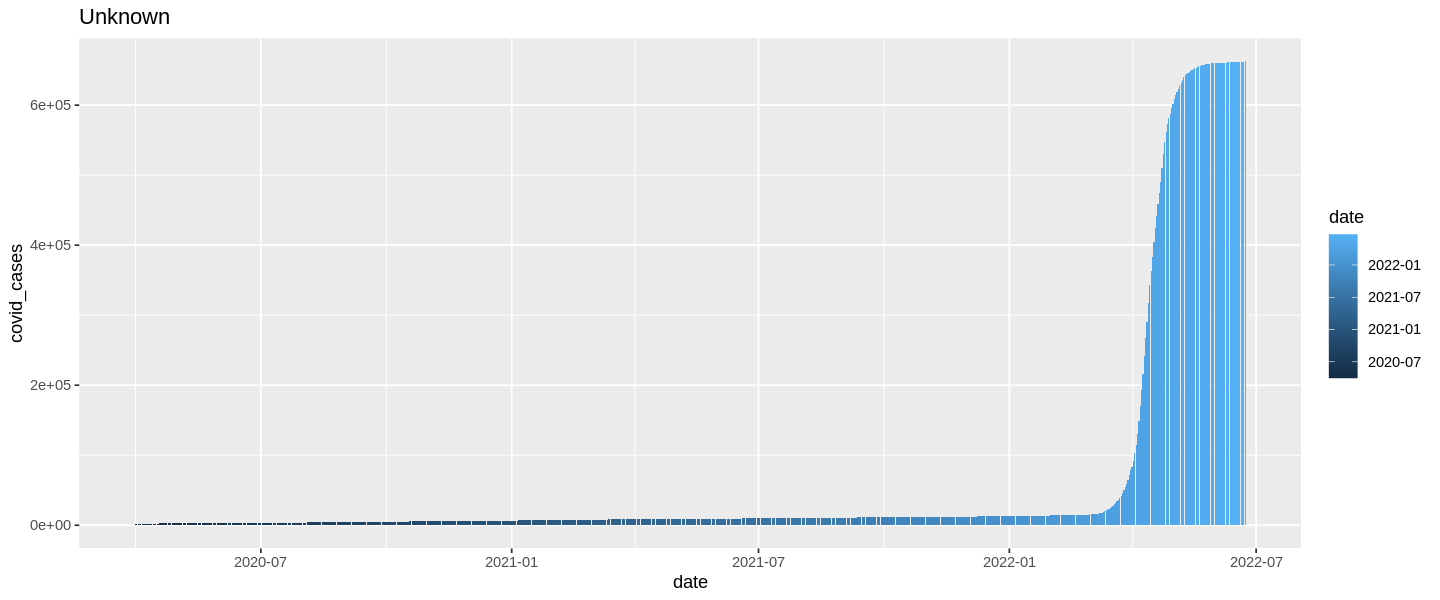

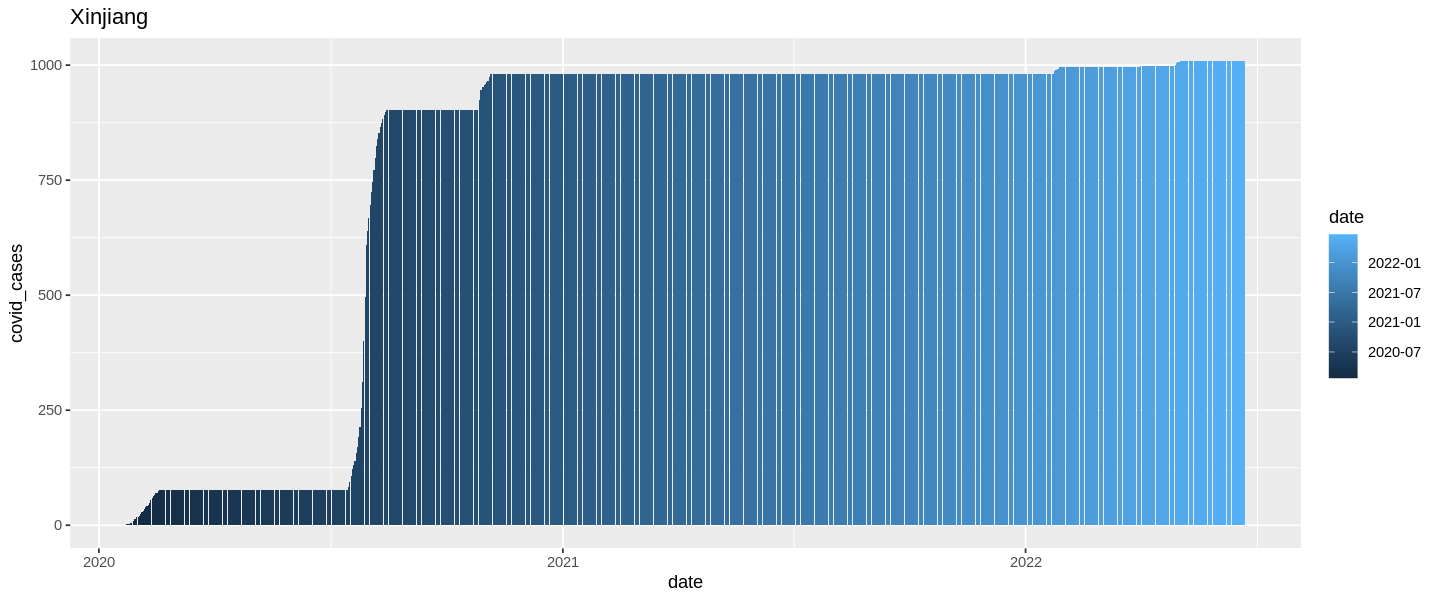

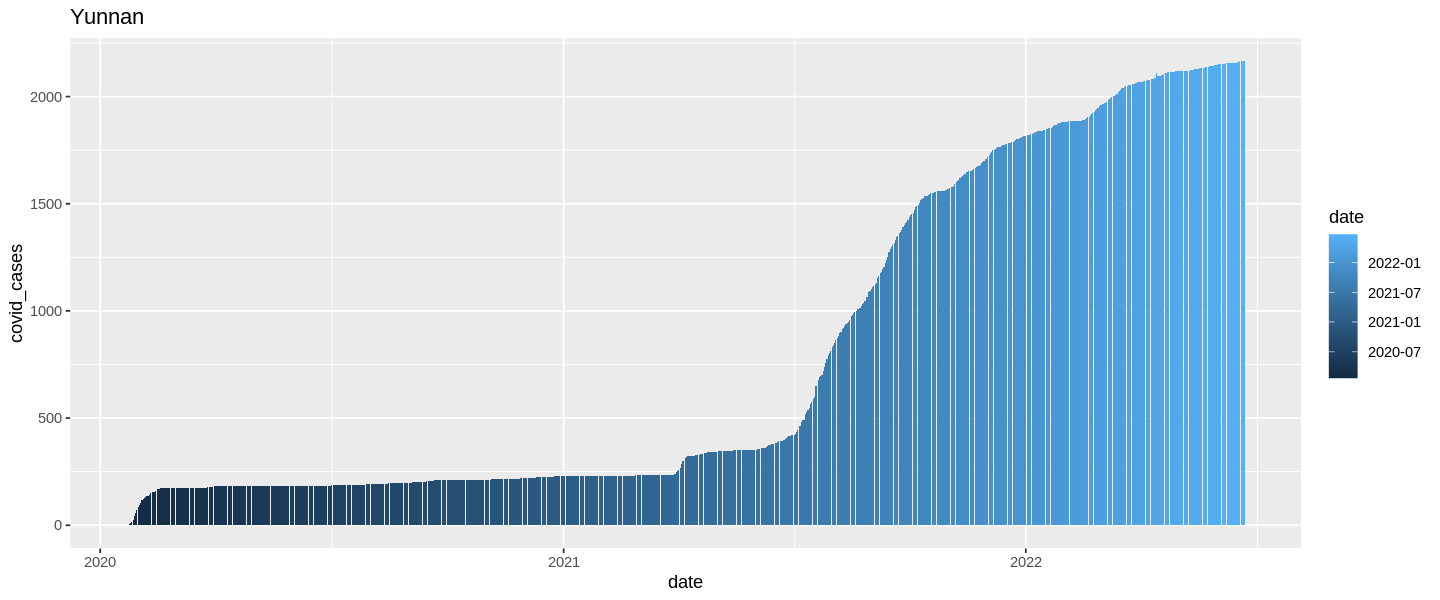

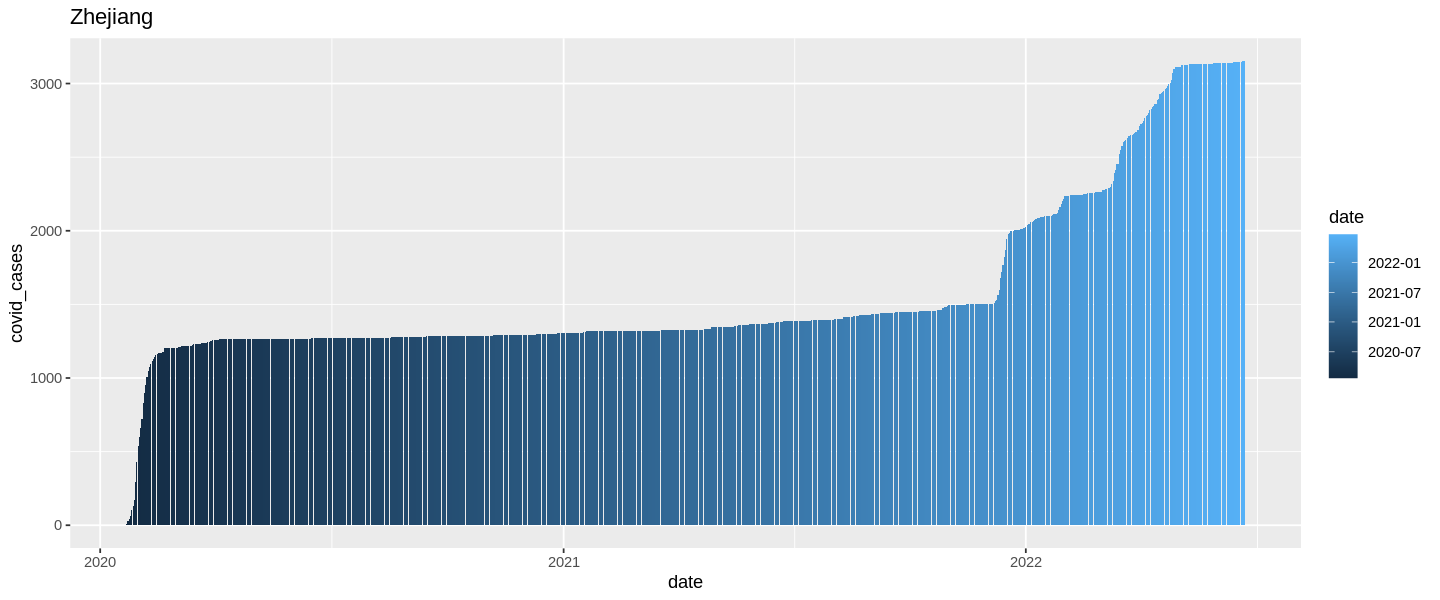

In [ ]:
for (province in china_prov$province)
{
    cases_plot(province)
}

### **Netherlands Covid Plot**

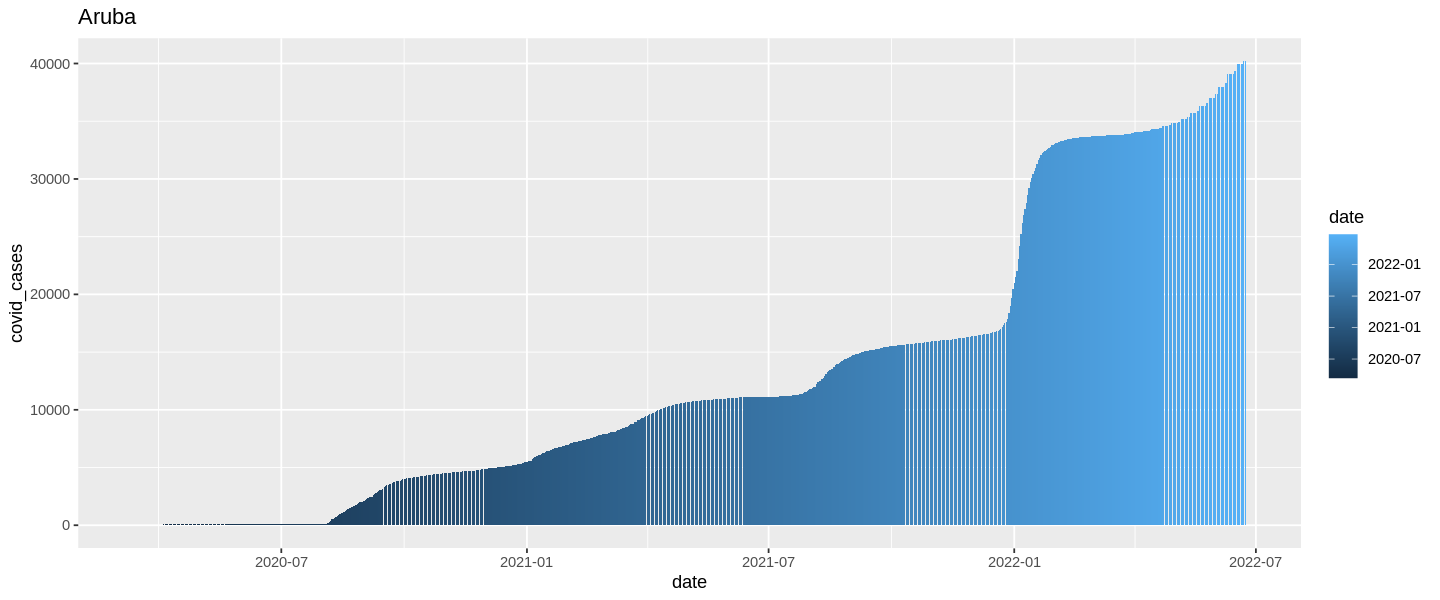

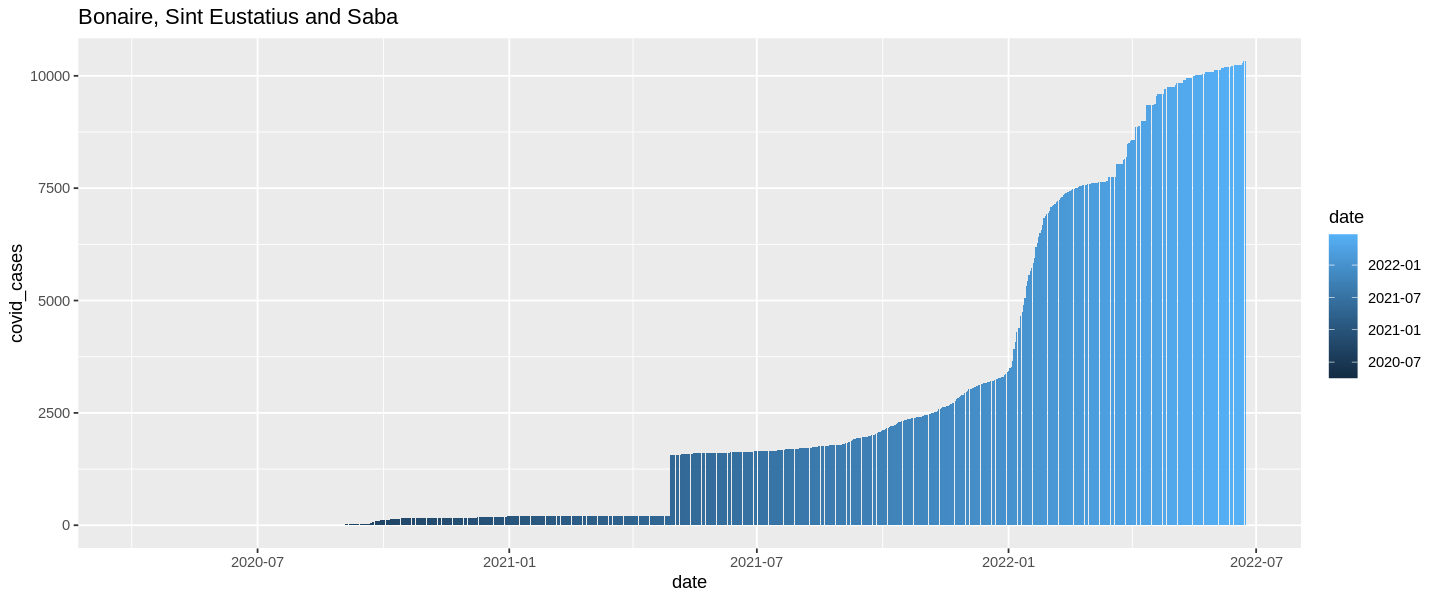

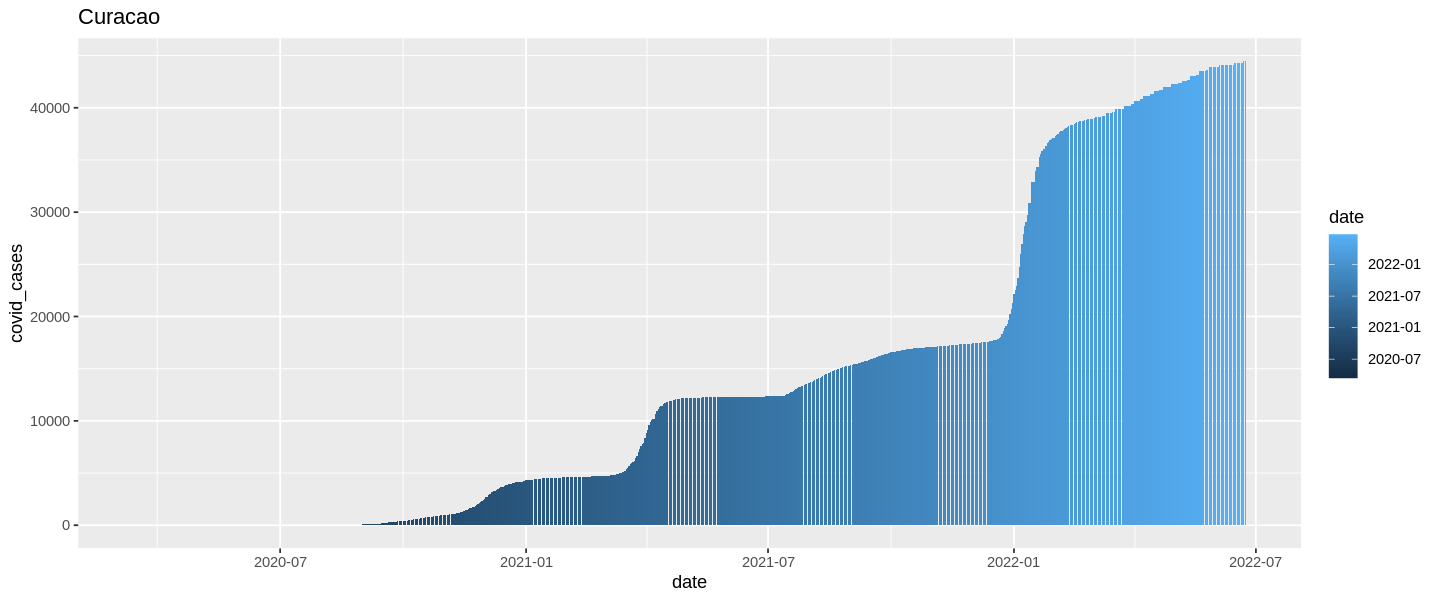

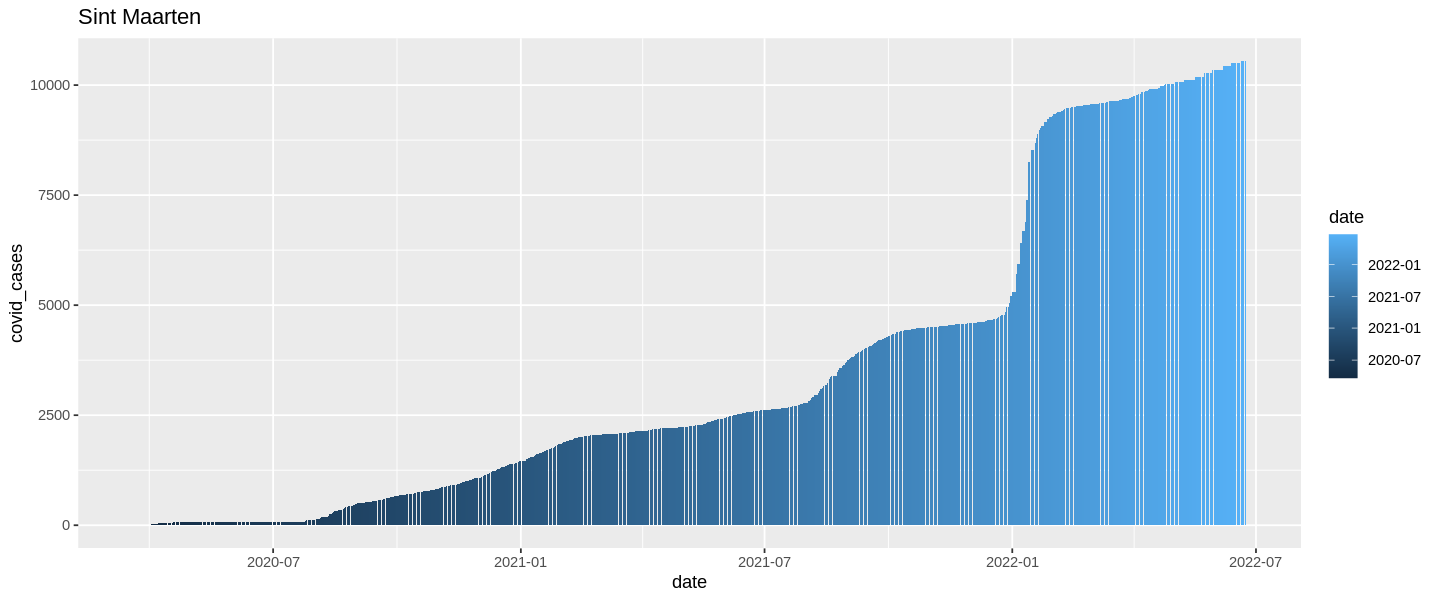

In [ ]:
for (province in netherlands_prov$province)
{
    cases_plot(province)
}

### **Australia Covid plot**

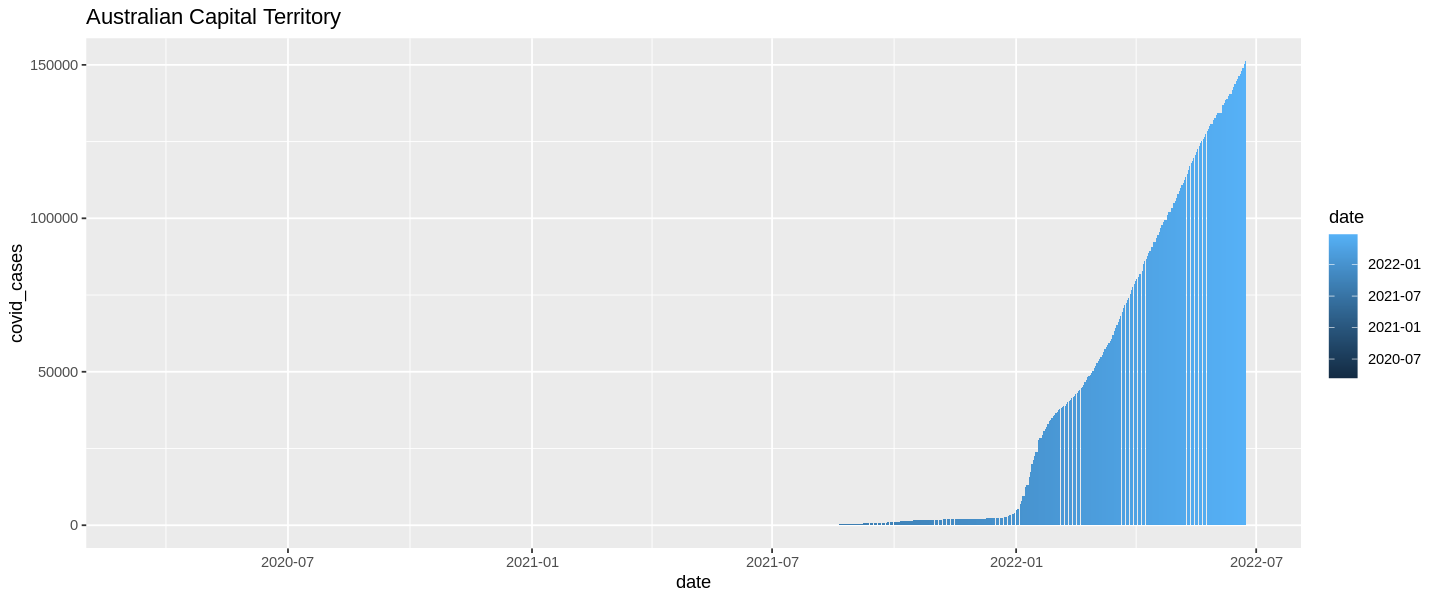

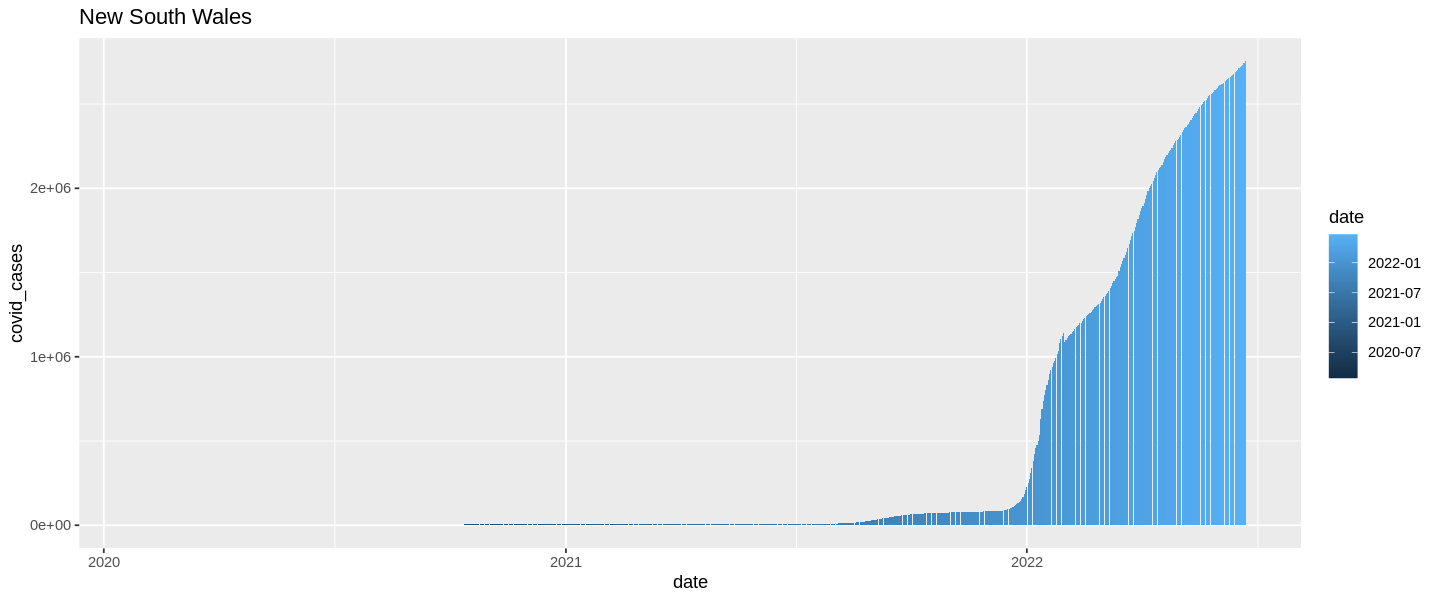

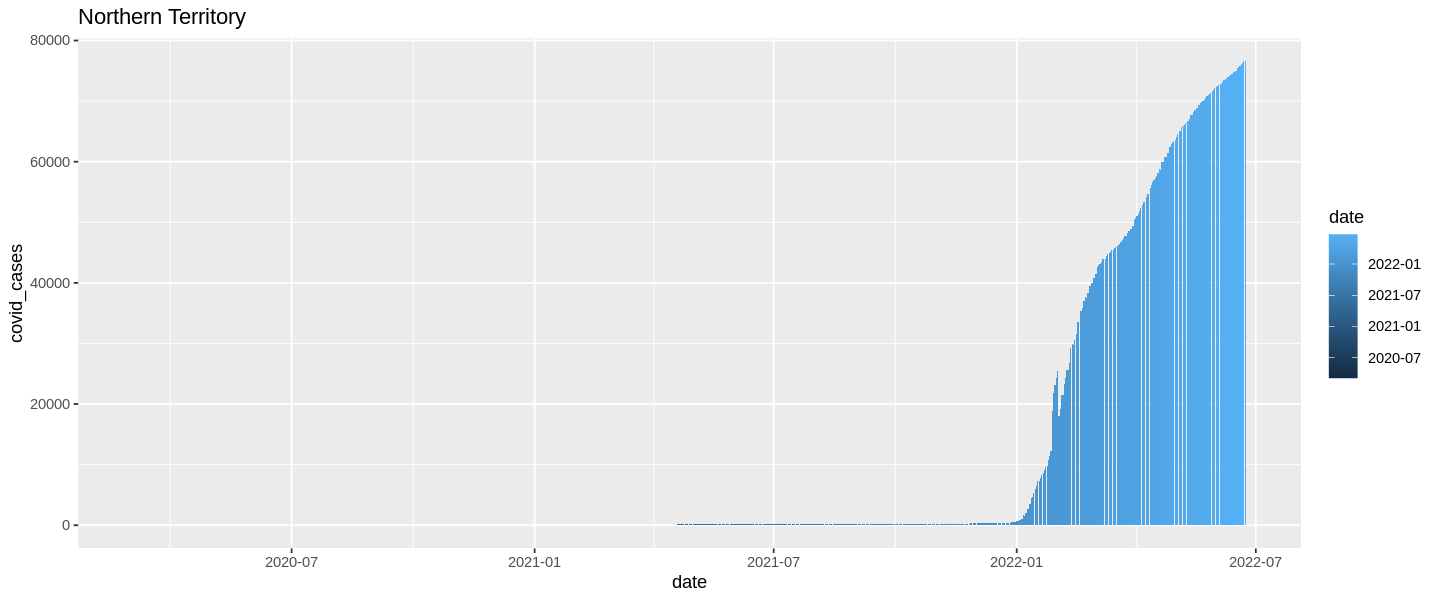

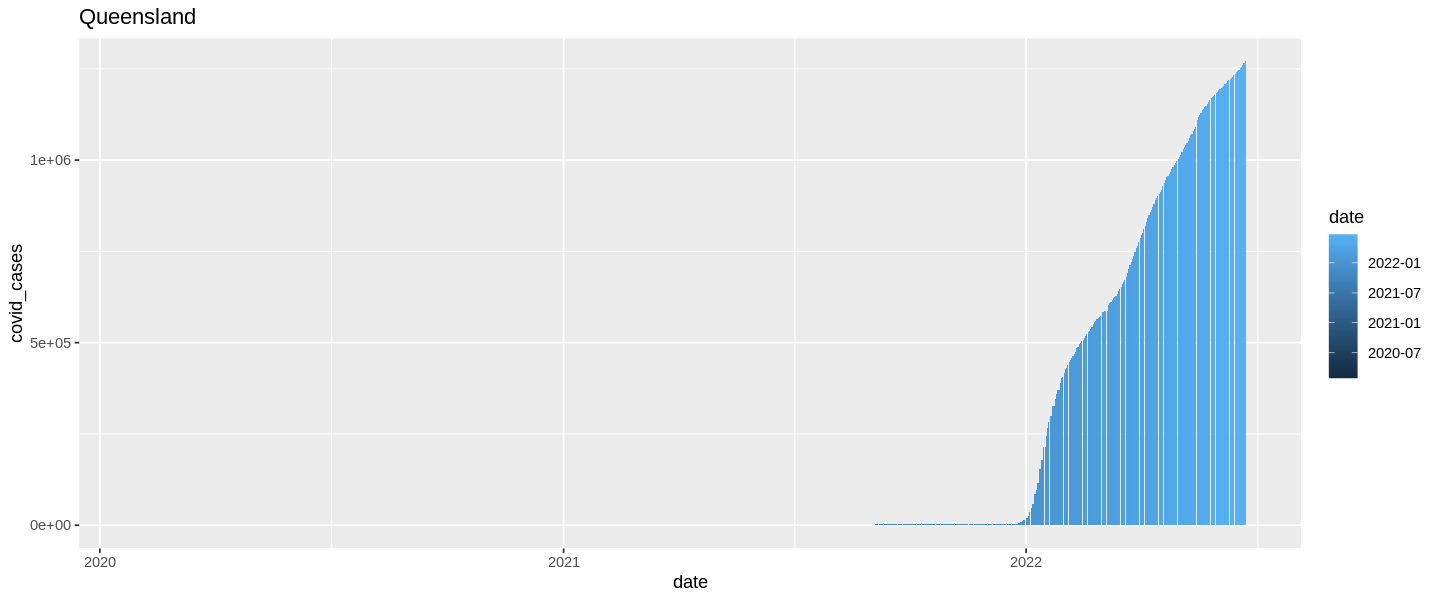

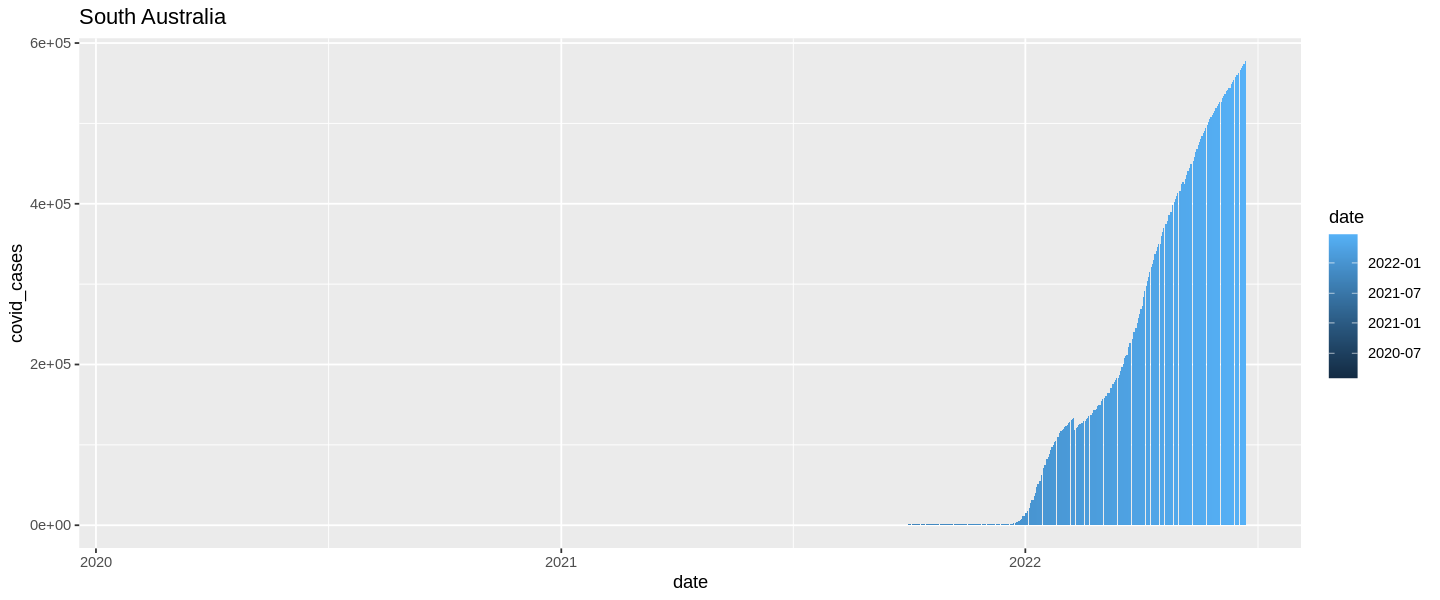

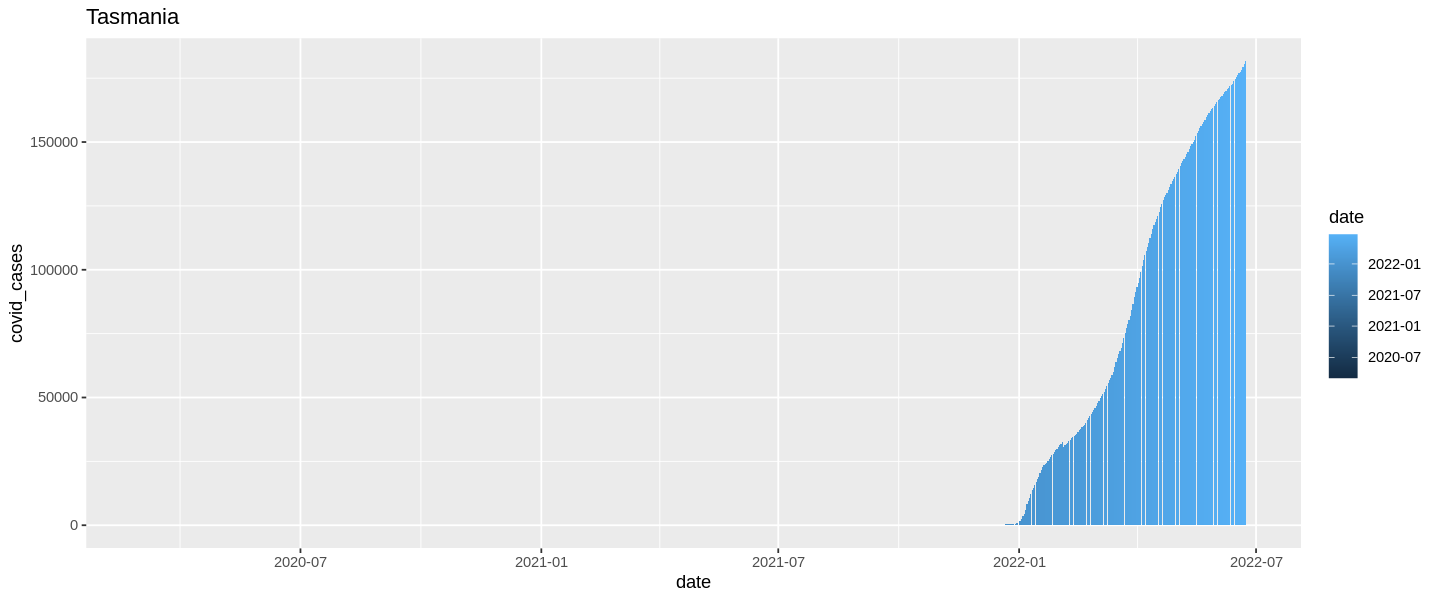

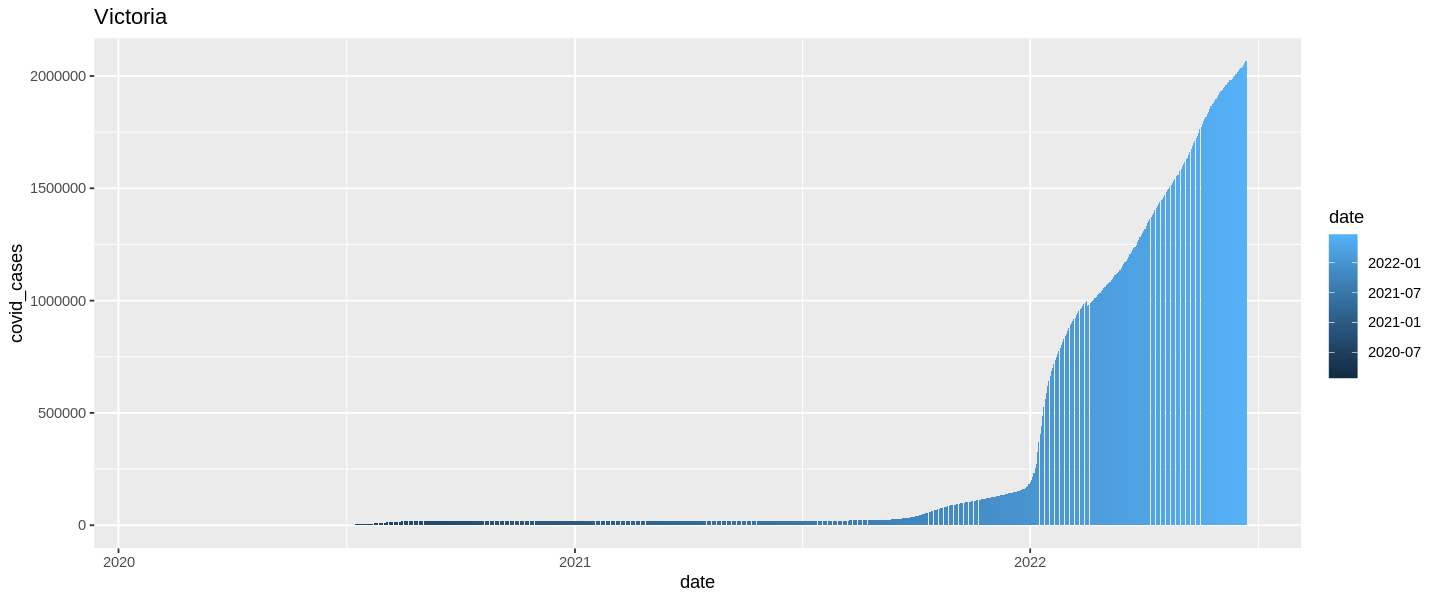

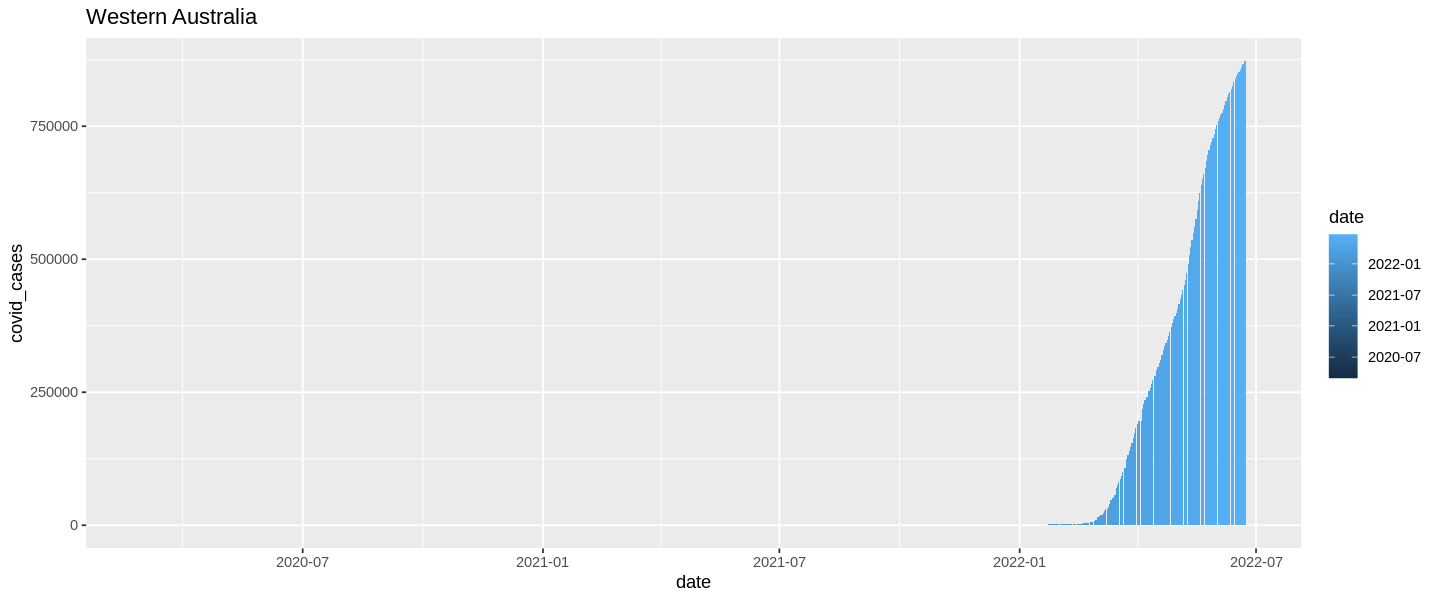

In [ ]:
for (province in australia_prov$province)
{
    cases_plot(province)
}

### Dataset :  Population in selected countries and territories worldwide that had received a COVID-19 vaccination as of December 14, 2020



In [ ]:
data(covid19_vaccine)

This dataset includes the following columns:

*   country_region - Country or region name
*   date - Data collection date in YYYY-MM-DD format
*   doses_admin - Cumulative number of doses administered. When a vaccine requires multiple doses, each one is counted independently
*   people_partially_vaccinated - Cumulative number of people who received at least one vaccine dose. When the person receives a prescribed second dose, it is not counted twice
*   people_fully_vaccinated - Cumulative number of people who received all prescribed doses necessary to be considered fully vaccinated
*   report_date_string - Data report date in YYYY-MM-DD format
*   uid - Country code
*   province_state - Province or state if applicable
*   iso2 - Officially assigned country code identifiers with two-letter
*   iso3 - Officially assigned country code identifiers with three-letter
*   code3 - UN country code
*   fips - Federal Information Processing Standards code that uniquely identifies counties within the USA
*   lat - Latitude
*   long - Longitude
*   combined_key - Country and province (if applicable)
*   population - Country or province population
*   continent_name - Continent name
*   continent_code - Continent code

In [ ]:
head(covid19_vaccine)

,country_region,date,doses_admin,people_partially_vaccinated,people_fully_vaccinated,report_date_string,uid,province_state,iso2,iso3,code3,fips,lat,long,combined_key,population,continent_name,continent_code
,<chr>,<date>,<dbl>,<dbl>,<dbl>,<date>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
1,Canada,2020-12-14,5,0,0,2020-12-14,124,NA,CA,CAN,124,NA,60.00000,-95.0000,Canada,37855702,North America,NA
2,World,2020-12-14,5,0,0,2020-12-14,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,Canada,2020-12-15,723,0,0,2020-12-15,124,NA,CA,CAN,124,NA,60.00000,-95.0000,Canada,37855702,North America,NA
4,China,2020-12-15,1500000,0,0,2020-12-15,156,NA,CN,CHN,156,NA,35.86170,104.1954,China,1404676330,Asia,AS
5,Russia,2020-12-15,28500,28500,0,2020-12-15,643,NA,RU,RUS,643,NA,61.52401,105.3188,Russia,145934460,Europe,EU
6,World,2020-12-15,1529223,28500,0,2020-12-15,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [ ]:
df <- covid19_vaccine %>% 
      filter(date == max(date), !is.na(population)) %>% 
      mutate(partially_vaccinated_ratio = people_partially_vaccinated / population) %>%
      arrange(- partially_vaccinated_ratio) %>%
      mutate(fully_vaccinated_ratio = people_fully_vaccinated / population) %>%
      arrange(- fully_vaccinated_ratio) %>%
      slice_head(n = 20) %>%
      arrange(fully_vaccinated_ratio) %>%
      mutate(country = factor(country_region, levels = country_region))

head(df)

,country_region,date,doses_admin,people_partially_vaccinated,people_fully_vaccinated,report_date_string,uid,province_state,iso2,iso3,⋯,fips,lat,long,combined_key,population,continent_name,continent_code,partially_vaccinated_ratio,fully_vaccinated_ratio,country
,<chr>,<date>,<dbl>,<dbl>,<dbl>,<date>,<dbl>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<fct>
1,Uruguay,2022-06-22,8614874,2995930,2885179,2022-06-23,858,NA,UY,URY,⋯,NA,-32.522800,-55.7658,Uruguay,3473727,South America,SA,0.8624541,0.8305716,Uruguay
2,Argentina,2022-06-22,104851947,41144979,37542066,2022-06-23,32,NA,AR,ARG,⋯,NA,-38.416100,-63.6167,Argentina,45195777,South America,SA,0.9103722,0.8306543,Argentina
3,Peru,2022-06-22,76738594,29461285,27531117,2022-06-23,604,NA,PE,PER,⋯,NA,-9.190000,-75.0152,Peru,32971846,South America,SA,0.8935285,0.8349886,Peru
4,Malaysia,2022-06-22,71171237,28025004,27228066,2022-06-23,458,NA,MY,MYS,⋯,NA,4.210484,101.9758,Malaysia,32365998,Asia,AS,0.8658780,0.8412553,Malaysia
5,Iceland,2022-06-22,816139,309770,290193,2022-06-23,352,NA,IS,ISL,⋯,NA,64.963100,-19.0208,Iceland,341250,Europe,EU,0.9077509,0.8503824,Iceland
6,Australia,2022-06-22,60067409,22342422,21653540,2022-06-23,36,NA,AU,AUS,⋯,NA,-25.000000,133.0000,Australia,25459700,Oceania,OC,0.8775603,0.8505026,Australia


### Population Plot of the Countries taken into consideration

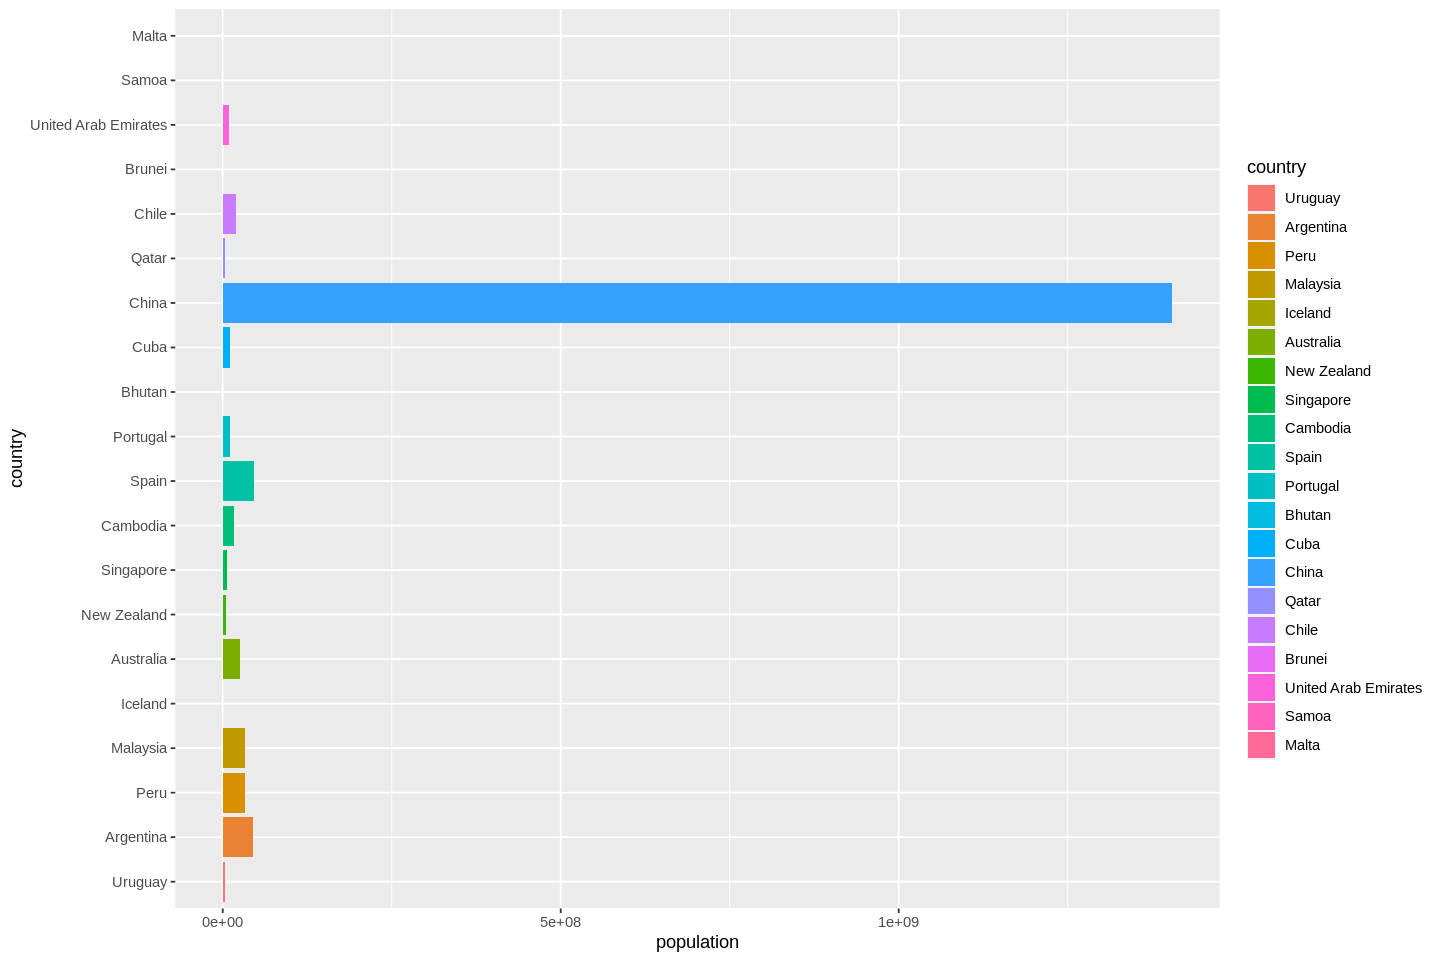

In [ ]:
bar_plot <- ggplot(df %>% head(20), aes(x = country, y = population, fill = country)) +  
            geom_bar(stat = "identity") + coord_flip()

options(repr.plot.width = 12, repr.plot.height = 8)
print(bar_plot)

We can see population of China is huge compared to the rest. So, plotting the actual vaccination numbers will not help us determine anything. Hence, we will plot the vaccination ratios of each country to make some conclusion.

In [ ]:
df_temp <- data.frame(Country = df$country,
                      Partially_Vaccinated = df$people_partially_vaccinated,
                      Population = df$population)

head(df_temp)

,Country,Partially_Vaccinated,Population
,<fct>,<dbl>,<dbl>
1,Uruguay,2995930,3473727
2,Argentina,41144979,45195777
3,Peru,29461285,32971846
4,Malaysia,28025004,32365998
5,Iceland,309770,341250
6,Australia,22342422,25459700


### Partially Vaccinated Ratio Plot of different Countries

By partially vaccinated, we mean those who have received only their first vaccine dose

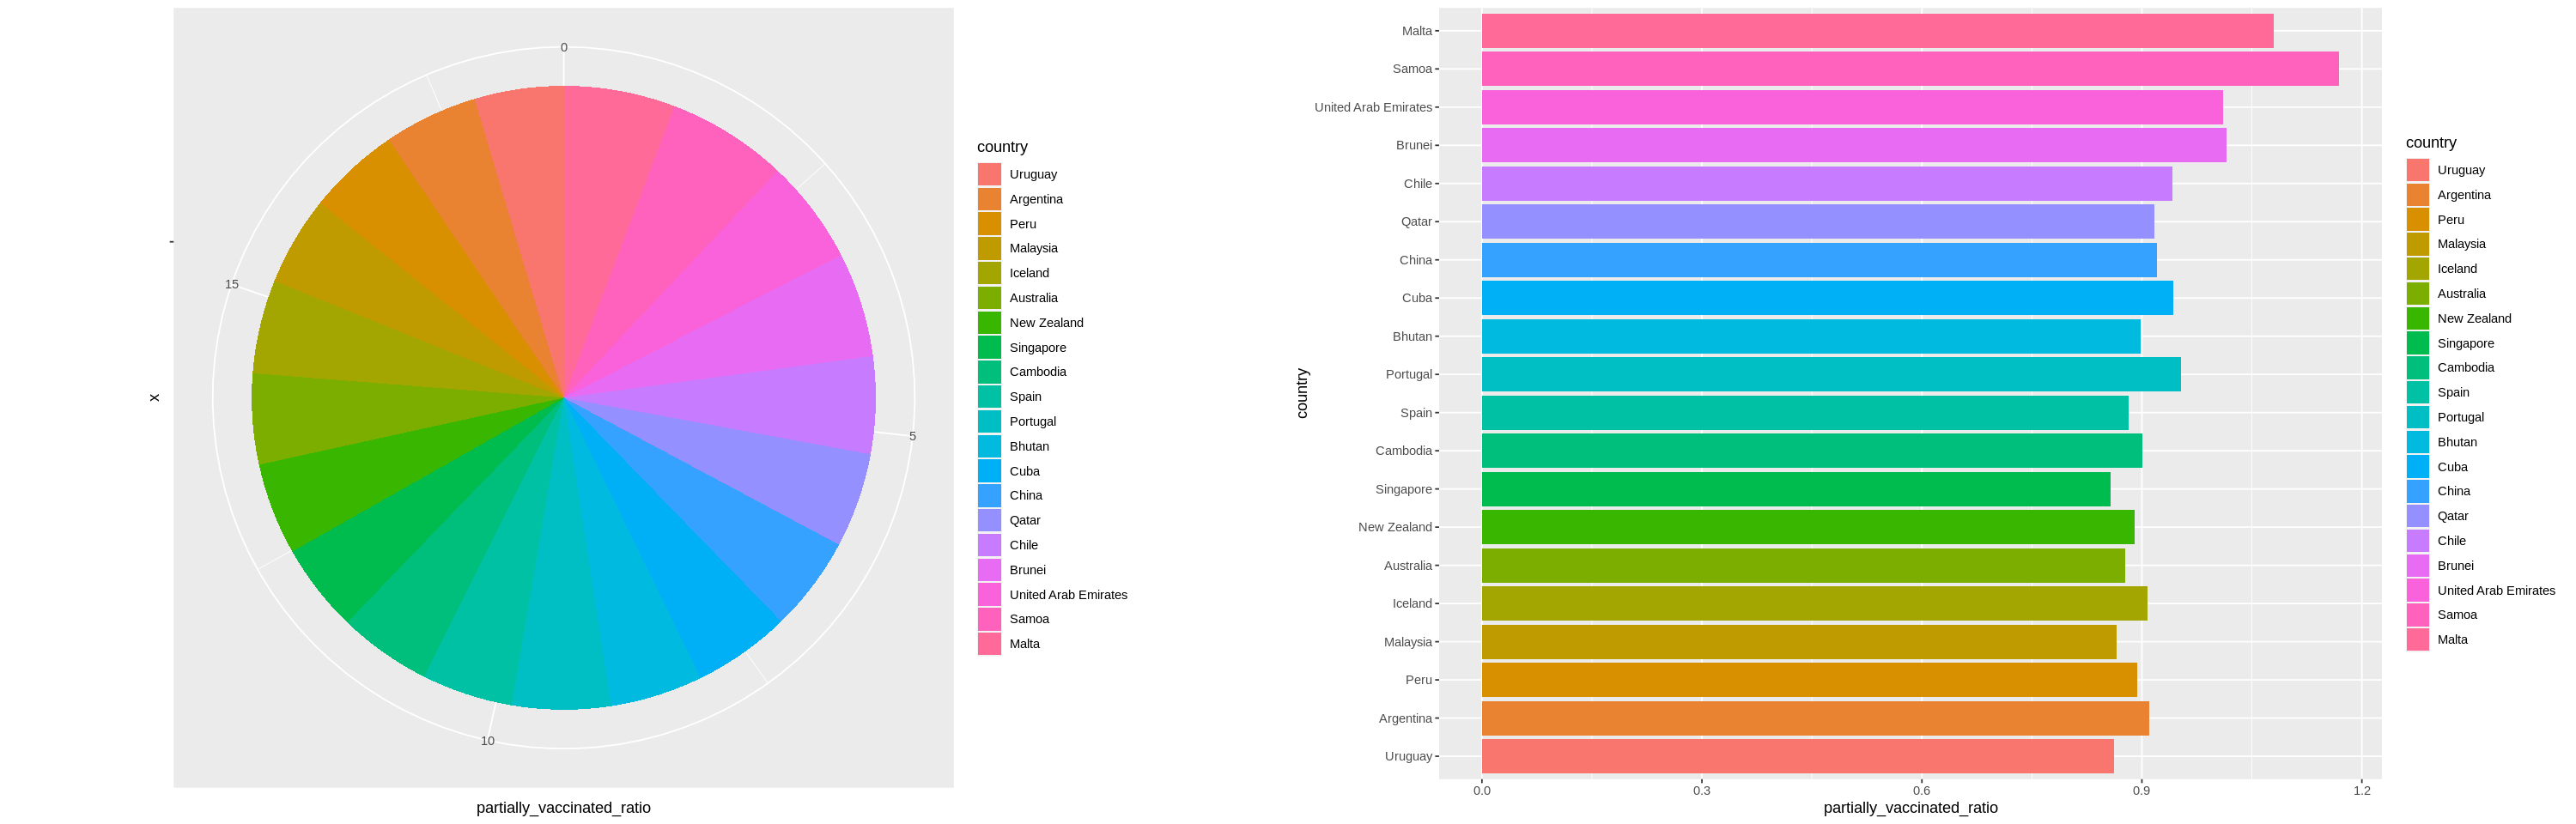

In [ ]:
pie_plot <- ggplot(df %>% head(20), aes(x = "", y = partially_vaccinated_ratio, fill = country)) +
            geom_bar(stat = "identity", width = 1) +
            coord_polar("y", start=0)

bar_plot <- ggplot(df %>% head(20), aes(x = country, y = partially_vaccinated_ratio, fill = country)) +  
            geom_bar(stat = "identity") + coord_flip()

options(repr.plot.width = 25, repr.plot.height = 8)
plot_grid(pie_plot, bar_plot, ncol = 2, nrow = 1)

### Fully Vaccinated Ratio Plot of different Countries

By fully vaccinated, we mean those who have completed the initial vaccination protocol (2 doses for most vaccines, 1 or 3 for a few manufacturers)

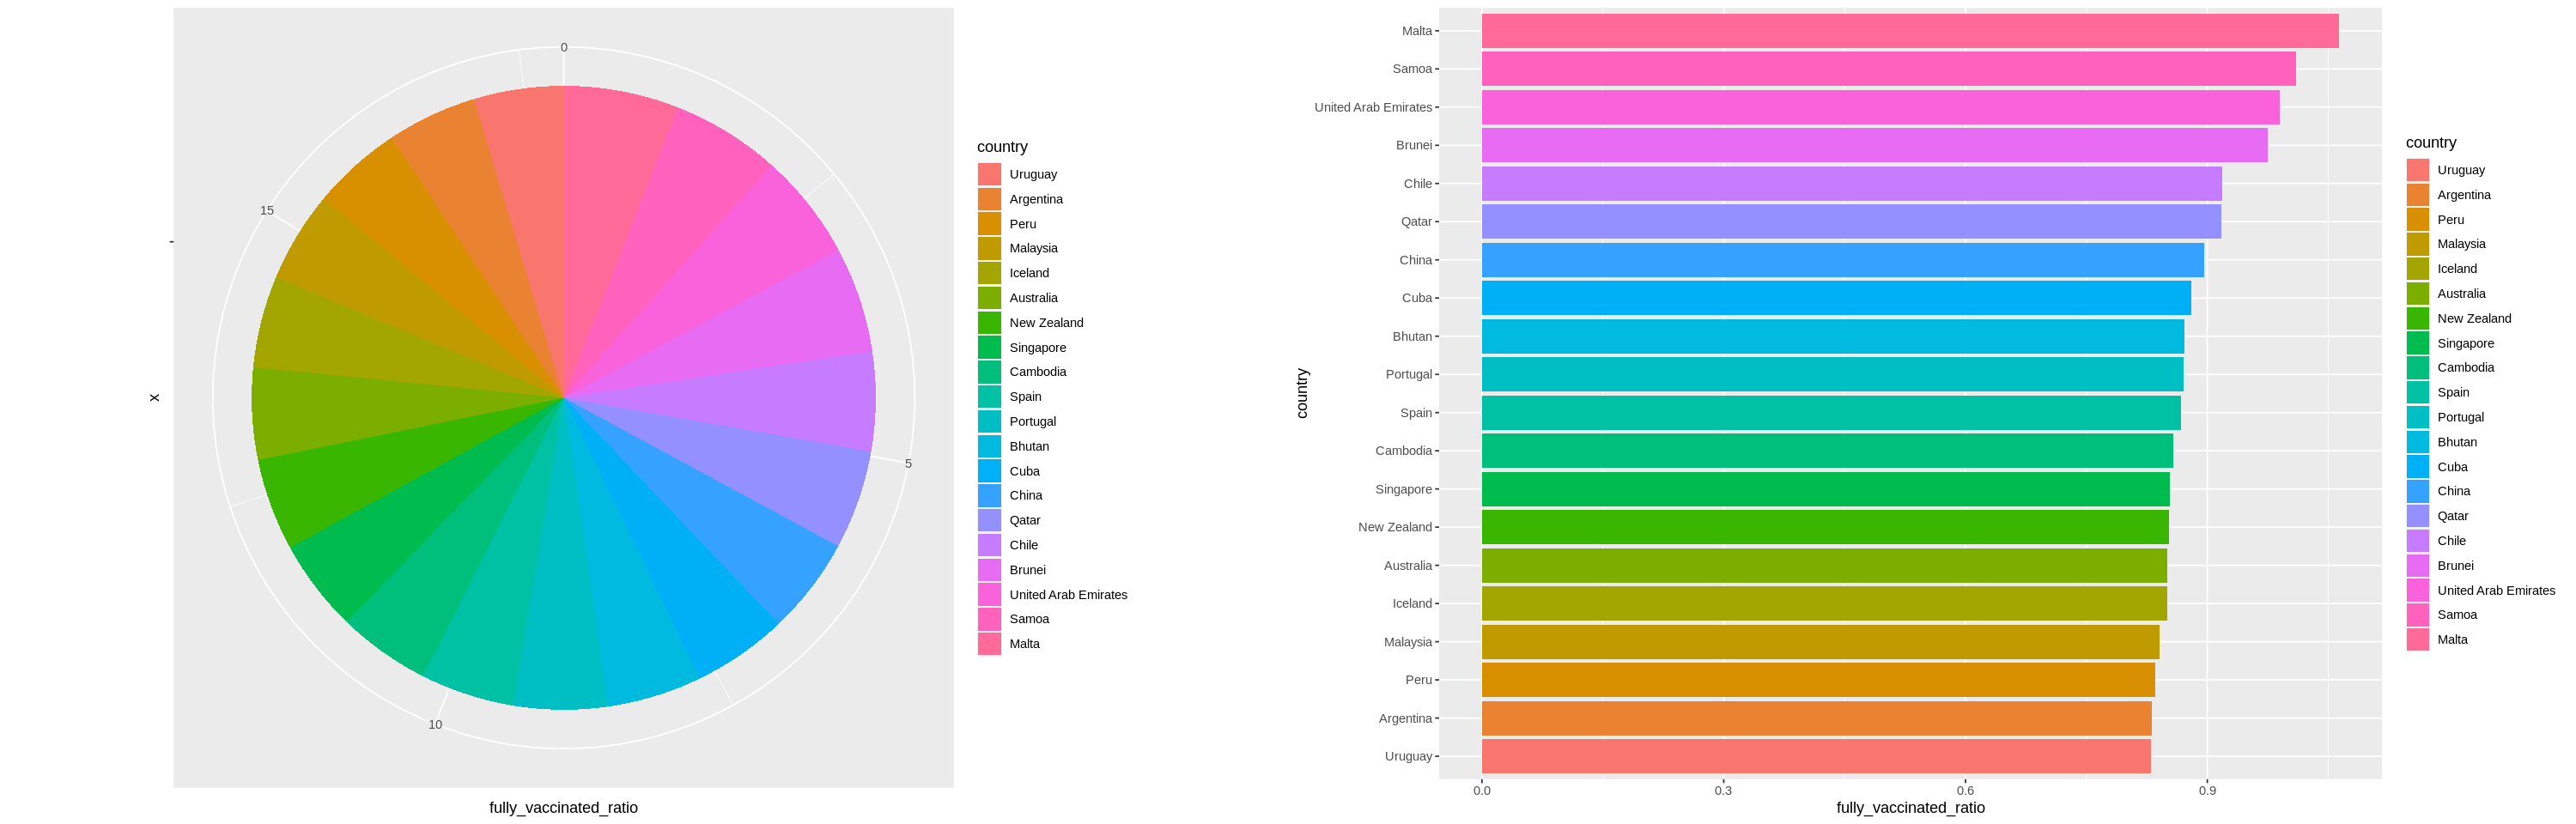

In [ ]:
pie_plot <- ggplot(df %>% head(20), aes(x = "", y = fully_vaccinated_ratio, fill = country)) +
            geom_bar(stat = "identity", width = 1) +
            coord_polar("y", start=0)

bar_plot <- ggplot(df %>% head(20), aes(x = country, y = fully_vaccinated_ratio, fill = country)) +  
            geom_bar(stat = "identity") + coord_flip()

options(repr.plot.width = 25, repr.plot.height = 8)
plot_grid(pie_plot, bar_plot, ncol = 2, nrow = 1)